In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import gseapy
#import stringdb
from gseapy import barplot, dotplot
from gseapy import enrichr
import numpy as np

In [3]:
import sys
sys.executable

'/Users/patrickmurphy/mambaforge/envs/jupyterenv/bin/python'

In [4]:
from biomart import BiomartServer

In [4]:
# Specify the path to the directory
path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res*'

# Use glob to get all the .res files from the directory
files = glob.glob(path)

# Print the files to check if they are being detected
print("Detected Files:", files)

# Initialize an empty string to store the formatted text
formatted_text = ""

# Iterate over each file path
for file in files:
    # Extract the filename without extension to use as variable name
    var_name = os.path.splitext(os.path.basename(file))[0]
    # Format the text
    text = f"{var_name} = pd.read_csv(\"{file}\", sep=',', index_col=0)\n"
    # Append to the formatted_text
    formatted_text += text

# Now, formatted_text contains the formatted text for all files
# You can print it to the console
print(formatted_text)

Detected Files: ['/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_RiboLigWT_vs_RiboContraWT.csv', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_TotalLigECKO_vs_TotalLigWT.csv', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_RiboContraECKO_vs_RiboContraWT.csv', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_TotalContraECKO_vs_TotalContraWT.csv', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_RiboLigECKO_vs_RiboContraECKO.csv', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_RiboLigECKO_vs_RiboLigWT.csv', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_TotalLigECKO_vs_TotalContraECKO.csv', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_Ribo_vs_UnboundRibo.csv', '/Users/patrickmurphy/Documents/UCONN/4_Noteboo

In [9]:
#import DESeq2 data
res_RiboLigWT_vs_RiboContraWT = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_RiboLigWT_vs_RiboContraWT.csv", sep=',', index_col=0)
res_TotalLigECKO_vs_TotalLigWT = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_TotalLigECKO_vs_TotalLigWT.csv", sep=',', index_col=0)
res_RiboContraECKO_vs_RiboContraWT = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_RiboContraECKO_vs_RiboContraWT.csv", sep=',', index_col=0)
res_TotalContraECKO_vs_TotalContraWT = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_TotalContraECKO_vs_TotalContraWT.csv", sep=',', index_col=0)
res_RiboLigECKO_vs_RiboContraECKO = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_RiboLigECKO_vs_RiboContraECKO.csv", sep=',', index_col=0)
res_RiboLigECKO_vs_RiboLigWT = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_RiboLigECKO_vs_RiboLigWT.csv", sep=',', index_col=0)
res_TotalLigECKO_vs_TotalContraECKO = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_TotalLigECKO_vs_TotalContraECKO.csv", sep=',', index_col=0)
res_Ribo_vs_UnboundRibo = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_Ribo_vs_UnboundRibo.csv", sep=',', index_col=0)
res_TotalLigWT_vs_TotalContraWT = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/res_TotalLigWT_vs_TotalContraWT.csv", sep=',', index_col=0)

In [6]:
res_TotalLigWT_vs_TotalContraWT

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610007C21Rik   2314.201000       -0.324114  0.243620 -1.330406  0.183385   
0610007L01Rik   2310.898304       -0.140444  0.173364 -0.810112  0.417876   
0610007P08Rik    531.516672       -0.157672  0.189643 -0.831418  0.405738   
0610007P14Rik    646.090899        0.476810  0.253785  1.878796  0.060272   
0610007P22Rik    438.313429       -0.132796  0.502578 -0.264230  0.791603   
...                     ...             ...       ...       ...       ...   
Zyx            31296.157056       -0.541703  0.180494 -3.001228  0.002689   
Zzef1           2269.071483        0.002017  0.201510  0.010009  0.992014   
Zzz3            2077.027022        0.179604  0.178931  1.003765  0.315492   
a                  0.079752        0.000000  4.674809  0.000000  1.000000   
l7Rn6            583.678144        0.024189  0.316937  0.076321  0.939164   

                   padj  
0610007C21Rik  0.392580  
0610007L01Rik  0.641205  
0610007P08Rik  0.631351  
0610007P14Rik  0.188277  
0610007P22Rik  0.901342  
...                 ...  
Zyx            0.019145  
Zzef1          0.997933  
Zzz3           0.545445  
a                   NaN  
l7Rn6          0.972797  

[21675 rows x 6 columns]

In [7]:
# Specify the path to the directory
path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/*cluster_significance.txt'

# Use glob to get all the .res files from the directory
files = glob.glob(path)

# Print the files to check if they are being detected
print("Detected Files:", files)

# Initialize an empty string to store the formatted text
formatted_text = ""

# Iterate over each file path
for file in files:
    # Extract the filename without extension to use as variable name
    var_name = os.path.splitext(os.path.basename(file))[0]
    # Format the text
    text = f"{var_name} = pd.read_csv(\"{file}\", sep='\\t')\n"
    # Append to the formatted_text
    formatted_text += text

# Now, formatted_text contains the formatted text for all files
# You can print it to the console
print(formatted_text)

Detected Files: ['/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraRiboTag_cluster_significance.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1WTvPTBP1ecko_cluster_significance.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigWTvECKOTotal_cluster_significance.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraTotal_cluster_significance.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKORibotag_cluster_significance.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecWTvECKOall_cluster_significance.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKOTotal_cluster_significance.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1ELAVL1WTvPTBP1ELAVL1ecko_c

In [8]:
#import cluster significance
LigvContraRiboTag_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraRiboTag_cluster_significance.txt", sep='\t')
maecPTBP1WTvPTBP1ecko_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1WTvPTBP1ecko_cluster_significance.txt", sep='\t')
LigWTvECKOTotal_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigWTvECKOTotal_cluster_significance.txt", sep='\t')
LigvContraTotal_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraTotal_cluster_significance.txt", sep='\t')
ContraWTvECKORibotag_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKORibotag_cluster_significance.txt", sep='\t')
maecWTvECKOall_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecWTvECKOall_cluster_significance.txt", sep='\t')
ContraWTvECKOTotal_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKOTotal_cluster_significance.txt", sep='\t')
maecPTBP1ELAVL1WTvPTBP1ELAVL1ecko_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1ELAVL1WTvPTBP1ELAVL1ecko_cluster_significance.txt", sep='\t')
LigWTvECKORibotag_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigWTvECKORibotag_cluster_significance.txt", sep='\t')

In [9]:
# Specify the path to the directory
path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/*effect_sizes.txt'

# Use glob to get all the .res files from the directory
files = glob.glob(path)

# Print the files to check if they are being detected
print("Detected Files:", files)

# Initialize an empty string to store the formatted text
formatted_text = ""

# Iterate over each file path
for file in files:
    # Extract the filename without extension to use as variable name
    var_name = os.path.splitext(os.path.basename(file))[0]
    # Format the text
    text = f"{var_name} = pd.read_csv(\"{file}\", sep='\\t')\n"
    # Append to the formatted_text
    formatted_text += text

# Now, formatted_text contains the formatted text for all files
# You can print it to the console
print(formatted_text)

Detected Files: ['/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraTotal_effect_sizes.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1WTvPTBP1ecko_effect_sizes.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigWTvECKOTotal_effect_sizes.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKORibotag_effect_sizes.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraRiboTag_effect_sizes.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKOTotal_effect_sizes.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1ELAVL1WTvPTBP1ELAVL1ecko_effect_sizes.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecWTvECKOall_effect_sizes.txt', '/Users/patrickmurphy/Documents/UCONN/

In [10]:
#Load in effect sizes
LigvContraTotal_effect_sizes = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraTotal_effect_sizes.txt", sep='\t')
maecPTBP1WTvPTBP1ecko_effect_sizes = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1WTvPTBP1ecko_effect_sizes.txt", sep='\t')
LigWTvECKOTotal_effect_sizes = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigWTvECKOTotal_effect_sizes.txt", sep='\t')
ContraWTvECKORibotag_effect_sizes = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKORibotag_effect_sizes.txt", sep='\t')
LigvContraRiboTag_effect_sizes = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraRiboTag_effect_sizes.txt", sep='\t')
ContraWTvECKOTotal_effect_sizes = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKOTotal_effect_sizes.txt", sep='\t')
maecPTBP1ELAVL1WTvPTBP1ELAVL1ecko_effect_sizes = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1ELAVL1WTvPTBP1ELAVL1ecko_effect_sizes.txt", sep='\t')
maecWTvECKOall_effect_sizes = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecWTvECKOall_effect_sizes.txt", sep='\t')
LigWTvECKORibotag_effect_sizes = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigWTvECKORibotag_effect_sizes.txt", sep='\t')

In [11]:
LigvContraTotal_effect_sizes

intron     logef    Contra       Lig  \
0      chr1:131055235:131055759:clu_1027_+  0.287742  0.702686  0.807773   
1      chr1:131057620:131058001:clu_1027_+ -0.287742  0.297314  0.192227   
2      chr1:133604076:133606501:clu_1100_+ -0.393549  0.714702  0.532761   
3      chr1:133606579:133608897:clu_1100_+  0.393549  0.285298  0.467239   
4      chr1:134350238:134352355:clu_1109_+ -3.081233  0.616529  0.281505   
...                                    ...       ...       ...       ...   
3890  chrX:164232266:164234902:clu_31833_+ -0.555436  0.433073  0.269071   
3891  chrX:164208939:164213482:clu_31834_+ -0.258678  0.478815  0.353852   
3892  chrX:164213609:164218330:clu_31834_+  0.258678  0.521185  0.646148   
3893  chrX:164239427:164240929:clu_31835_+  0.100563  0.472122  0.522360   
3894  chrX:164241048:164246136:clu_31835_+ -0.100563  0.527878  0.477640   

      deltapsi  
0     0.105087  
1    -0.105087  
2    -0.181941  
3     0.181941  
4    -0.335024  
...        ...  
3890 -0.164002  
3891 -0.124962  
3892  0.124962  
3893  0.050238  
3894 -0.050238  

[3895 rows x 5 columns]

In [12]:
# Get a list of global variables
global_vars = globals()

# Filter variables starting with 'res'
res_vars = {var_name: var_object for var_name, var_object in global_vars.items() if var_name.startswith('res')}

# Print the variables in the desired format
for var_name, var_object in res_vars.items():
    print(f"'{var_name}': {var_name}")

'res_RiboLigWT_vs_RiboContraWT': res_RiboLigWT_vs_RiboContraWT
'res_TotalLigECKO_vs_TotalLigWT': res_TotalLigECKO_vs_TotalLigWT
'res_RiboContraECKO_vs_RiboContraWT': res_RiboContraECKO_vs_RiboContraWT
'res_TotalContraECKO_vs_TotalContraWT': res_TotalContraECKO_vs_TotalContraWT
'res_RiboLigECKO_vs_RiboContraECKO': res_RiboLigECKO_vs_RiboContraECKO
'res_RiboLigECKO_vs_RiboLigWT': res_RiboLigECKO_vs_RiboLigWT
'res_TotalLigECKO_vs_TotalContraECKO': res_TotalLigECKO_vs_TotalContraECKO
'res_Ribo_vs_UnboundRibo': res_Ribo_vs_UnboundRibo
'res_TotalLigWT_vs_TotalContraWT': res_TotalLigWT_vs_TotalContraWT


In [13]:
#Create RNK files for GSEA

In [14]:
# Original DataFrame names and objects
df_dict = {
    'res_RiboLigWT_vs_RiboContraWT': res_RiboLigWT_vs_RiboContraWT,
    'res_TotalLigECKO_vs_TotalLigWT': res_TotalLigECKO_vs_TotalLigWT,
    'res_RiboContraECKO_vs_RiboContraWT': res_RiboContraECKO_vs_RiboContraWT,
    'res_TotalContraECKO_vs_TotalContraWT': res_TotalContraECKO_vs_TotalContraWT,
    'res_RiboLigECKO_vs_RiboContraECKO': res_RiboLigECKO_vs_RiboContraECKO,
    'res_RiboLigECKO_vs_RiboLigWT': res_RiboLigECKO_vs_RiboLigWT,
    'res_TotalLigECKO_vs_TotalContraECKO': res_TotalLigECKO_vs_TotalContraECKO,
    'res_Ribo_vs_UnboundRibo': res_Ribo_vs_UnboundRibo,
    'res_TotalLigWT_vs_TotalContraWT': res_TotalLigWT_vs_TotalContraWT
}

# New DataFrame dictionary
new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Filtering the DataFrame to keep only rows where baseMean >= 10
    df = df[df['baseMean'] >= 100]

    # If you want to ensure there is data after filtering you can add a check:
    if df.empty:
        print(f"No data in DataFrame {name} with pvalue <= 0.05")
        continue

    # Selecting only the 'log2FoldChange' column
    new_df = df[['stat']]
    # Sorting the values based on 'log2FoldChange' in descending order
    new_df = new_df.sort_values(by='stat', ascending=False)
    # Assigning no column names
    new_df.columns = ['']
    # Creating the new name by replacing 'res' with 'Log2FC' in the original name
    new_name = name.replace('res_', 'Log2FC_')
    # Adding the new DataFrame to the new_df_dict dictionary with the new name
    new_df_dict[new_name] = new_df

# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

In [15]:
res_RiboLigWT_vs_RiboContraWT

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
0610007C21Rik   4639.773246       -0.447447  0.272606 -1.641367  1.007213e-01   
0610007L01Rik   2666.645421        0.222973  0.297312  0.749965  4.532758e-01   
0610007P08Rik    546.590688       -0.197553  0.987505 -0.200053  8.414393e-01   
0610007P14Rik   1142.728931        0.200000  0.356063  0.561698  5.743220e-01   
0610007P22Rik    845.379926       -0.140574  0.509941 -0.275668  7.828033e-01   
...                     ...             ...       ...       ...           ...   
Zyx            17999.501227       -1.908390  0.348043 -5.483203  4.176933e-08   
Zzef1           1521.611904        1.669988  0.488118  3.421278  6.232765e-04   
Zzz3            1409.880349        1.106667  0.511789  2.162350  3.059122e-02   
a                  9.894173        0.000000  2.855315  0.000000  1.000000e+00   
l7Rn6           1393.297834       -0.976801  0.645470 -1.513318  1.301990e-01   

                   padj  
0610007C21Rik  0.314689  
0610007L01Rik  0.725169  
0610007P08Rik  0.954245  
0610007P14Rik  0.814340  
0610007P22Rik  0.928068  
...                 ...  
Zyx            0.000001  
Zzef1          0.006952  
Zzz3           0.144390  
a              1.000000  
l7Rn6          0.368844  

[21675 rows x 6 columns]

In [16]:
res_TotalLigWT_vs_TotalContraWT

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610007C21Rik   2314.201000       -0.324114  0.243620 -1.330406  0.183385   
0610007L01Rik   2310.898304       -0.140444  0.173364 -0.810112  0.417876   
0610007P08Rik    531.516672       -0.157672  0.189643 -0.831418  0.405738   
0610007P14Rik    646.090899        0.476810  0.253785  1.878796  0.060272   
0610007P22Rik    438.313429       -0.132796  0.502578 -0.264230  0.791603   
...                     ...             ...       ...       ...       ...   
Zyx            31296.157056       -0.541703  0.180494 -3.001228  0.002689   
Zzef1           2269.071483        0.002017  0.201510  0.010009  0.992014   
Zzz3            2077.027022        0.179604  0.178931  1.003765  0.315492   
a                  0.079752        0.000000  4.674809  0.000000  1.000000   
l7Rn6            583.678144        0.024189  0.316937  0.076321  0.939164   

                   padj  
0610007C21Rik  0.392580  
0610007L01Rik  0.641205  
0610007P08Rik  0.631351  
0610007P14Rik  0.188277  
0610007P22Rik  0.901342  
...                 ...  
Zyx            0.019145  
Zzef1          0.997933  
Zzz3           0.545445  
a                   NaN  
l7Rn6          0.972797  

[21675 rows x 6 columns]

In [17]:
Log2FC_RiboLigWT_vs_RiboContraWT

Ngf        17.739660
Syngr1     17.088020
Slamf7     16.504602
Naip6      16.274386
Cd244      16.081594
...              ...
Cxcr7      -7.254178
Mfap5      -7.383266
Pcolce2    -7.402648
Serpina1d  -7.967482
Stra6     -11.273534

[11119 rows x 1 columns]

In [18]:
Log2FC_TotalLigWT_vs_TotalContraWT

Cd74     19.782115
H2-Ab1   17.970835
Neurl3   16.005952
H2-Eb1   15.496029
Itgax    15.274238
...            ...
Galntl4  -7.682739
Stra6    -7.796514
Dnajc10  -8.544795
Ext1    -10.175462
Golm1   -11.136352

[11699 rows x 1 columns]

In [19]:
# Step 1: Filter DataFrames based on baseMean > 50
filtered_ribo_df = res_RiboLigWT_vs_RiboContraWT[res_RiboLigWT_vs_RiboContraWT['baseMean'] > 50]
filtered_total_df = res_TotalLigWT_vs_TotalContraWT[res_TotalLigWT_vs_TotalContraWT['baseMean'] > 50]

# Step 2: Merge DataFrames on gene names
merged_df = pd.merge(filtered_ribo_df, filtered_total_df, left_index=True, right_index=True, suffixes=('_ribo', '_total'))

# Step 3: Create a new DataFrame with the difference in log2FoldChange values
res_Ribo_v_Total_Lig_v_Contra = pd.DataFrame({
    'log2FoldChange_diff': merged_df['log2FoldChange_ribo'] - merged_df['log2FoldChange_total']
}, index=merged_df.index)


res_Ribo_v_Total_Lig_v_Contra

log2FoldChange_diff
0610007C21Rik            -0.123333
0610007L01Rik             0.363417
0610007P08Rik            -0.039881
0610007P14Rik            -0.276811
0610007P22Rik            -0.007778
...                            ...
Zyg11b                    1.808515
Zyx                      -1.366688
Zzef1                     1.667971
Zzz3                      0.927063
l7Rn6                    -1.000990

[11680 rows x 1 columns]

In [20]:
# Get all library names
all_names = gseapy.get_library_name()

# Filter names that contain the string "XXX"
filt_names = [name for name in all_names if "KEGG" in name]

# Display the first 10
print(filt_names[:10])


['KEGG_2013', 'KEGG_2015', 'KEGG_2016', 'KEGG_2019_Human', 'KEGG_2019_Mouse', 'KEGG_2021_Human']


In [21]:
# Get all library names
all_names = gseapy.get_library_name()

# Filter names that contain the string "XXX"
filt_names = [name for name in all_names if "Reactome" in name]

# Display the first 10
print(filt_names[:10])


['Reactome_2013', 'Reactome_2015', 'Reactome_2016', 'Reactome_2022']


In [22]:
# Get all library names
all_names = gseapy.get_library_name()

# Filter names that contain the string "XXX"
filt_names = [name for name in all_names if "Hall" in name]

# Display the first 10
print(filt_names[:10])


['MSigDB_Hallmark_2020']


In [17]:
# Initialize the Biomart server
server = BiomartServer( "http://www.ensembl.org/biomart" )
server.verbose = True

# Choose the dataset
dataset = server.datasets['mmusculus_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'hsapiens_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
m2h_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        mouse_gene, human_homolog = row
        m2h_dict[mouse_gene] = human_homolog

[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 112'] Fetching datasets
[BiomartDatabase:'Mouse strains 112'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 112'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 112'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 112'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'hsapiens_homolog_associated_gene_name']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="external_gene_n

In [18]:
# Choose the dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'mmusculus_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
h2m_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        human_gene, mouse_homolog = row
        h2m_dict[human_gene] = mouse_homolog

[BiomartDataset:'hsapiens_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'mmusculus_homolog_associated_gene_name']}
[BiomartDataset:'hsapiens_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="hsapiens_gene_ensembl" interface="default"><Attribute name="external_gene_name" /><Attribute name="mmusculus_homolog_associated_gene_name" /></Dataset></Query>'


In [25]:
# Original DataFrame names and objects
df_dict = {
    'Log2FC_RiboLigWT_vs_RiboContraWT': Log2FC_RiboLigWT_vs_RiboContraWT,
    'Log2FC_TotalLigECKO_vs_TotalLigWT': Log2FC_TotalLigECKO_vs_TotalLigWT,
    'Log2FC_RiboContraECKO_vs_RiboContraWT': Log2FC_RiboContraECKO_vs_RiboContraWT,
    'Log2FC_TotalContraECKO_vs_TotalContraWT': Log2FC_TotalContraECKO_vs_TotalContraWT,
    'Log2FC_RiboLigECKO_vs_RiboContraECKO': Log2FC_RiboLigECKO_vs_RiboContraECKO,
    'Log2FC_RiboLigECKO_vs_RiboLigWT': Log2FC_RiboLigECKO_vs_RiboLigWT,
    'Log2FC_TotalLigECKO_vs_TotalContraECKO': Log2FC_TotalLigECKO_vs_TotalContraECKO,
    'Log2FC_Ribo_vs_UnboundRibo': Log2FC_Ribo_vs_UnboundRibo,
    'Log2FC_TotalLigWT_vs_TotalContraWT': Log2FC_TotalLigWT_vs_TotalContraWT,
    'Log2FC_TotalvRiboWT_Lig_vs_Contra': res_Ribo_v_Total_Lig_v_Contra
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    # Map gene IDs to human gene IDs
    df['Human_GeneID'] = df['GeneID'].map(m2h_dict)
    # Drop rows with missing values in Human_GeneID column
    df = df.dropna(subset=['Human_GeneID'])
    df.set_index('Human_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in df_dict.items():
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"
    globals()[new_var_name] = transformed_df

In [26]:
Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID

Value
Human_GeneID           
NGF           17.739660
SYNGR1        17.088020
SLAMF7        16.504602
              16.274386
RRAGD         15.683436
...                 ...
KLK10         -7.214064
MFAP5         -7.383266
PCOLCE2       -7.402648
SERPINA1      -7.967482
STRA6        -11.273534

[9850 rows x 1 columns]

In [27]:
Log2FC_RiboLigWT_vs_RiboContraWT

Ngf        17.739660
Syngr1     17.088020
Slamf7     16.504602
Naip6      16.274386
Cd244      16.081594
...              ...
Cxcr7      -7.254178
Mfap5      -7.383266
Pcolce2    -7.402648
Serpina1d  -7.967482
Stra6     -11.273534

[11119 rows x 1 columns]

In [28]:
Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID

Value
Human_GeneID          
C17orf49     -0.365419
C2orf68       0.559631
              1.406128
C11orf58     -0.008099
C3orf80       2.436594
...                ...
ZXDC         -0.286348
ZYG11B        1.808515
ZYX          -1.366688
ZZEF1         1.667971
ZZZ3          0.927063

[10345 rows x 1 columns]

In [34]:
# Assume df_list is your list of DataFrames
df_list = [Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID,
    Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID,
    Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID,
    Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID,
    Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID,
    Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID,
    Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID,
    Log2FC_Ribo_vs_UnboundRibo_HsGeneID,
    Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID,
    Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID]

# Corresponding list of names for the output
df_names = ['Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID',
    'Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID',
    'Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID',
    'Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID',
    'Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID',
    'Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID',
    'Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID',
    'Log2FC_Ribo_vs_UnboundRibo_HsGeneID',
    'Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID',
    'Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID']

# Define the directory to save the results
output_directory = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/'

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets="MSigDB_Hallmark_2020",
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weight=1,
                             #max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weight1_hallmark_Hs'] = results

    # Save the result to a CSV file in the output directory
    result_filename = f'{df_names[i]}_rankedGSEA_log2_weight1_hallmark_Hs.csv'
    results.res2d.to_csv(output_directory + result_filename, header=True, index=True)

2024-04-01 08:58:12,510 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2024-04-01 08:58:12,524 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-01 08:58:12,525 [INFO] Parsing data files for GSEA.............................
2024-04-01 08:58:12,525 [INFO] Enrichr library gene sets already downloaded in: /Users/patrickmurphy/.cache/gseapy, use local file
2024-04-01 08:58:12,531 [INFO] 0000 gene_sets have been filtered out when max_size=500 and min_size=5
2024-04-01 08:58:12,532 [INFO] 0050 gene_sets used for further statistical testing.....
2024-04-01 08:58:12,532 [INFO] Start to run GSEA...Might take a while..................
2024-04-01 08:58:13,366 [INFO] Congratulations. GSEApy runs successfully................

2024-04-01 08:58:13,376 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with h

In [35]:
# Assume df_list is your list of DataFrames
df_list = [Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID,
    Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID,
    Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID,
    Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID,
    Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID,
    Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID,
    Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID,
    Log2FC_Ribo_vs_UnboundRibo_HsGeneID,
    Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID,
    Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID]

# Corresponding list of names for the output
df_names = ['Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID',
    'Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID',
    'Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID',
    'Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID',
    'Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID',
    'Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID',
    'Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID',
    'Log2FC_Ribo_vs_UnboundRibo_HsGeneID',
    'Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID',
    'Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID']

# Define the directory to save the results
output_directory = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/'

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets="Reactome_2022",
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weight=1,
                             max_size=5000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weight1_reactome_Hs'] = results

     # Save the result to a CSV file in the output directory
    result_filename = f'{df_names[i]}_rankedGSEA_log2_weight1_reactome_Hs.csv'
    results.res2d.to_csv(output_directory + result_filename, header=True, index=True)

2024-04-01 08:59:49,555 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2024-04-01 08:59:49,570 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-01 08:59:49,570 [INFO] Parsing data files for GSEA.............................
2024-04-01 08:59:49,572 [INFO] Enrichr library gene sets already downloaded in: /Users/patrickmurphy/.cache/gseapy, use local file
2024-04-01 08:59:49,692 [INFO] 0285 gene_sets have been filtered out when max_size=5000 and min_size=5
2024-04-01 08:59:49,692 [INFO] 1533 gene_sets used for further statistical testing.....
2024-04-01 08:59:49,692 [INFO] Start to run GSEA...Might take a while..................
2024-04-01 09:00:04,846 [INFO] Congratulations. GSEApy runs successfully................

2024-04-01 09:00:04,865 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with 

In [36]:
# Assume df_list is your list of DataFrames
df_list = [Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID,
    Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID,
    Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID,
    Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID,
    Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID,
    Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID,
    Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID,
    Log2FC_Ribo_vs_UnboundRibo_HsGeneID,
    Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID,
    Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID]

# Corresponding list of names for the output
df_names = ['Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID',
    'Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID',
    'Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID',
    'Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID',
    'Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID',
    'Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID',
    'Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID',
    'Log2FC_Ribo_vs_UnboundRibo_HsGeneID',
    'Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID',
    'Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID']

# Define the directory to save the results
output_directory = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/'

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets="KEGG_2021_Human",
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weight=1,
                             max_size=5000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weight1_kegg_Hs'] = results

     # Save the result to a CSV file in the output directory
    result_filename = f'{df_names[i]}_rankedGSEA_log2_weight1_kegg_Hs.csv'
    results.res2d.to_csv(output_directory + result_filename, header=True, index=True)

2024-04-01 09:02:26,645 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2024-04-01 09:02:26,657 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-01 09:02:26,657 [INFO] Parsing data files for GSEA.............................
2024-04-01 09:02:26,658 [INFO] Enrichr library gene sets already downloaded in: /Users/patrickmurphy/.cache/gseapy, use local file
2024-04-01 09:02:26,667 [INFO] 0009 gene_sets have been filtered out when max_size=5000 and min_size=5
2024-04-01 09:02:26,668 [INFO] 0311 gene_sets used for further statistical testing.....
2024-04-01 09:02:26,668 [INFO] Start to run GSEA...Might take a while..................
2024-04-01 09:02:30,083 [INFO] Congratulations. GSEApy runs successfully................

2024-04-01 09:02:30,088 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with 

In [37]:
# Assume df_list is your list of DataFrames
df_list = [Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID,
    Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID,
    Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID,
    Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID,
    Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID,
    Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID,
    Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID,
    Log2FC_Ribo_vs_UnboundRibo_HsGeneID,
    Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID,
    Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID]

# Corresponding list of names for the output
df_names = ['Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID',
    'Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID',
    'Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID',
    'Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID',
    'Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID',
    'Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID',
    'Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID',
    'Log2FC_Ribo_vs_UnboundRibo_HsGeneID',
    'Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID',
    'Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID']


# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets="GO_Biological_Process_2023",
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weight=1,
                             max_size=5000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weight1_goterm_Hs'] = results

     # Save the result to a CSV file in the output directory
    result_filename = f'{df_names[i]}_rankedGSEA_log2_weight1_goterm_Hs.csv'
    results.res2d.to_csv(output_directory + result_filename, header=True, index=True)

2024-04-01 09:03:00,250 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2024-04-01 09:03:00,255 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-01 09:03:00,255 [INFO] Parsing data files for GSEA.............................
2024-04-01 09:03:00,256 [INFO] Enrichr library gene sets already downloaded in: /Users/patrickmurphy/.cache/gseapy, use local file
2024-04-01 09:03:05,572 [INFO] 1279 gene_sets have been filtered out when max_size=5000 and min_size=5
2024-04-01 09:03:05,575 [INFO] 4128 gene_sets used for further statistical testing.....
2024-04-01 09:03:05,576 [INFO] Start to run GSEA...Might take a while..................
2024-04-01 09:03:43,491 [INFO] Congratulations. GSEApy runs successfully................

2024-04-01 09:03:43,554 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with 

In [38]:
gsea_result_kegg_Hs = {
    'RiboLigWT_vs_RiboContraWT' : Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs,
    'TotalLigECKO_vs_TotalLigWT' : Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs,
    'RiboContraECKO_vs_RiboContraWT' : Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs, 
    'TotalContraECKO_vs_TotalContraWT' : Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs, 
    'RiboLigECKO_vs_RiboContraECKO' : Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs, 
    'RiboLigECKO_vs_RiboLigWT' : Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs, 
    'TotalLigECKO_vs_TotalContraECKO' : Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs, 
    'Ribo_vs_UnboundRibo' : Log2FC_Ribo_vs_UnboundRibo_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs,
    'TotalLigWT_vs_TotalContraWT' : Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs,
    'Ribo_vs_TotalWT_Lig_vs_Contra' : Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID_rankedGSEA_log2_weight1_kegg_Hs
}

# The result dataframe
merged_GSEA_df_kegg_Hs = None

for df_name, gsea_res in gsea_result_kegg_Hs.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val', 'Tag %', 'Lead_genes']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_kegg_Hs is None:
        merged_GSEA_df_kegg_Hs = df
    else:
        merged_GSEA_df_kegg_Hs = pd.merge(merged_GSEA_df_kegg_Hs, df, on='Term', how='outer')

In [39]:
gsea_result_reactome_Hs = {
    'RiboLigWT_vs_RiboContraWT' : Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs,
    'TotalLigECKO_vs_TotalLigWT' : Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs,
    'RiboContraECKO_vs_RiboContraWT' : Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs, 
    'TotalContraECKO_vs_TotalContraWT' : Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs, 
    'RiboLigECKO_vs_RiboContraECKO' : Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs, 
    'RiboLigECKO_vs_RiboLigWT' : Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs, 
    'TotalLigECKO_vs_TotalContraECKO' : Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs, 
    'Ribo_vs_UnboundRibo' : Log2FC_Ribo_vs_UnboundRibo_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs,
    'TotalLigWT_vs_TotalContraWT' : Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs,
    'Ribo_vs_TotalWT_Lig_vs_Contra' : Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID_rankedGSEA_log2_weight1_reactome_Hs
}

# The result dataframe
merged_GSEA_df_reactome_Hs = None

for df_name, gsea_res in gsea_result_reactome_Hs.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val', 'Tag %', 'Lead_genes']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_reactome_Hs is None:
        merged_GSEA_df_reactome_Hs = df
    else:
        merged_GSEA_df_reactome_Hs = pd.merge(merged_GSEA_df_reactome_Hs, df, on='Term', how='outer')

In [40]:
gsea_result_hallmark_Hs = {
    'RiboLigWT_vs_RiboContraWT' : Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs,
    'TotalLigECKO_vs_TotalLigWT' : Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs,
    'RiboContraECKO_vs_RiboContraWT' : Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs, 
    'TotalContraECKO_vs_TotalContraWT' : Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs, 
    'RiboLigECKO_vs_RiboContraECKO' : Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs, 
    'RiboLigECKO_vs_RiboLigWT' : Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs, 
    'TotalLigECKO_vs_TotalContraECKO' : Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs, 
    'Ribo_vs_UnboundRibo' : Log2FC_Ribo_vs_UnboundRibo_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs,
    'TotalLigWT_vs_TotalContraWT' : Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs,
    'Ribo_vs_TotalWT_Lig_vs_Contra' : Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID_rankedGSEA_log2_weight1_hallmark_Hs
}

# The result dataframe
merged_GSEA_df_hallmark_Hs = None

for df_name, gsea_res in gsea_result_hallmark_Hs.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val', 'Tag %', 'Lead_genes']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_hallmark_Hs is None:
        merged_GSEA_df_hallmark_Hs = df
    else:
        merged_GSEA_df_hallmark_Hs = pd.merge(merged_GSEA_df_hallmark_Hs, df, on='Term', how='outer')

In [41]:
gsea_result_goterm_Hs = {
    'RiboLigWT_vs_RiboContraWT' : Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs,
    'TotalLigECKO_vs_TotalLigWT' : Log2FC_TotalLigECKO_vs_TotalLigWT_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs,
    'RiboContraECKO_vs_RiboContraWT' : Log2FC_RiboContraECKO_vs_RiboContraWT_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs, 
    'TotalContraECKO_vs_TotalContraWT' : Log2FC_TotalContraECKO_vs_TotalContraWT_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs, 
    'RiboLigECKO_vs_RiboContraECKO' : Log2FC_RiboLigECKO_vs_RiboContraECKO_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs, 
    'RiboLigECKO_vs_RiboLigWT' : Log2FC_RiboLigECKO_vs_RiboLigWT_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs, 
    'TotalLigECKO_vs_TotalContraECKO' : Log2FC_TotalLigECKO_vs_TotalContraECKO_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs, 
    'Ribo_vs_UnboundRibo' : Log2FC_Ribo_vs_UnboundRibo_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs,
    'TotalLigWT_vs_TotalContraWT' : Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs,
    'Ribo_vs_TotalWT_Lig_vs_Contra' : Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs
}

# The result dataframe
merged_GSEA_df_goterm_Hs = None

for df_name, gsea_res in gsea_result_goterm_Hs.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val', 'Tag %', 'Lead_genes']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_goterm_Hs is None:
        merged_GSEA_df_goterm_Hs = df
    else:
        merged_GSEA_df_goterm_Hs = pd.merge(merged_GSEA_df_goterm_Hs, df, on='Term', how='outer')

In [42]:
# Create a list of tuples where each tuple contains a DataFrame and its corresponding gene set type
gsea_type_mapping = [
    (merged_GSEA_df_hallmark_Hs, "Hallmark"),
    (merged_GSEA_df_reactome_Hs, "Reactome"),
    (merged_GSEA_df_kegg_Hs, "Kegg"),
    (merged_GSEA_df_goterm_Hs, "GoTerm")
]

# Initialize an empty list to store the DataFrames with their corresponding gene set type
dfs_with_type_uw = []

# Iterate through the list of tuples
for df, gsea_type in gsea_type_mapping:
    # Add the gene set type as a new column
    df['GeneSetType'] = gsea_type
    # Append the DataFrame to the list
    dfs_with_type_uw.append(df)

# Concatenate the DataFrames along rows
combined_df_GSEA = pd.concat(dfs_with_type_uw, axis=0, ignore_index=True)

In [44]:
# Assuming InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA.res2d is your DataFrame
combined_df_GSEA.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/GSEA_Elavl1_byStat_weight1_base100.csv', header=True, index=True)

In [29]:
# Read the CSV file into a DataFrame
combined_df_GSEA = pd.read_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/GSEA_Elavl1_byStat_weight1_base100.csv')

In [30]:
combined_df = combined_df_GSEA.copy()

In [31]:
# Remove columns containing "Ribo_vs_UnboundRibo"
columns_to_keep = [col for col in combined_df.columns if 'Ribo_vs_UnboundRibo' not in col]
combined_df_filt = combined_df[columns_to_keep]

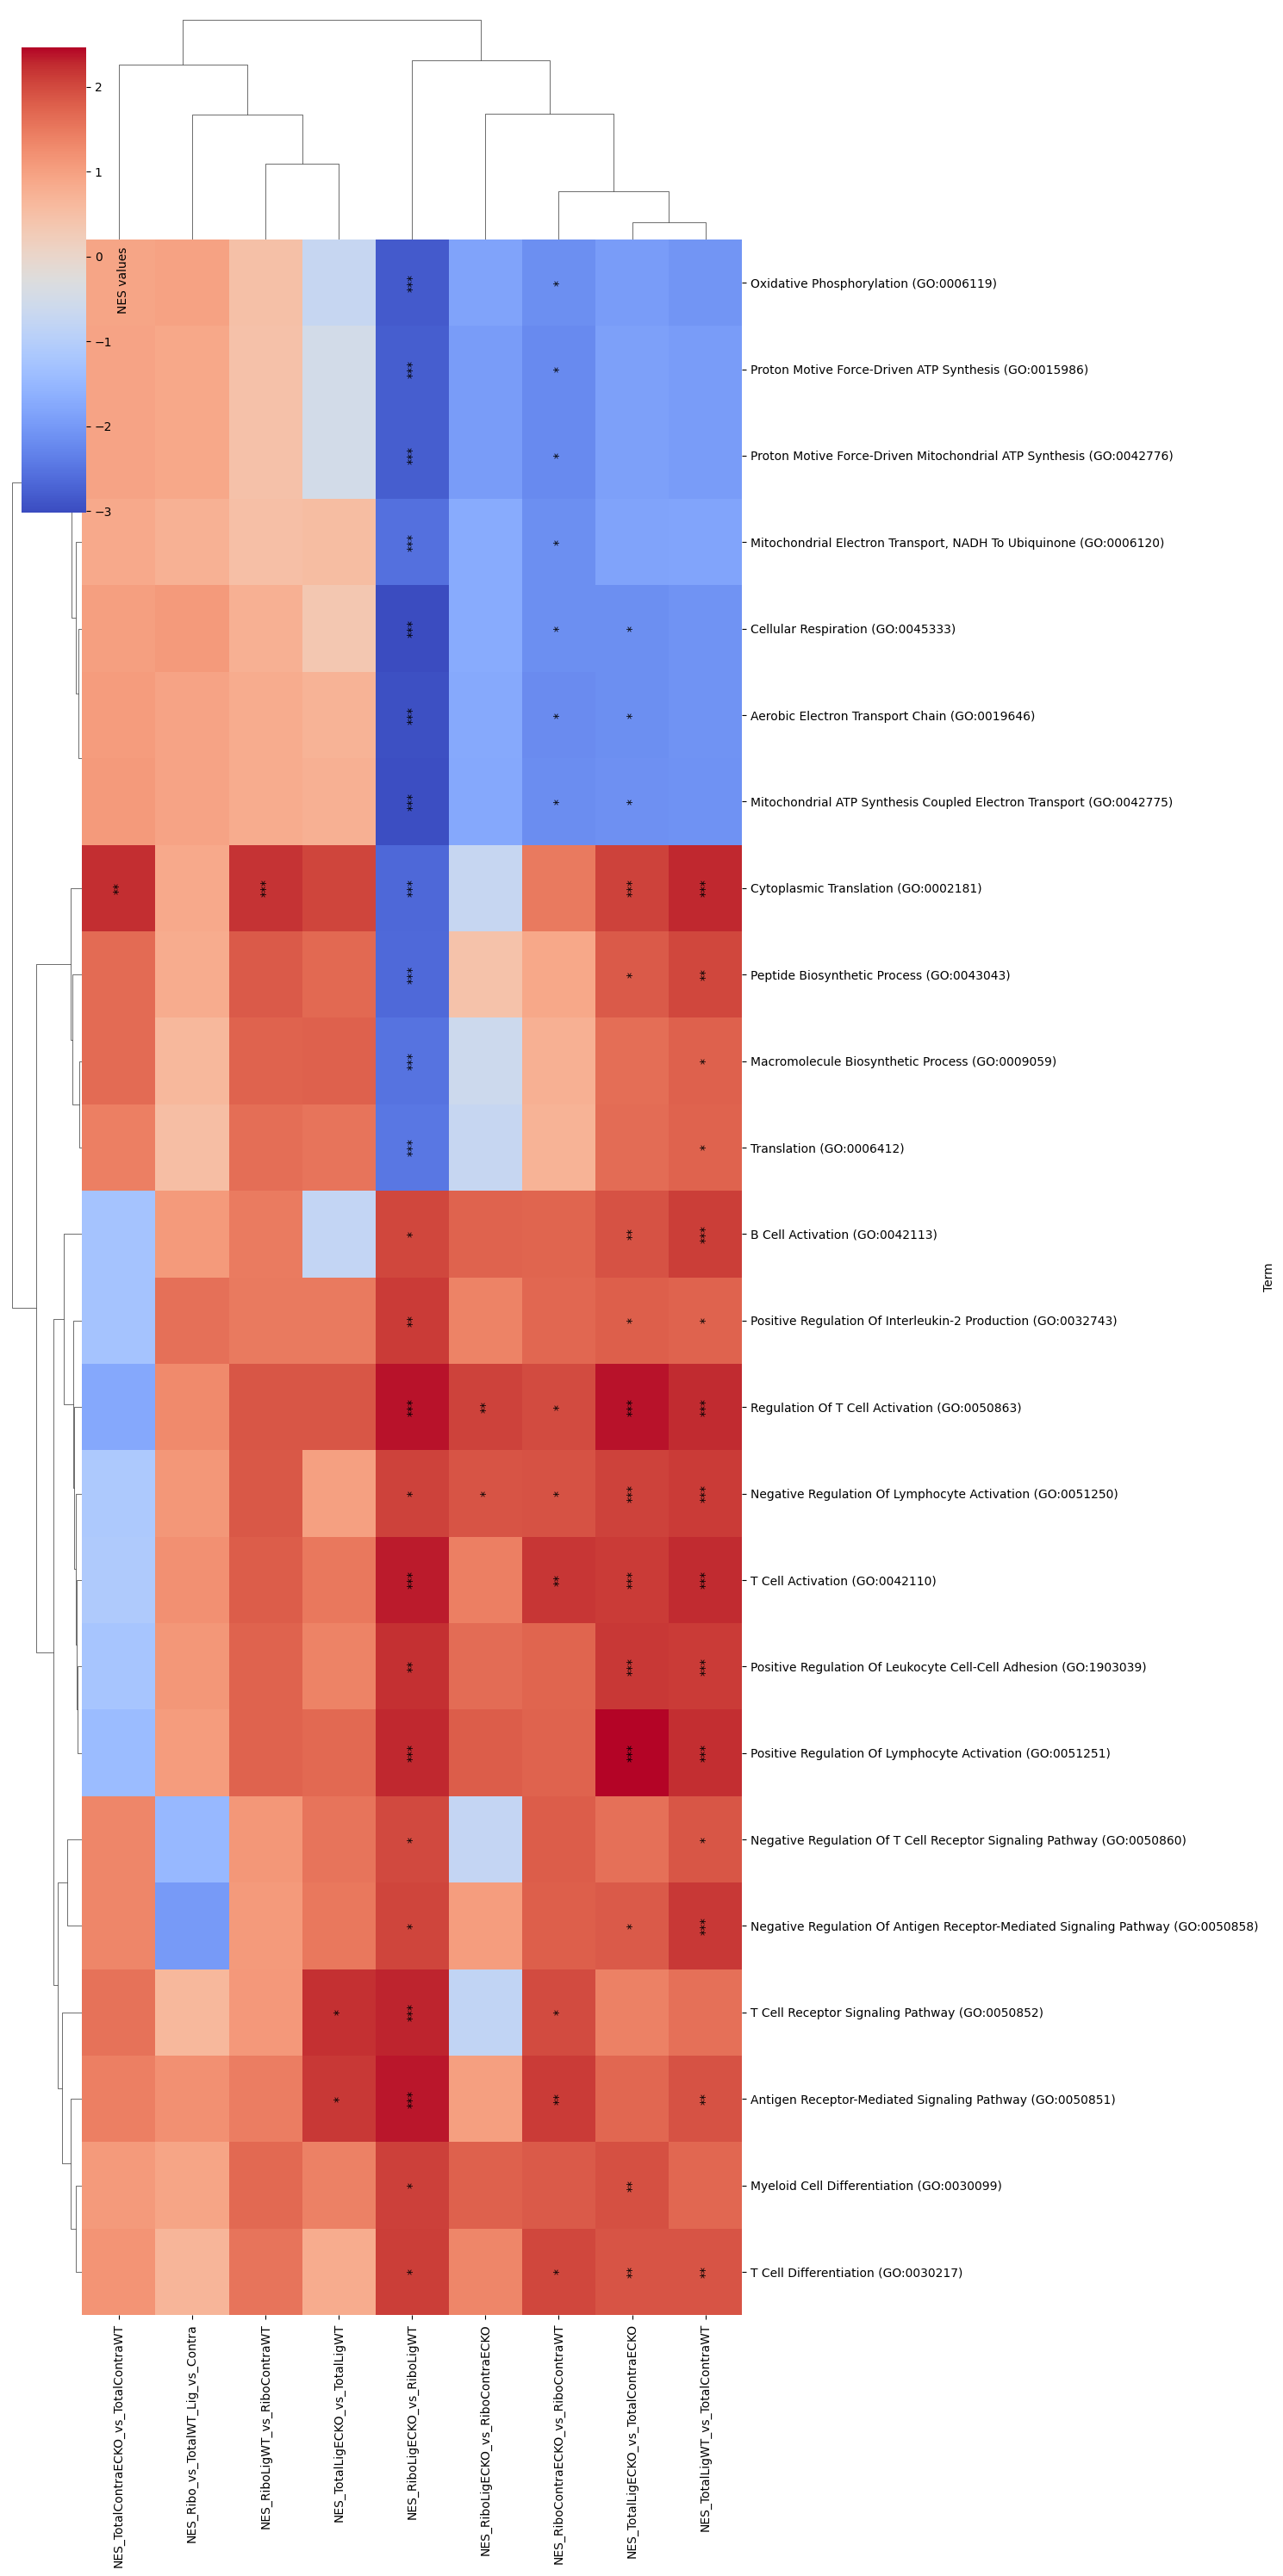

In [32]:
#This is all of the data, and used for string diagram

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in combined_df_filt.columns if 'NES' in col]

# Create a mask for "GeneSetType" column
#geneset_mask = combined_df_filt['GeneSetType'].str.contains('Kegg|Hallmark', regex=True)
geneset_mask = combined_df_filt['GeneSetType'].str.contains('GoTerm')


# Create a mask for rows with q-value < 0.1 for RiboLigECKO vs RiboLiqWT
padj_columns = [col for col in combined_df_filt.columns if 'FDR q-val_RiboLigECKO_vs_RiboLigWT' in col]
padj_mask = combined_df_filt[padj_columns].apply(lambda x: x < 0.05).any(axis=1)

# Create a mask for rows with q-value < 0.1 in at least one datasets
fw_cols = [col for col in combined_df_filt.columns if 'q-val' in col]
qval_mask = (combined_df_filt[fw_cols] < 0.05).sum(axis=1) >= 2

# For direction, count the number of positive and negative values in direction_cols
positive_counts = (combined_df_filt[direction_cols] > 0).sum(axis=1)
negative_counts = (combined_df_filt[direction_cols] < 0).sum(axis=1)

# Create masks for rows where the count of positive values or negative values is greater than 12
positive_direction_mask = positive_counts > 0
negative_direction_mask = negative_counts > 0

# Combine the two masks using bitwise OR operator
direction_mask = positive_direction_mask | negative_direction_mask

# Combine the two masks using bitwise AND operator
final_mask = qval_mask & direction_mask & geneset_mask & padj_mask

# Filter the DataFrame based on the combined mask and specific terms
#filter_strings = ["KEGG", "MSigDB", "BrainEC_TardbpSI", "p3", "p1", "CardiacEC", "CarotidEC", "BrainEC_TardbpKO", "BrainEC_TardbpECKO", "BrainEC_TardbpKO", "HuAEC"]  # Replace with your specific strings
#string_mask = combined_df['Term'].str.contains('|'.join(filter_strings))
#final_mask = final_mask & string_mask
filtered_GSEA_df = combined_df_filt[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index, columns=direction_cols)  # Only NES columns needed

# Corrected part for creating the significance matrix
for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Transpose the data
transposed_data_for_heatmap = data_for_heatmap.T

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(15, 30),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    #cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix to match the clustered heatmap
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:  # Only add text if there are asterisks
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=90)

# Save the figure with 600 dpi
g.fig.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/HeatMapNetwork_base100_weight1_byStat.pdf', dpi=600, format='pdf')

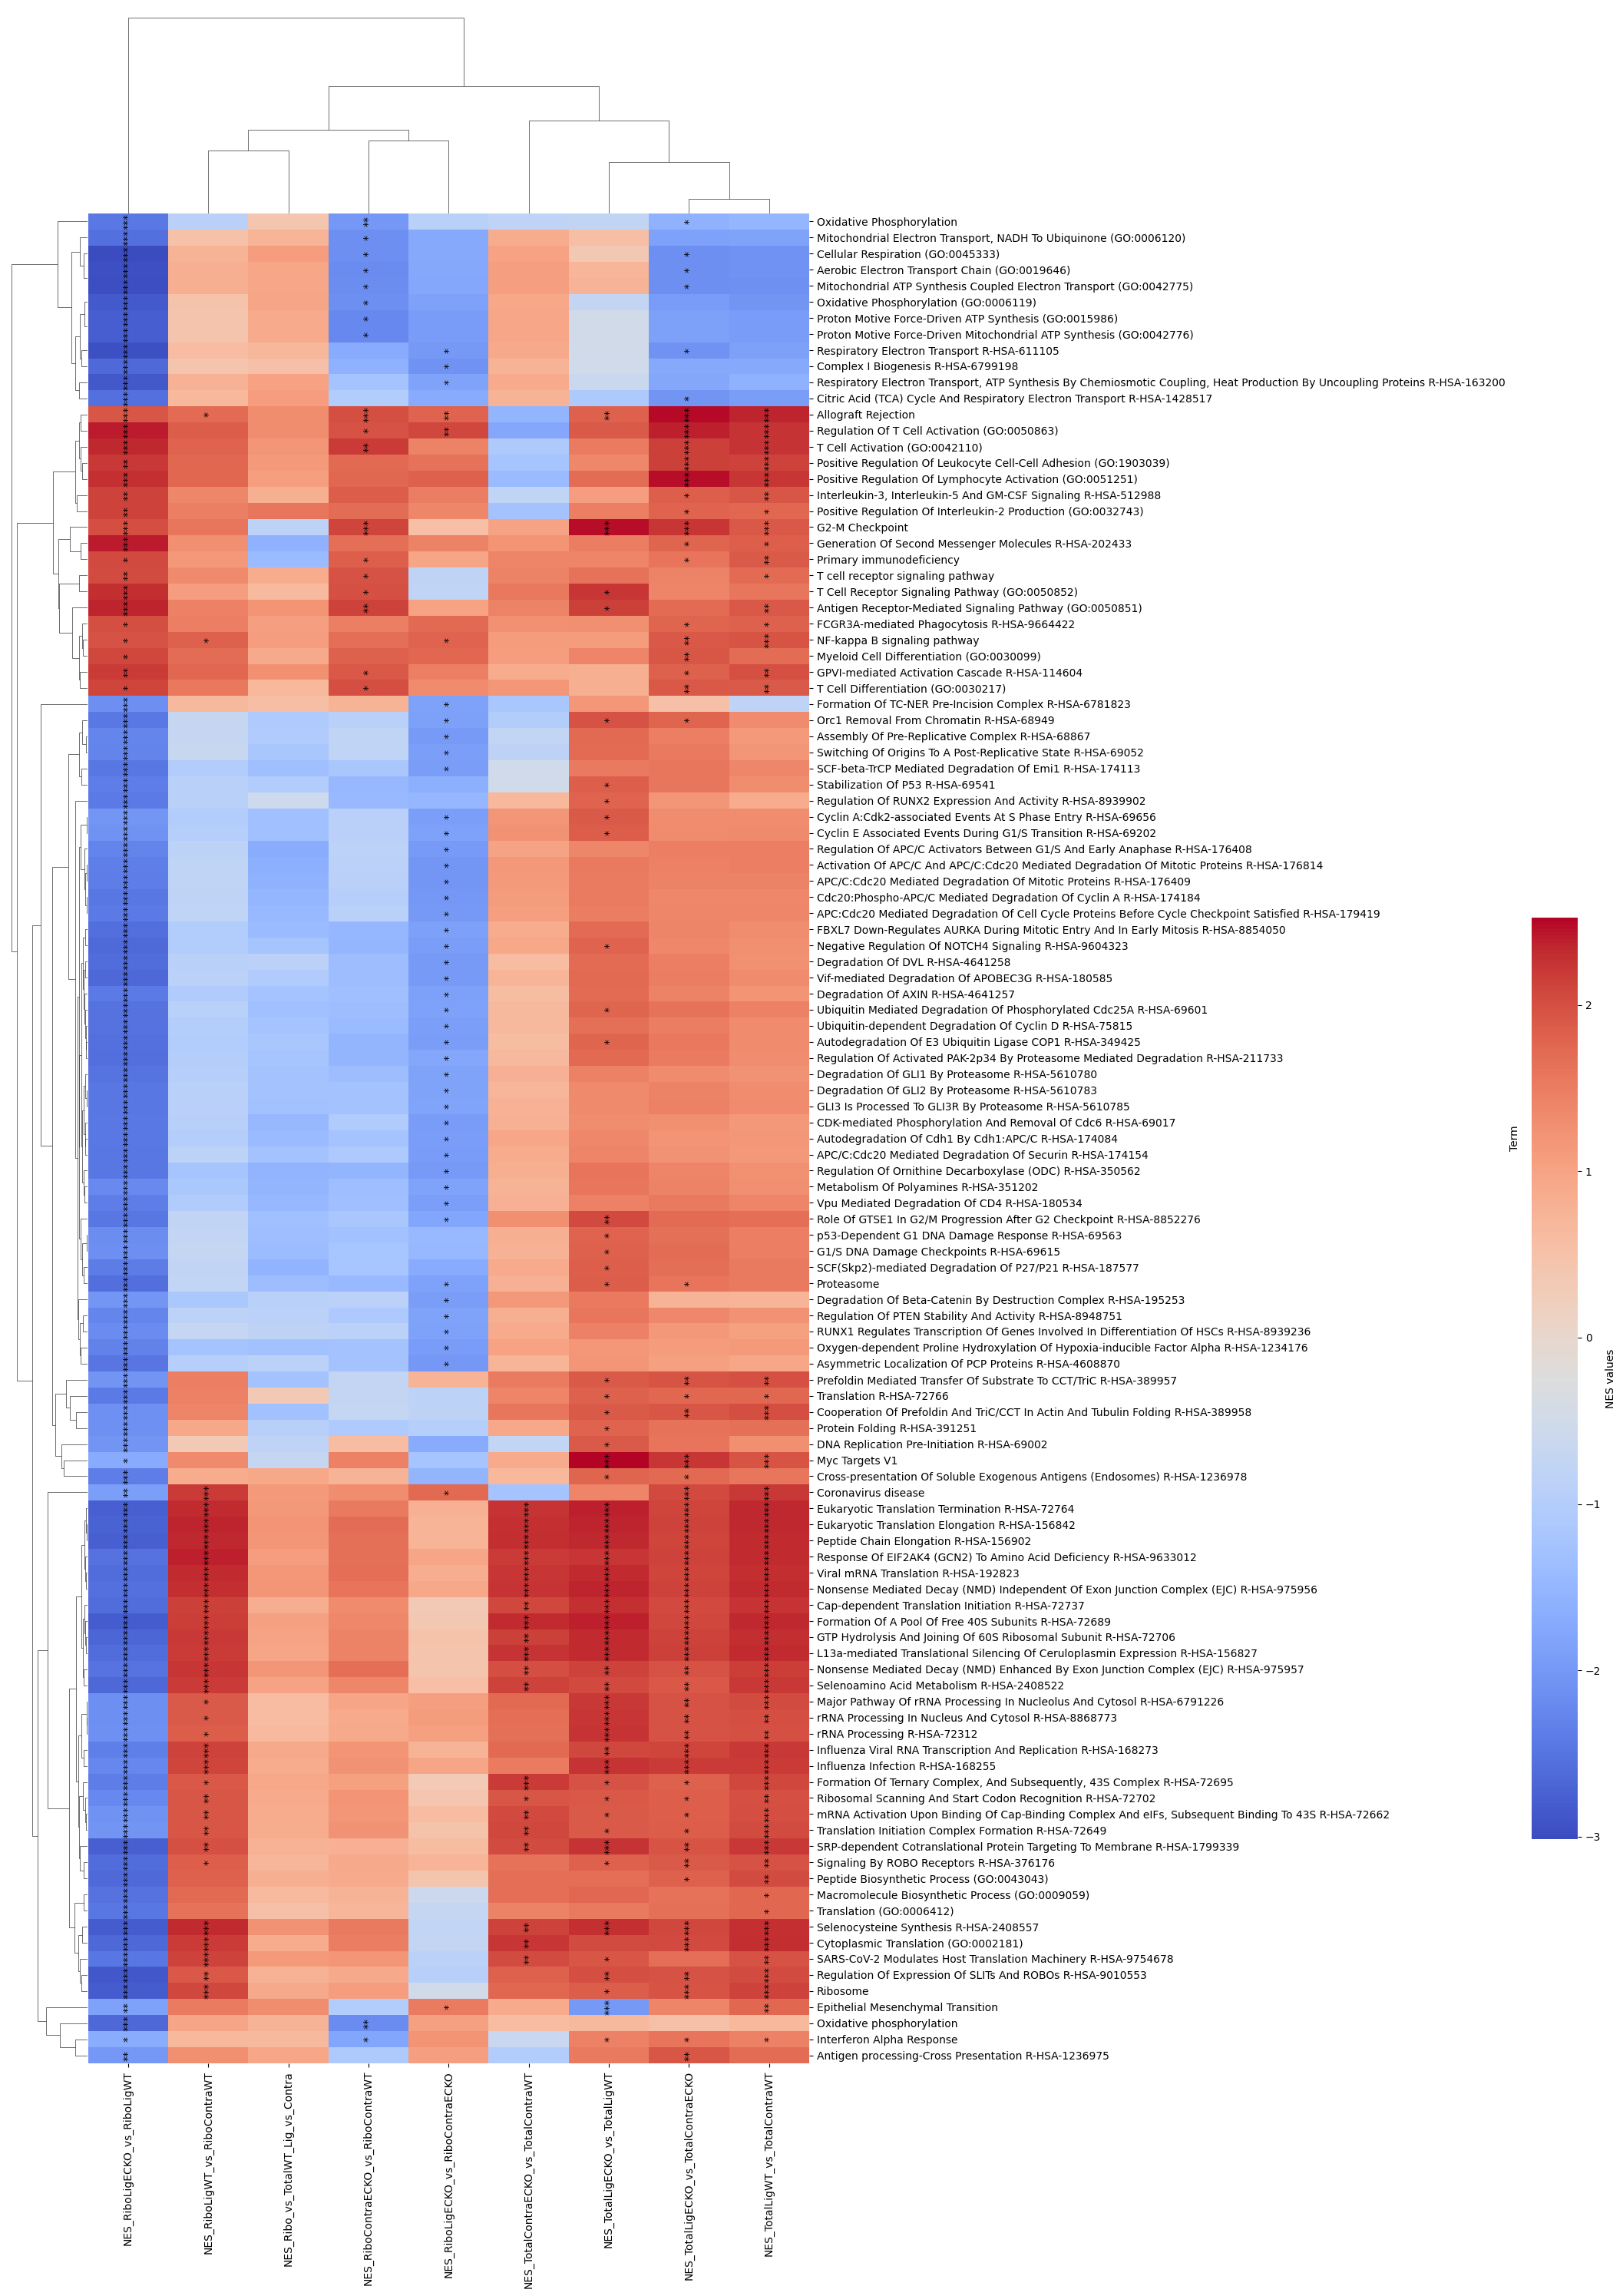

In [33]:
#This is filtered for significant in ribo ECKO vs WT

# List of FWER columns in the merged dataframe
fw_cols = [col for col in combined_df_filt.columns if 'q-val' in col]

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in combined_df_filt.columns if 'NES' in col]

# Create a mask for rows with q-value < 0.1 in at least one datasets
qval_mask = (combined_df_filt[fw_cols] < 0.05).sum(axis=1) >= 2

# For direction, count the number of positive and negative values in direction_cols
positive_counts = (combined_df_filt[direction_cols] > 0).sum(axis=1)
negative_counts = (combined_df_filt[direction_cols] < 0).sum(axis=1)

# Create masks for rows where the count of positive values or negative values is greater than 12
positive_direction_mask = positive_counts > 0
negative_direction_mask = negative_counts > 0

# Combine the two masks using bitwise OR operator
direction_mask = positive_direction_mask | negative_direction_mask

# Create a mask for rows with padj < 0.05 for RiboLigECKO vs RiboLiqWT
padj_columns = [col for col in combined_df_filt.columns if 'FWER p-val_RiboLigECKO_vs_RiboLigWT' in col]
padj_mask = combined_df_filt[padj_columns].apply(lambda x: x < 0.1).any(axis=1)

# Combine the qval_mask with the padj_mask
final_mask = qval_mask & padj_mask & direction_mask

# Filter the DataFrame based on the combined mask and specific terms
#filter_strings = ["KEGG", "MSigDB", "BrainEC_TardbpSI", "p3", "p1", "CardiacEC", "CarotidEC", "BrainEC_TardbpKO", "BrainEC_TardbpECKO", "BrainEC_TardbpKO", "HuAEC"]  # Replace with your specific strings
#string_mask = combined_df['Term'].str.contains('|'.join(filter_strings))
#final_mask = final_mask & string_mask
filtered_GSEA_df = combined_df_filt[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index, columns=direction_cols)  # Only NES columns needed

# Corrected part for creating the significance matrix
for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Transpose the data
transposed_data_for_heatmap = data_for_heatmap.T

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(20, 30),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix to match the clustered heatmap
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:  # Only add text if there are asterisks
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=90)

# Save the figure with 600 dpi
g.fig.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/HeatMapNetwork__base100_weight1_byStat_riboECKOreg.pdf', dpi=600, format='pdf')

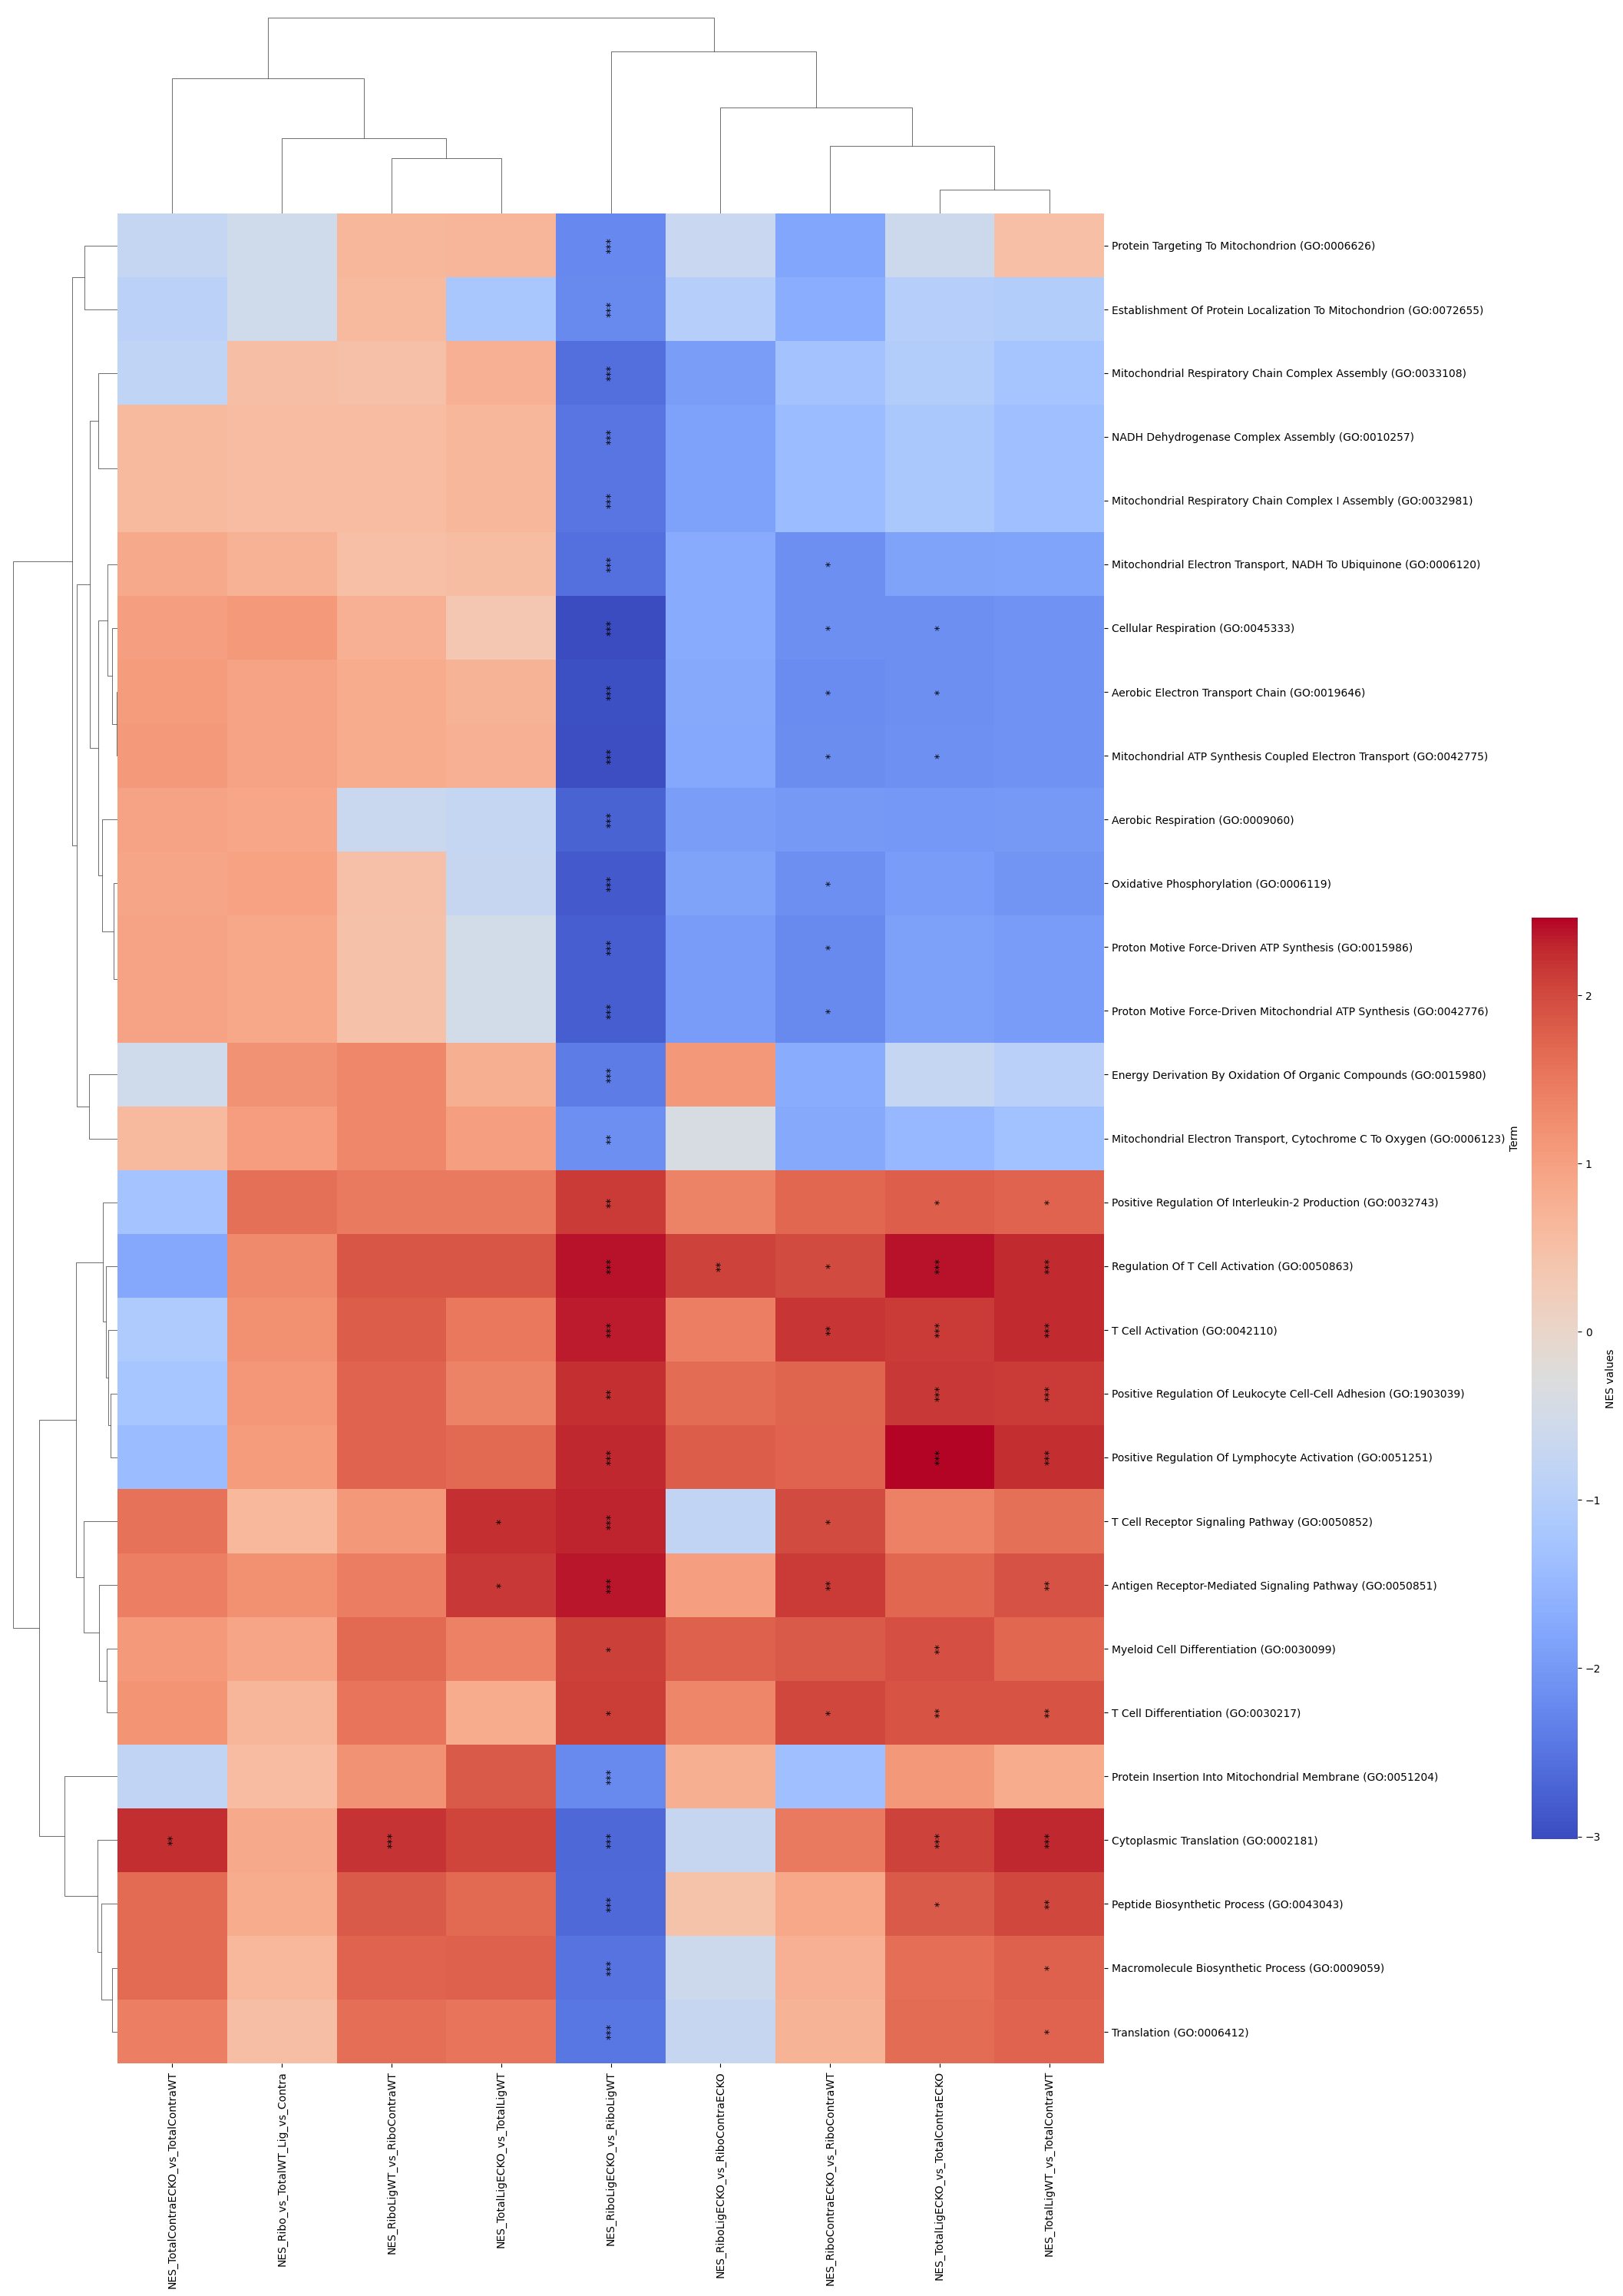

In [50]:
#This is filtering for NES different between low flow ribosome response of ribosome lig WT vs ribosome contra WT and ribosomal lig ECKO vs WT

# List of FWER columns in the merged dataframe
fw_cols = [col for col in combined_df_filt.columns if 'q-val' in col]

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in combined_df_filt.columns if 'NES' in col]

# Create a mask for rows with q-value < 0.1 in at least one datasets
qval_mask = (combined_df_filt[fw_cols] < 0.05).sum(axis=1) >= 1

# Create a mask for rows with "Hallmark" in the "GeneSet" column
geneset_mask = combined_df_filt['GeneSetType'].str.contains('GoTerm')

# For direction, count the number of positive and negative values in direction_cols
positive_counts = (combined_df_filt[direction_cols] > 0).sum(axis=1)
negative_counts = (combined_df_filt[direction_cols] < 0).sum(axis=1)

# Create masks for rows where the count of positive values or negative values is greater than 12
positive_direction_mask = positive_counts > 0
negative_direction_mask = negative_counts > 0

# Combine the two masks using bitwise OR operator
direction_mask = positive_direction_mask | negative_direction_mask

# Create a mask for rows with padj < 0.05 for RiboLigECKO vs RiboLiqWT
padj_columns = [col for col in combined_df_filt.columns if 'FWER p-val_RiboLigECKO_vs_RiboLigWT' in col]
padj_mask = combined_df_filt[padj_columns].apply(lambda x: x < 0.1).any(axis=1)

# Combine the qval_mask with the padj_mask
final_mask = qval_mask & padj_mask & direction_mask & geneset_mask

# Filter the DataFrame based on the combined mask and specific terms
filtered_GSEA_df = combined_df_filt[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index, columns=direction_cols)  # Only NES columns needed

# Corrected part for creating the significance matrix
for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Transpose the data
transposed_data_for_heatmap = data_for_heatmap.T

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(20, 30),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix to match the clustered heatmap
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:  # Only add text if there are asterisks
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=90)

# Save the figure with 600 dpi
g.fig.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/HeatMapNetwork_riboECKOreg.pdf', dpi=600, format='pdf')

In [51]:
combined_df

Unnamed: 0                                               Term  \
0              0                              Inflammatory Response   
1              1                                Allograft Rejection   
2              2                          Interferon Gamma Response   
3              3                                    G2-M Checkpoint   
4              4                           IL-6/JAK/STAT3 Signaling   
...          ...                                                ...   
6250        6250           Epithelial Cell Development (GO:0002064)   
6251        6251  Regulation Of Basement Membrane Organization (...   
6252        6252               Neurotransmitter Uptake (GO:0001504)   
6253        6253  Regulation Of Glycogen (Starch) Synthase Activ...   
6254        6254  Negative Regulation Of Glial Cell Proliferatio...   

      NES_RiboLigWT_vs_RiboContraWT  NOM p-val_RiboLigWT_vs_RiboContraWT  \
0                          1.789275                             0.000000   
1                          1.723828                             0.001063   
2                          1.592389                             0.000000   
3                          1.586496                             0.001042   
4                          1.547966                             0.004566   
...                             ...                                  ...   
6250                            NaN                                  NaN   
6251                            NaN                                  NaN   
6252                            NaN                                  NaN   
6253                            NaN                                  NaN   
6254                            NaN                                  NaN   

      FDR q-val_RiboLigWT_vs_RiboContraWT  \
0                                0.013847   
1                                0.021233   
2                                0.070775   
3                                0.057235   
4                                0.064805   
...                                   ...   
6250                                  NaN   
6251                                  NaN   
6252                                  NaN   
6253                                  NaN   
6254                                  NaN   

      FWER p-val_RiboLigWT_vs_RiboContraWT Tag %_RiboLigWT_vs_RiboContraWT  \
0                                    0.015                          44/133   
1                                    0.046                          44/133   
2                                    0.207                          46/163   
3                                    0.221                          91/175   
4                                    0.294                           26/64   
...                                    ...                             ...   
6250                                   NaN                             NaN   
6251                                   NaN                             NaN   
6252                                   NaN                             NaN   
6253                                   NaN                             NaN   
6254                                   NaN                             NaN   

                   Lead_genes_RiboLigWT_vs_RiboContraWT  \
0     CCL2;IL1B;PIK3R5;MSR1;IL10RA;CD48;ACVR2A;TLR1;...   
1     CCL2;IL1B;GPR65;ACVR2A;FGR;CCR2;TLR1;CCR5;SIT1...   
2     SLAMF7;CCL2;FCGR1A;MX1;IRF5;IL10RA;P2RY14;AUTS...   
3     PRC1;SMC1A;TTK;MYBL2;MARCKS;PDS5B;TRAIP;INCENP...   
4     IL1B;PIK3R5;CXCL9;CSF2RB;HMOX1;CSF2RA;CCL7;PIM...   
...                                                 ...   
6250                                                NaN   
6251                                                NaN   
6252                                                NaN   
6253                                                NaN   
6254                                                NaN   

      NES_TotalLigECKO_vs_TotalLigWT  NOM p-val_Total

In [52]:
filtered_GSEA_df

Unnamed: 0                                               Term  \
1955        1955               Cytoplasmic Translation (GO:0002181)   
1972        1972       Regulation Of T Cell Activation (GO:0050863)   
1989        1989          Peptide Biosynthetic Process (GO:0043043)   
2001        2001                     T Cell Activation (GO:0042110)   
2038        2038  Positive Regulation Of Leukocyte Cell-Cell Adh...   
2041        2041  Positive Regulation Of Lymphocyte Activation (...   
2048        2048    Macromolecule Biosynthetic Process (GO:0009059)   
2096        2096          Myeloid Cell Differentiation (GO:0030099)   
2196        2196                           Translation (GO:0006412)   
2326        2326                T Cell Differentiation (GO:0030217)   
2548        2548  Positive Regulation Of Interleukin-2 Productio...   
2602        2602  Antigen Receptor-Mediated Signaling Pathway (G...   
3002        3002  Energy Derivation By Oxidation Of Organic Comp...   
3030        3030  Mitochondrial Electron Transport, Cytochrome C...   
3576        3576  Protein Insertion Into Mitochondrial Membrane ...   
3986        3986     T Cell Receptor Signaling Pathway (GO:0050852)   
5196        5196      Aerobic Electron Transport Chain (GO:0019646)   
5229        5229  Mitochondrial ATP Synthesis Coupled Electron T...   
5401        5401                  Cellular Respiration (GO:0045333)   
5763        5763    Protein Targeting To Mitochondrion (GO:0006626)   
5781        5781                   Aerobic Respiration (GO:0009060)   
5932        5932  Establishment Of Protein Localization To Mitoc...   
5947        5947   NADH Dehydrogenase Complex Assembly (GO:0010257)   
5948        5948  Mitochondrial Respiratory Chain Complex I Asse...   
6019        6019  Mitochondrial Electron Transport, NADH To Ubiq...   
6038        6038  Mitochondrial Respiratory Chain Complex Assemb...   
6051        6051             Oxidative Phosphorylation (GO:0006119)   
6056        6056  Proton Motive Force-Driven ATP Synthesis (GO:0...   
6057        6057  Proton Motive Force-Driven Mitochondrial ATP S...   

      NES_RiboLigWT_vs_RiboContraWT  NOM p-val_RiboLigWT_vs_RiboContraWT  \
1955                       2.192391                             0.000000   
1972                       1.870766                             0.000000   
1989                       1.829189                             0.000000   
2001                       1.804517                             0.000000   
2038                       1.750821                             0.001339   
2041                       1.747589                             0.005236   
2048                       1.739871                             0.000000   
2096                       1.690498                             0.006468   
2196                       1.622301                             0.000000   
2326                       1.558114                             0.013977   
2548                       1.478675                             0.054852   
2602                       1.453276                             0.030093   
3002                       1.327401                             0.121622   
3030                       1.320030                             0.176730   
3576                       1.188372                             0.238160   
3986                       1.092766                             0.340024   
5196                       0.826056                             0.738975   
5229                       0.817935                             0.749400   
5401                       0.771133                             0.842907   
5763                       0.659481                             0.944649   
5781                      -0.654344                             0.969231   
5932                       0.579490                             0.973552   
5947                       0.567487                             0.980892   
5948                       0.567487                

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40661/2584456274.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_filt['RiboLigECKO_vs_RiboLigWT_hits'] = pd.to_numeric(combined_df_filt['Tag %_RiboLigECKO_vs_RiboLigWT'].str.split('/').str[0], errors='coerce')
/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40661/2584456274.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_filt.dropna(subset=['RiboLigECKO_vs_RiboLigWT_hits'], inplace=True)
/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40661/258445627

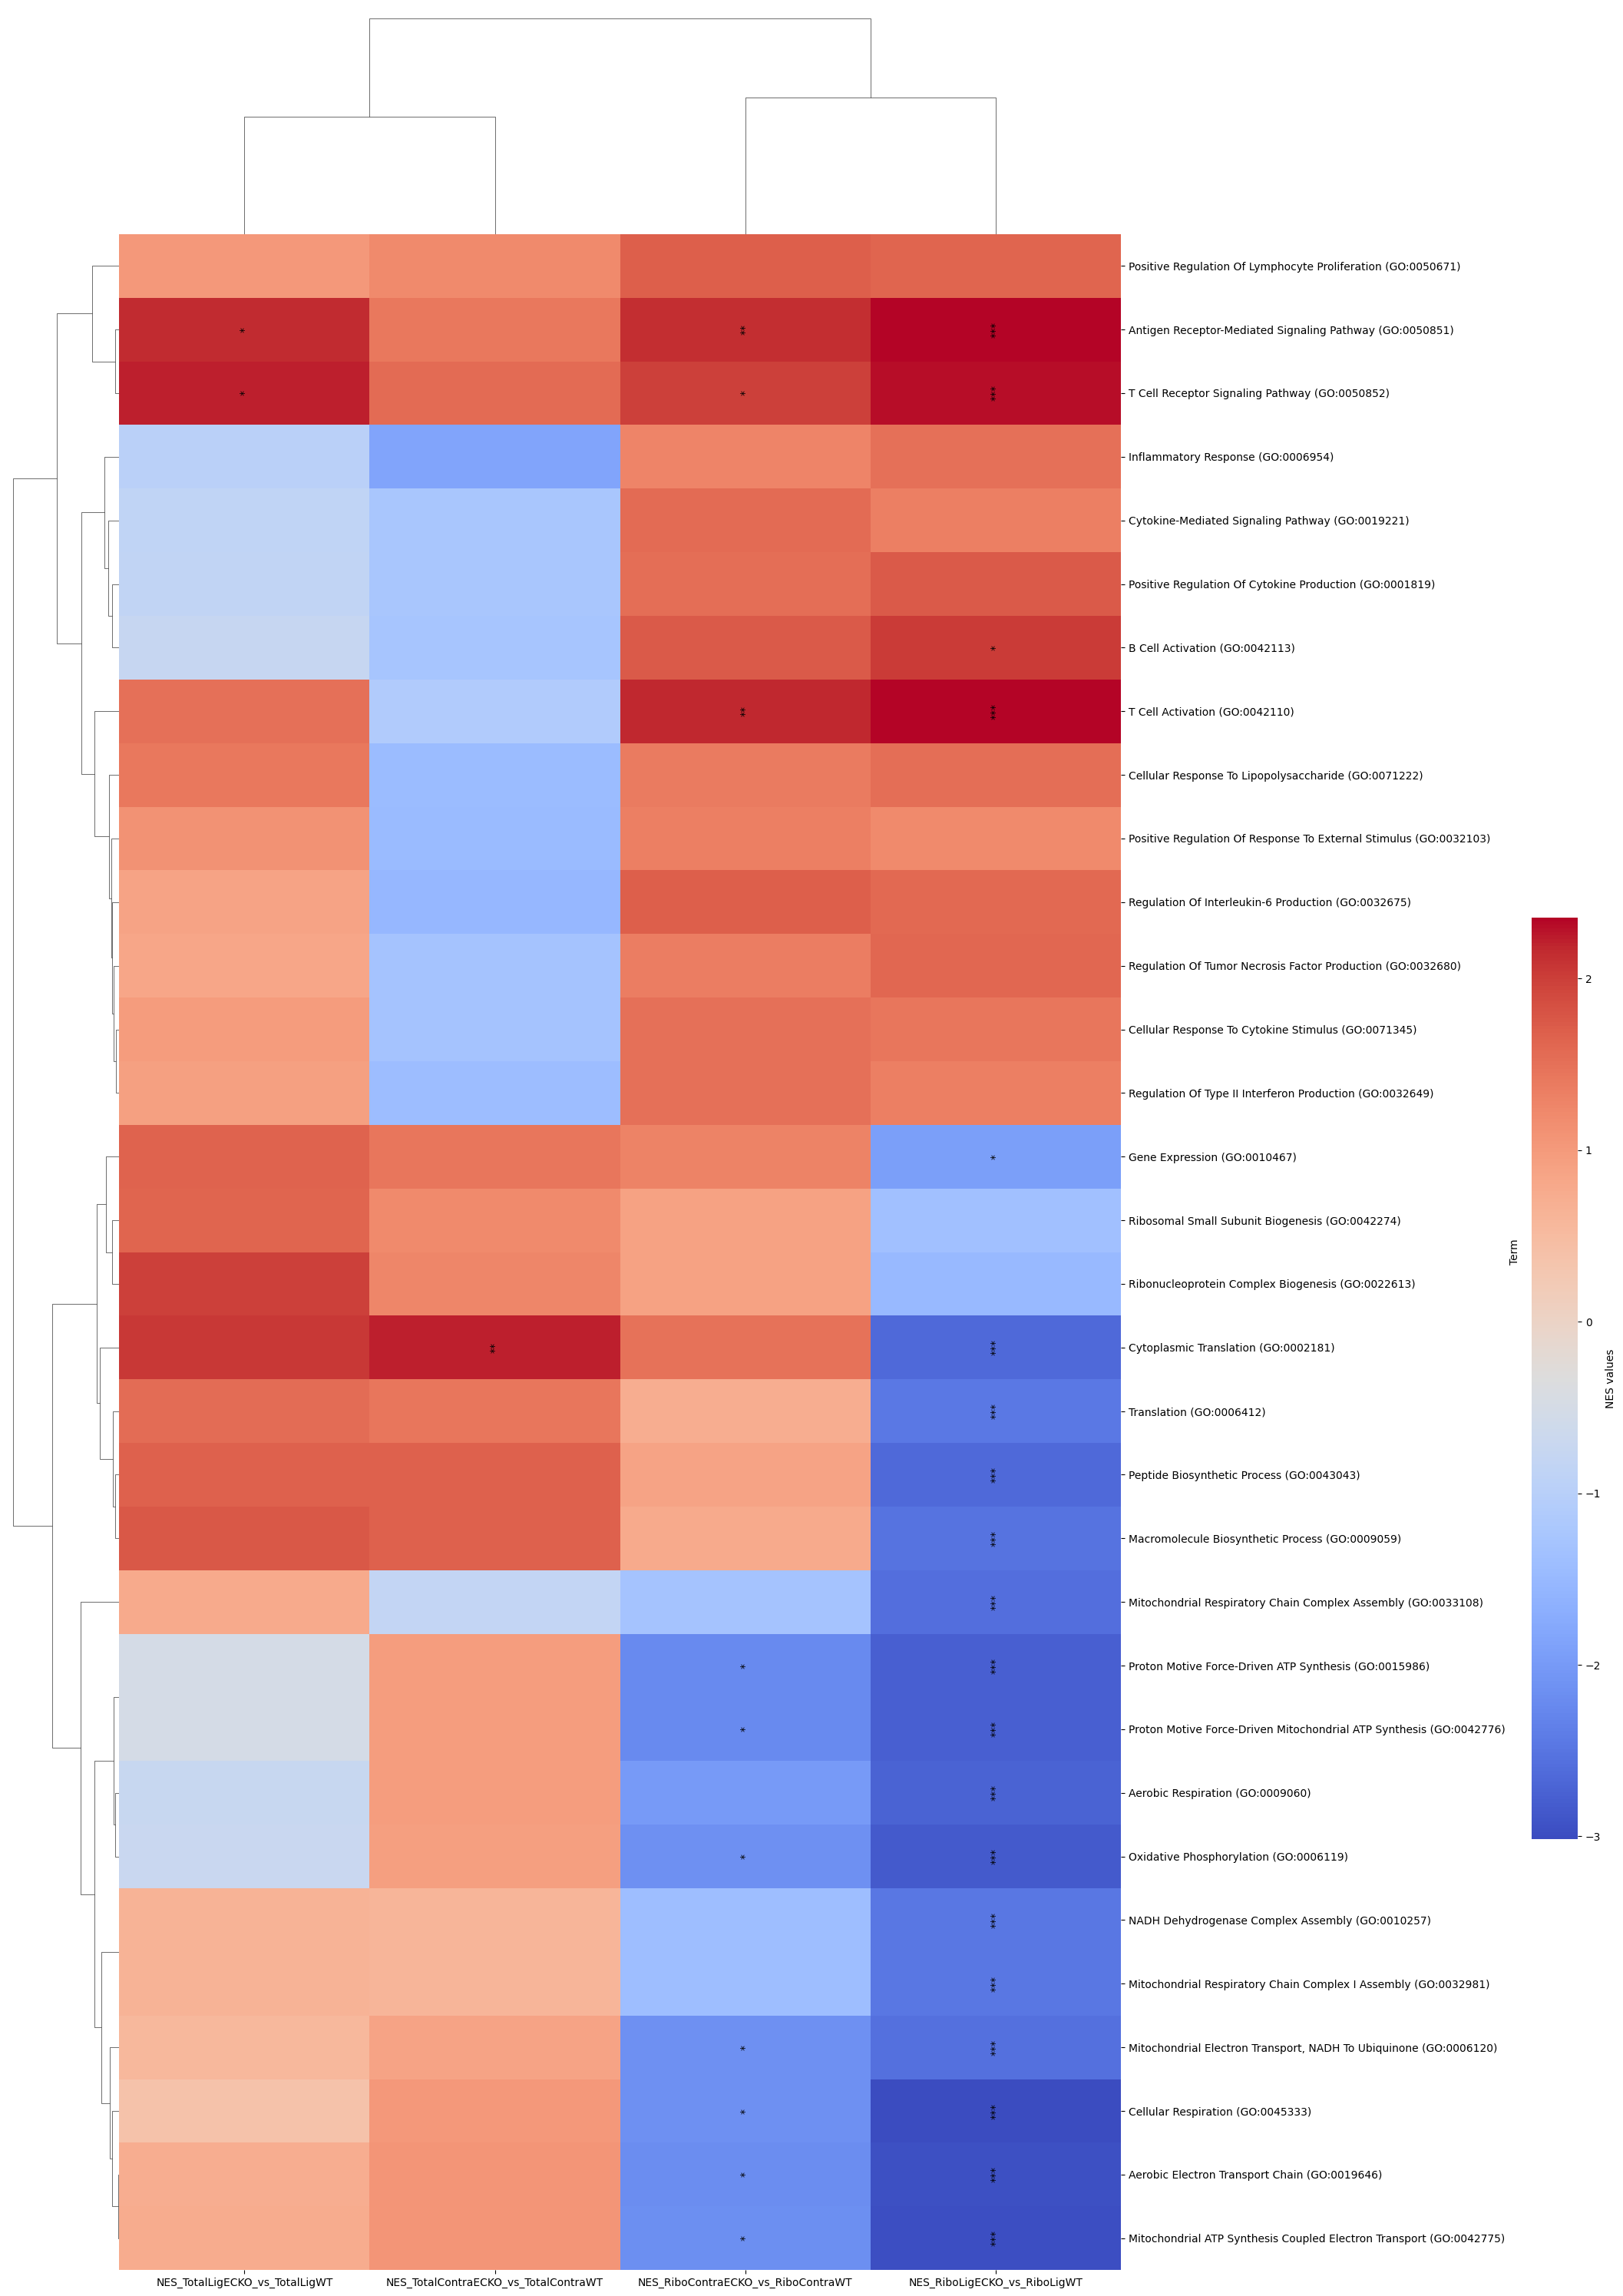

In [296]:
#This is filtering for NES different between low flow ribosome response of ribosome lig WT vs ribosome contra WT and ribosomal lig ECKO vs WT
combined_df = combined_df_GSEA.copy()

# Filter columns containing a specific string
columns_to_keep = [col for col in combined_df.columns if 'GeneSetType' in col or
                                                   'Term' in col or
                                                   'TotalLigECKO_vs_TotalLigWT' in col or
                                                   'RiboContraECKO_vs_RiboContraWT' in col or
                                                   'TotalContraECKO_vs_TotalContraWT' in col or
                                                   'RiboLigECKO_vs_RiboLigWT' in col]

# Remove columns containing "Ribo_vs_UnboundRibo"
combined_df_filt = combined_df[columns_to_keep]

# Convert the column to numeric, coercing errors to NaN
combined_df_filt['RiboLigECKO_vs_RiboLigWT_hits'] = pd.to_numeric(combined_df_filt['Tag %_RiboLigECKO_vs_RiboLigWT'].str.split('/').str[0], errors='coerce')

# Drop NaN values:
combined_df_filt.dropna(subset=['RiboLigECKO_vs_RiboLigWT_hits'], inplace=True)

# Now, you can perform the comparison
count_mask = (combined_df_filt['RiboLigECKO_vs_RiboLigWT_hits'] > 20)

# Create a mask for rows with "Hallmark" in the "GeneSet" column
geneset_mask = combined_df_filt['GeneSetType'].str.contains('GoTerm')

# Create a mask for rows with padj < 0.05 for RiboLigWT_vs_RiboContraWT or TotalLigWT_vs_TotalContraWT
#padj_columns = [col for col in combined_df_filt.columns if 'FDR q-val_RiboLigECKO_vs_RiboLigWT' in col] #or col for col in combined_df_filt.columns if 'FDR q-val_TotalLigECKO_vs_TotalLigWT' in col]
#padj_mask = combined_df_filt[padj_columns].apply(lambda x: x < 0.05).any(axis=1)

# Create a mask for rows with padj < 0.001 for any column containing "FDR q-val"
padj_columns = [col for col in combined_df.columns if 'FDR q-val' in col]
padj_mask = combined_df[padj_columns].apply(lambda x: x < 0.001).any(axis=1)

# Combine the qval_mask with the padj_mask
final_mask = padj_mask & geneset_mask & count_mask

# Filter the DataFrame based on the combined mask and specific terms
filtered_GSEA_df = combined_df_filt[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index)  # Only NES columns needed

for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Transpose the data
transposed_data_for_heatmap = data_for_heatmap.T

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(20, 30),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix to match the clustered heatmap
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:  # Only add text if there are asterisks
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=90)

# Save the figure with 600 dpi
g.fig.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/HeatMapNetwork_ECKO_GoTerm.pdf', dpi=600, format='pdf')


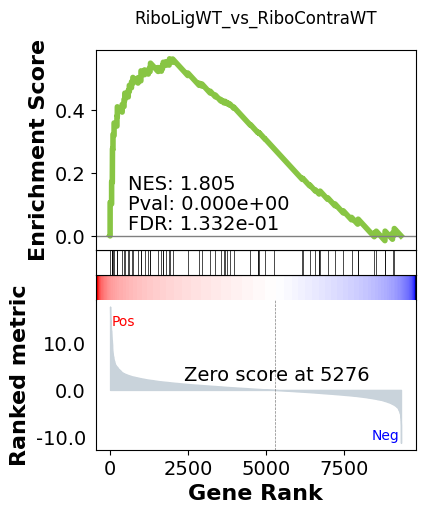

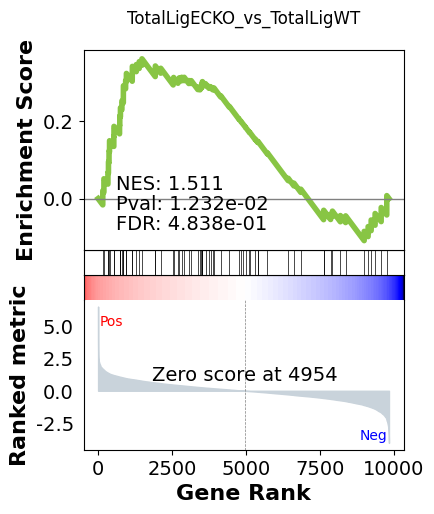

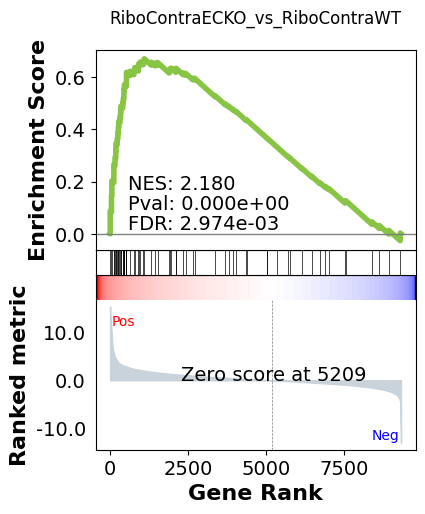

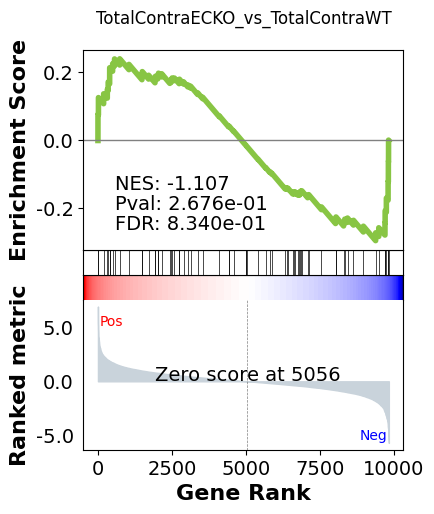

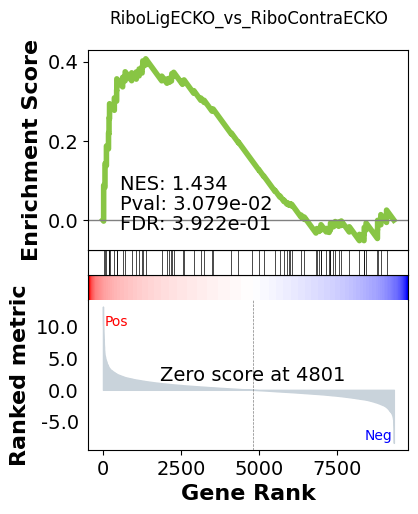

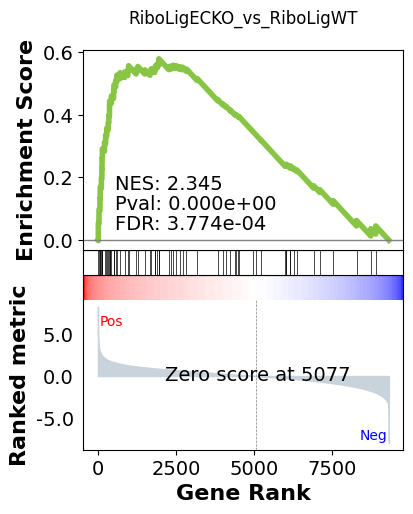

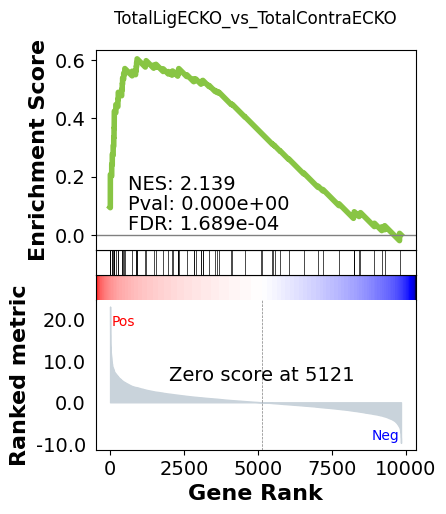

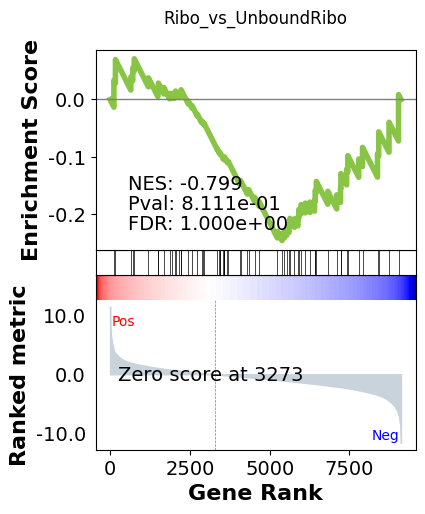

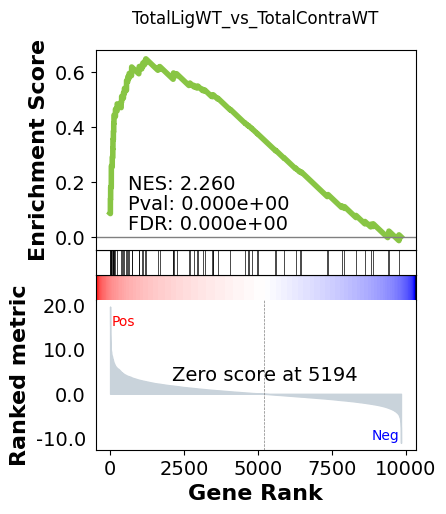

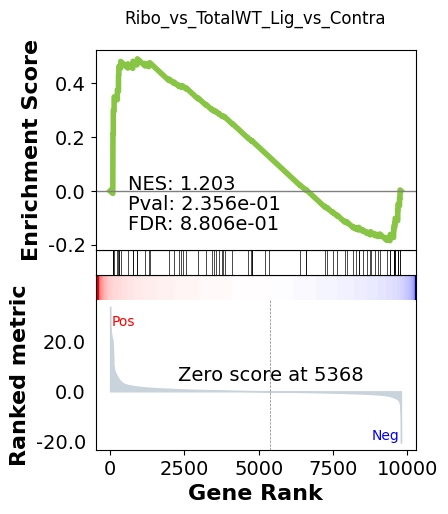

In [55]:
term_search = 'T Cell Activation (GO:0042110)'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_goterm_Hs.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

In [85]:
# Define the specific term you want to filter for
specific_term = "T Cell Activation (GO:0042110)"

# Filter the DataFrame based on the specific term
specific_term_data = combined_df[combined_df['Term'] == specific_term]

# Extract and print only the Lead_genes columns for the specific term
lead_genes_columns = [col for col in specific_term_data.columns if 'Lead_genes' in col]
lead_genes_data = specific_term_data[lead_genes_columns]

# Print the Lead_genes columns for the specific term
print(f"Lead_genes for the term '{specific_term}':")
print(lead_genes_data)

Lead_genes for the term 'T Cell Activation (GO:0042110)':
                   Lead_genes_RiboLigWT_vs_RiboContraWT  \
1997  SLAMF7;CD84;KIT;NLRC3;SOX4;SLAMF9;CHD7;PIK3CG;...   

                  Lead_genes_TotalLigECKO_vs_TotalLigWT  \
1997  CD247;CD8A;NCOR2;CD3G;CTPS1;SCRIB;PTPN22;ITK;C...   

              Lead_genes_RiboContraECKO_vs_RiboContraWT  \
1997  SLAMF7;CD84;NLRC3;LCK;PIK3CG;PTPRC;SOX4;CD4;SL...   

         Lead_genes_TotalContraECKO_vs_TotalContraWT  \
1997  SLAMF9;CLEC7A;CD7;PIK3R1;CD74;ORC3;CD86;SLAMF7   

               Lead_genes_RiboLigECKO_vs_RiboContraECKO  \
1997  KIT;SLAMF9;CD74;DLL4;CD44;CHD7;SLAMF7;MDK;SOX4...   

                    Lead_genes_RiboLigECKO_vs_RiboLigWT  \
1997  LCK;CD8B;CD8A;SLA2;MFAP3;CD44;CD4;ZAP70;PTPRC;...   

             Lead_genes_TotalLigECKO_vs_TotalContraECKO  \
1997  CD74;CLEC7A;LCP1;PIK3CD;SLAMF7;SLAMF9;LY9;CD44...   

                         Lead_genes_Ribo_vs_UnboundRibo  \
1997  KIF13B;MICB;PIK3R3;ITK;PTPN2;EIF2AK4;RASGRP1;S... 

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40661/2060186591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NES'] = pd.to_numeric(filtered_df['NES'])


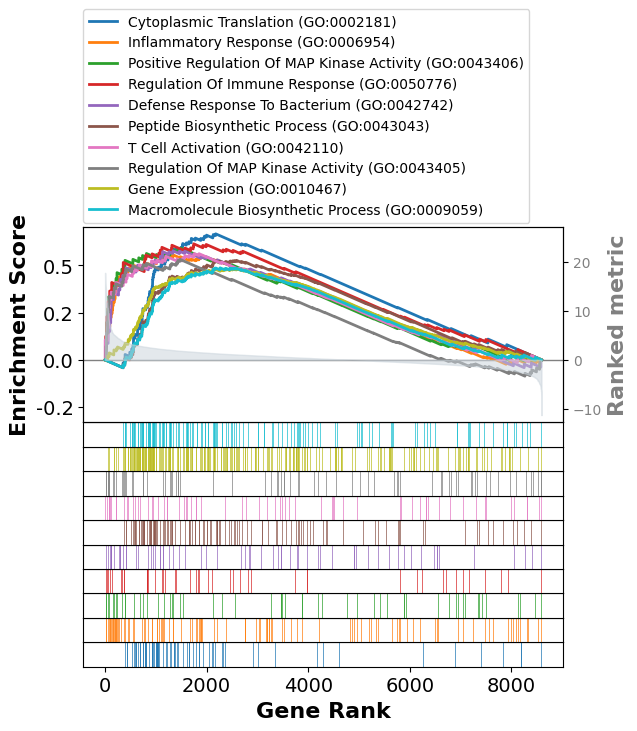

In [57]:
# Results set
result = Log2FC_RiboLigWT_vs_RiboContraWT_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs
title = 'RiboLigWT_vs_RiboContraWT'

# Convert the "Tag %" column to string
result.res2d['Tag %'] = result.res2d['Tag %'].astype(str)

# Split the "Tag %" column and convert to integer
result.res2d['hits'] = result.res2d['Tag %'].str.split('/').str[0].astype(int)

# Filter terms based on the condition
filtered_df = result.res2d[result.res2d['hits'] > 20]

# Convert 'NES' column to numeric
filtered_df['NES'] = pd.to_numeric(filtered_df['NES'])

# Filter rows with positive NES scores
positive_nes_terms = filtered_df[filtered_df['NES'] > 0].nlargest(10, 'NES')['Term']

# Filter rows with negative NES scores
negative_nes_terms = filtered_df[filtered_df['NES'] < 0].nsmallest(5, 'NES')['Term']

# Use positive and negative NES terms
filtered_terms = list(positive_nes_terms) #+ list(negative_nes_terms)

# Plot using the filtered terms
axs = result.plot(
    terms=filtered_terms,
    show_ranking=True,
    figsize=(12, 12)
)

# Export the plot as a PDF file with the result variable in the file name
plt.savefig(f'/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/{title}.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40661/3279367767.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NES'] = pd.to_numeric(filtered_df['NES'])


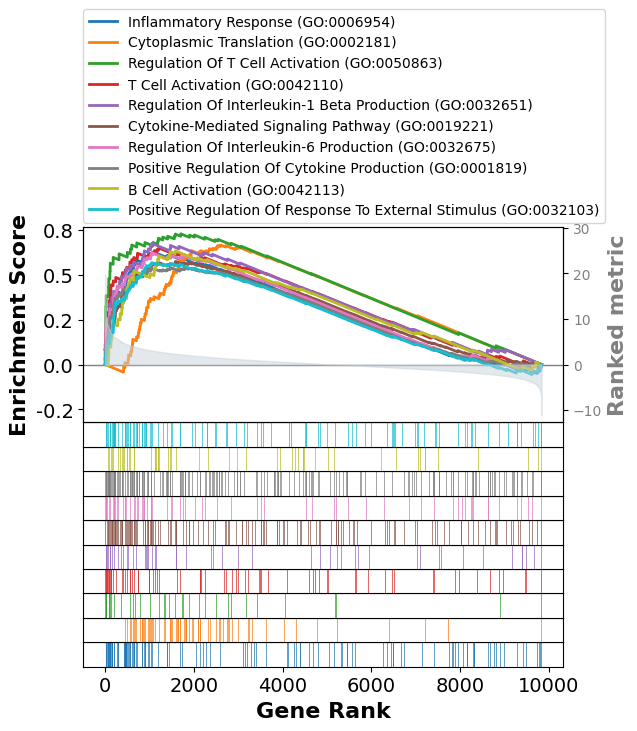

In [58]:
# Results set
result = Log2FC_TotalLigWT_vs_TotalContraWT_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs
title = 'TotalLigWT_vs_TotalContraWT'

# Convert the "Tag %" column to string
result.res2d['Tag %'] = result.res2d['Tag %'].astype(str)

# Split the "Tag %" column and convert to integer
result.res2d['hits'] = result.res2d['Tag %'].str.split('/').str[0].astype(int)

# Filter terms based on the condition
filtered_df = result.res2d[result.res2d['hits'] > 20]

# Convert 'NES' column to numeric
filtered_df['NES'] = pd.to_numeric(filtered_df['NES'])

# Filter rows with positive NES scores
positive_nes_terms = filtered_df[filtered_df['NES'] > 0].nlargest(10, 'NES')['Term']

# Filter rows with negative NES scores
negative_nes_terms = filtered_df[filtered_df['NES'] < 0].nsmallest(5, 'NES')['Term']

# Use positive and negative NES terms
filtered_terms = list(positive_nes_terms)# + list(negative_nes_terms)

# Plot using the filtered terms
axs = result.plot(
    terms=filtered_terms,
    show_ranking=True,
    figsize=(12, 12)
)

# Export the plot as a PDF file with the result variable in the file name
plt.savefig(f'/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/{title}.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40661/1276195558.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NES'] = pd.to_numeric(filtered_df['NES'])


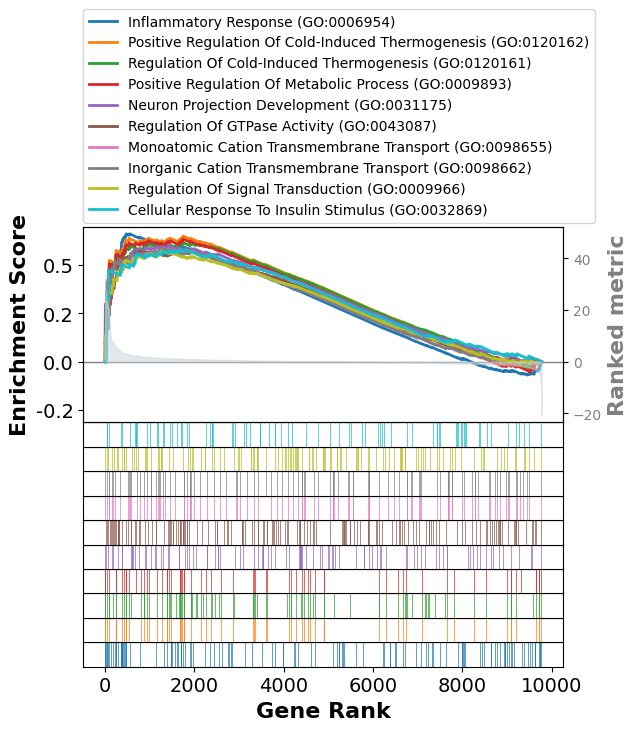

In [59]:
# Results set
result = Log2FC_TotalvRiboWT_Lig_vs_Contra_HsGeneID_rankedGSEA_log2_weight1_goterm_Hs
title = 'TotalvRiboWT_Lig_vs_Contra'

# Convert the "Tag %" column to string
result.res2d['Tag %'] = result.res2d['Tag %'].astype(str)

# Split the "Tag %" column and convert to integer
result.res2d['hits'] = result.res2d['Tag %'].str.split('/').str[0].astype(int)

# Filter terms based on the condition
filtered_df = result.res2d[result.res2d['hits'] > 20]

# Convert 'NES' column to numeric
filtered_df['NES'] = pd.to_numeric(filtered_df['NES'])

# Filter rows with positive NES scores
positive_nes_terms = filtered_df[filtered_df['NES'] > 0].nlargest(10, 'NES')['Term']

# Filter rows with negative NES scores
negative_nes_terms = filtered_df[filtered_df['NES'] < 0].nsmallest(5, 'NES')['Term']

# Use positive and negative NES terms
filtered_terms = list(positive_nes_terms) #+ list(negative_nes_terms)

# Plot using the filtered terms
axs = result.plot(
    terms=filtered_terms,
    show_ranking=True,
    figsize=(12, 12)
)

# Export the plot as a PDF file with the result variable in the file name
plt.savefig(f'/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/{title}.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [60]:
combined_df['RiboLigWT_vs_RiboContraWT_hits'] = pd.to_numeric(combined_df['Tag %_RiboLigWT_vs_RiboContraWT'].str.split('/').str[0], errors='coerce')

In [61]:
pval_qval_columns

['FDR q-val_TotalLigECKO_vs_TotalLigWT',
 'FDR q-val_RiboContraECKO_vs_RiboContraWT',
 'FDR q-val_TotalContraECKO_vs_TotalContraWT',
 'FDR q-val_RiboLigECKO_vs_RiboLigWT']

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40661/1975913810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_filt['RiboLigWT_vs_RiboContraWT_hits'] = pd.to_numeric(combined_df_filt['Tag %_RiboLigWT_vs_RiboContraWT'].str.split('/').str[0], errors='coerce')
/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40661/1975913810.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_filt.dropna(subset=['RiboLigWT_vs_RiboContraWT_hits'], inplace=True)


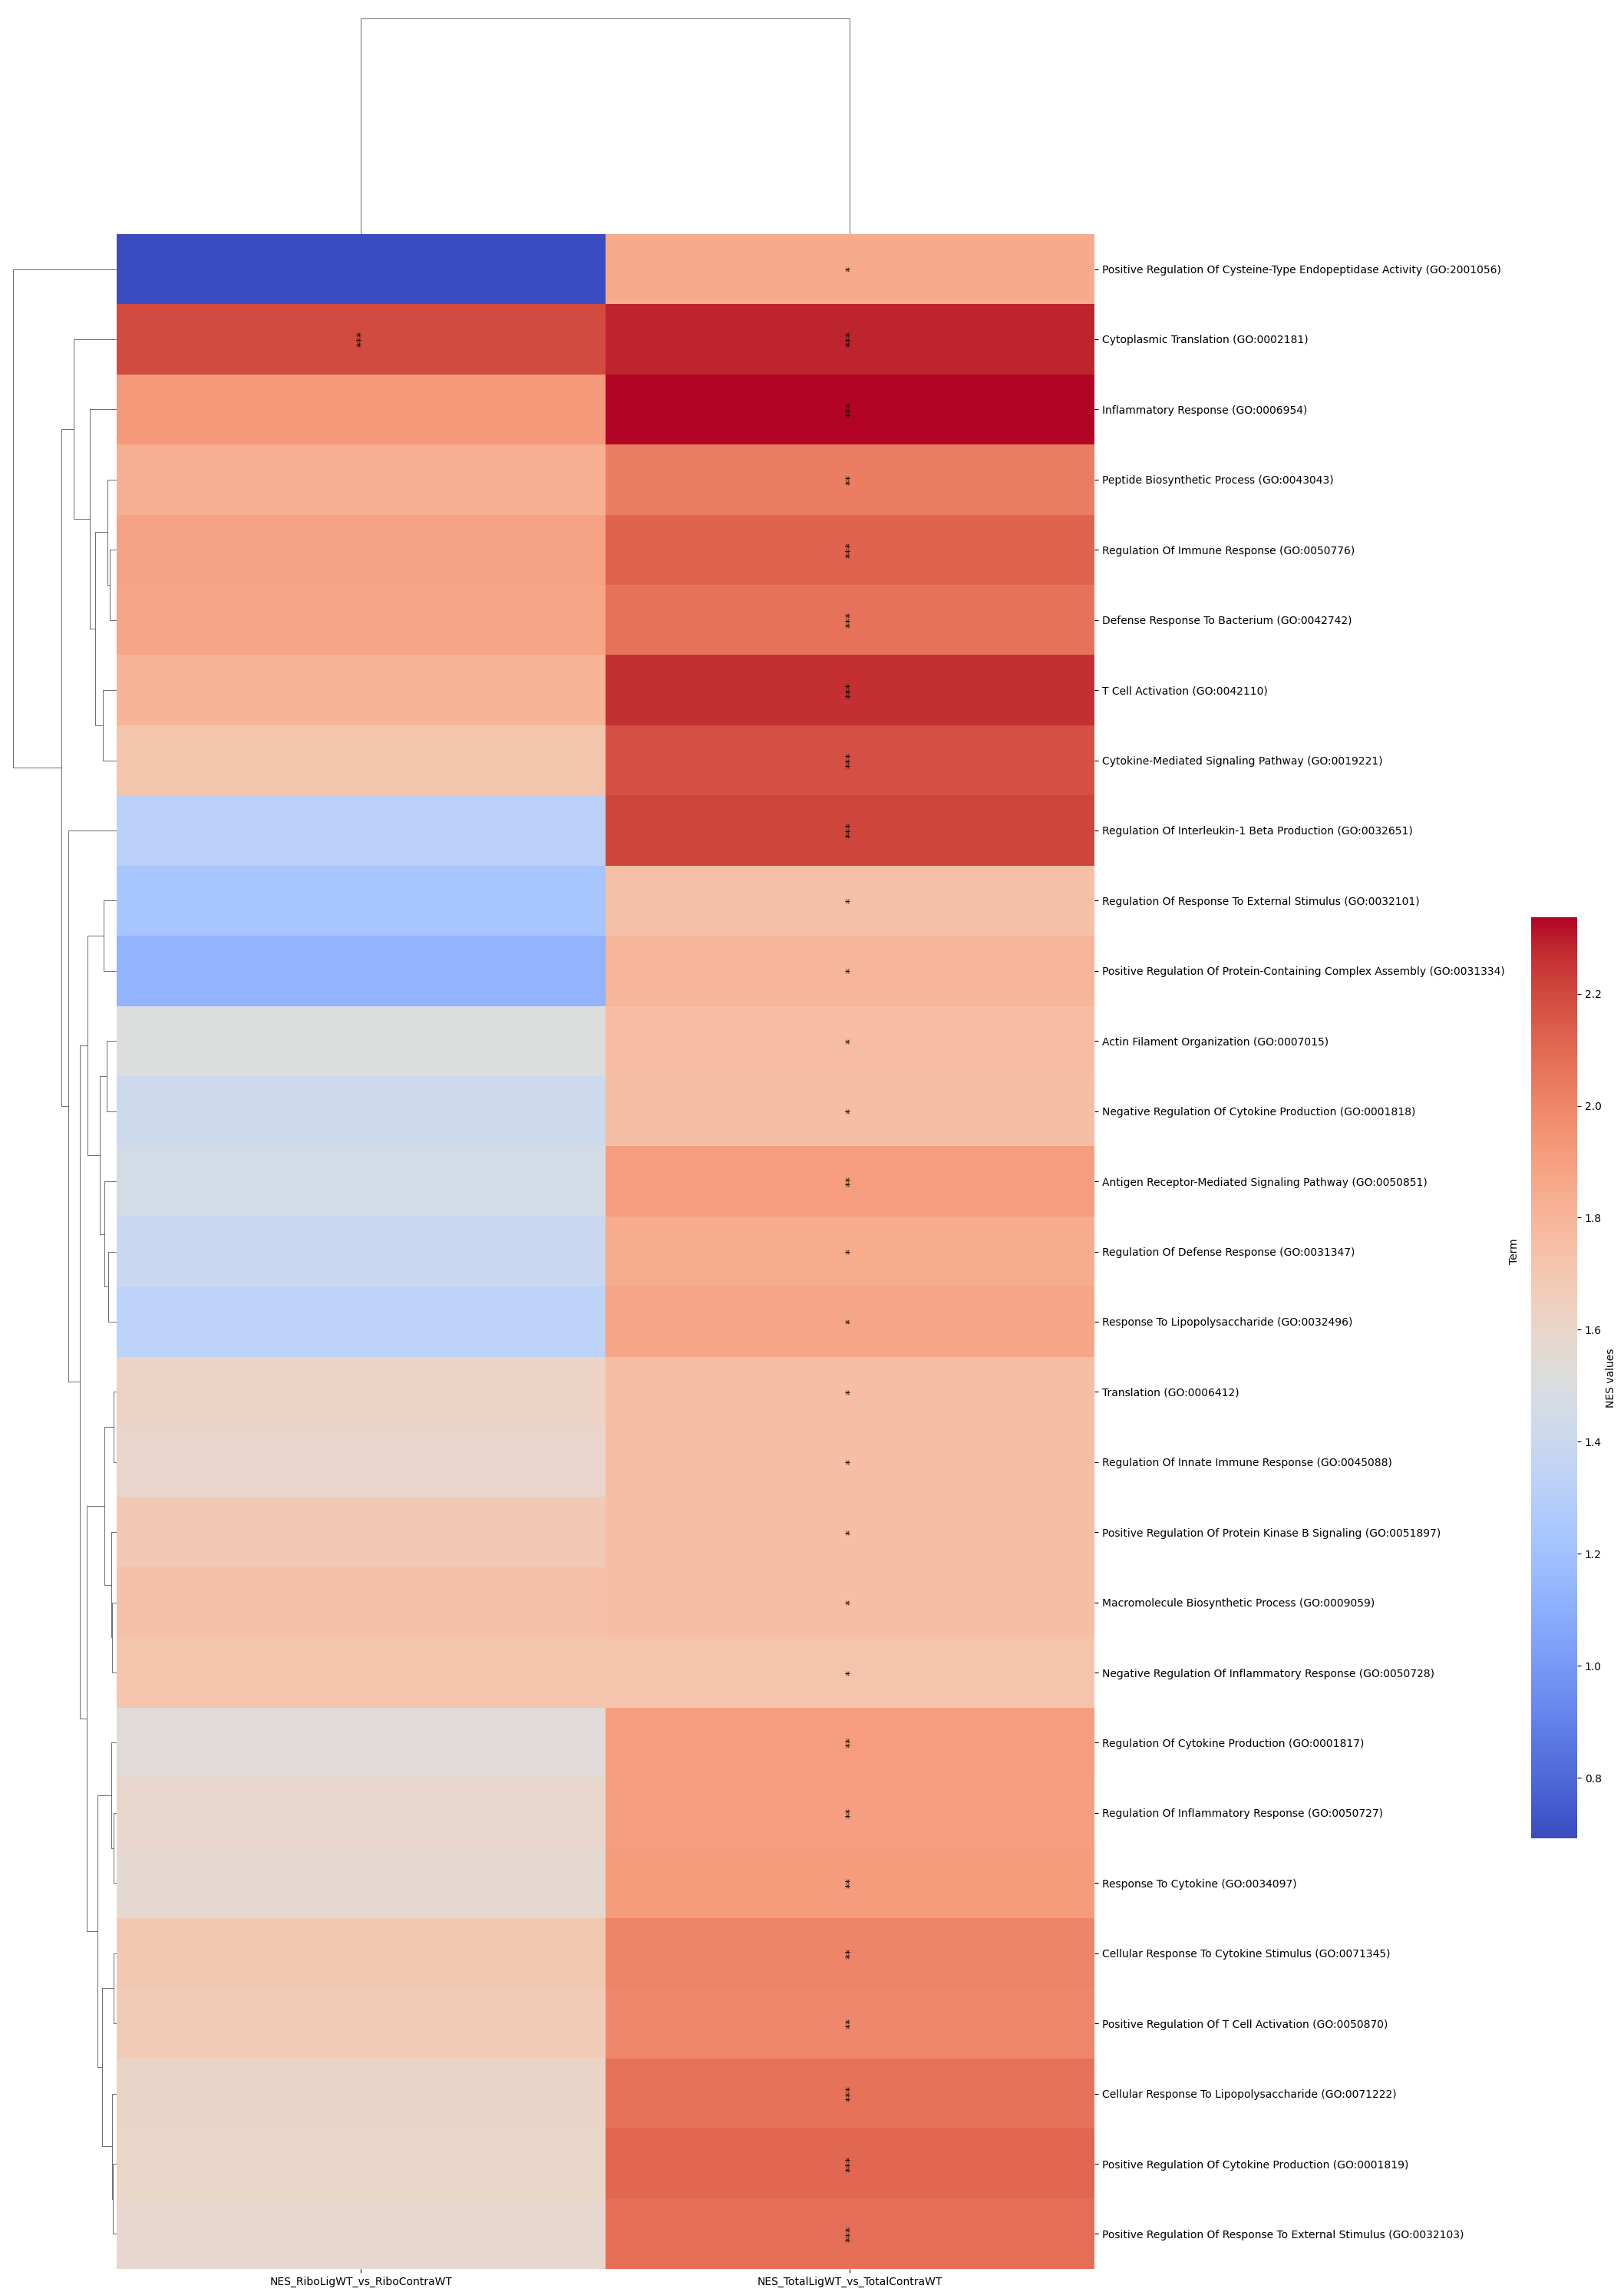

In [62]:
#This is filtering for NES different between low flow ribosome response of ribosome lig WT vs ribosome contra WT and ribosomal lig ECKO vs WT
combined_df = combined_df_GSEA.copy()

# Remove columns containing "Ribo_vs_UnboundRibo"
columns_to_keep = [col for col in combined_df.columns if 'Ribo_vs_UnboundRibo' not in col and 'ECKO' not in col and 'Ribo_vs_TotalWT' not in col]
combined_df_filt = combined_df[columns_to_keep]

# Convert the column to numeric, coercing errors to NaN
combined_df_filt['RiboLigWT_vs_RiboContraWT_hits'] = pd.to_numeric(combined_df_filt['Tag %_RiboLigWT_vs_RiboContraWT'].str.split('/').str[0], errors='coerce')

# Drop NaN values:
combined_df_filt.dropna(subset=['RiboLigWT_vs_RiboContraWT_hits'], inplace=True)

# Now, you can perform the comparison
count_mask = (combined_df_filt['RiboLigWT_vs_RiboContraWT_hits'] > 20)

# Create a mask for rows with "Hallmark" in the "GeneSet" column
geneset_mask = combined_df_filt['GeneSetType'].str.contains('GoTerm')

# Create a mask for rows with padj < 0.05 for RiboLigWT_vs_RiboContraWT or TotalLigWT_vs_TotalContraWT
padj_columns = [col for col in combined_df_filt.columns if 'FDR q-val_RiboLigWT_vs_RiboContraWT' in col or col for col in combined_df_filt.columns if 'FDR q-val_TotalLigWT_vs_TotalContraWT' in col]
padj_mask = combined_df_filt[padj_columns].apply(lambda x: x < 0.05).any(axis=1)

# Combine the qval_mask with the padj_mask
final_mask = padj_mask & geneset_mask & count_mask

# Filter the DataFrame based on the combined mask and specific terms
filtered_GSEA_df = combined_df_filt[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index)  # Only NES columns needed

# Corrected part for creating the significance matrix
for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Transpose the data
transposed_data_for_heatmap = data_for_heatmap.T

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(20, 30),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix to match the clustered heatmap
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:  # Only add text if there are asterisks
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=90)

# Save the figure with 600 dpi
g.fig.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/HeatMapNetwork_LowFlow_GoTerm.pdf', dpi=600, format='pdf')

In [22]:
#Merge DESeq2 data for scatter plots

# Add prefixes to the column names
res_RiboLigWT_vs_RiboContraWT_name = res_RiboLigWT_vs_RiboContraWT.add_prefix('Ribo_Lig_v_Contra_WT_')
res_TotalLigWT_vs_TotalContraWT_name = res_TotalLigWT_vs_TotalContraWT.add_prefix('Total_Lig_v_Contra_WT_')
res_RiboLigECKO_vs_RiboContraECKO_name = res_RiboLigECKO_vs_RiboContraECKO.add_prefix('Ribo_Lig_v_Contra_ECKO_')
res_TotalLigECKO_vs_TotalContraECKO_name = res_TotalLigECKO_vs_TotalContraECKO.add_prefix('Total_Lig_v_Contra_ECKO_')
res_RiboLigECKO_vs_RiboLigWT_name = res_RiboLigECKO_vs_RiboLigWT.add_prefix('Ribo_Lig_ECKO_v_WT_')
res_TotalLigECKO_vs_TotalLigWT_name = res_TotalLigECKO_vs_TotalLigWT.add_prefix('Total_Lig_ECKO_v_WT_')
res_Ribo_vs_UnboundRibo_name = res_Ribo_vs_UnboundRibo.add_prefix('Ribo_vs_Unbound_')
res_RiboContraECKO_vs_RiboContraWT_name = res_RiboContraECKO_vs_RiboContraWT.add_prefix('Ribo_Contra_ECKO_v_WT_')
res_TotalContraECKO_vs_TotalContraWT_name = res_TotalContraECKO_vs_TotalContraWT.add_prefix('Total_Contra_ECKO_v_WT_')

# Merge the dataframes
Lig_v_Contra_merged_results_RiboTotal = pd.merge(res_RiboLigWT_vs_RiboContraWT_name, res_TotalLigWT_vs_TotalContraWT_name, left_index=True, right_index=True)
Lig_v_Contra_merged_results_RiboTotal = pd.merge(Lig_v_Contra_merged_results_RiboTotal, res_RiboLigECKO_vs_RiboContraECKO_name, left_index=True, right_index=True)
Lig_v_Contra_merged_results_RiboTotal = pd.merge(Lig_v_Contra_merged_results_RiboTotal, res_TotalLigECKO_vs_TotalContraECKO_name, left_index=True, right_index=True)
Lig_v_Contra_merged_results_RiboTotal = pd.merge(Lig_v_Contra_merged_results_RiboTotal, res_RiboLigECKO_vs_RiboLigWT_name, left_index=True, right_index=True)
Lig_v_Contra_merged_results_RiboTotal = pd.merge(Lig_v_Contra_merged_results_RiboTotal, res_TotalLigECKO_vs_TotalLigWT_name, left_index=True, right_index=True)
Lig_v_Contra_merged_results_RiboTotal = pd.merge(Lig_v_Contra_merged_results_RiboTotal, res_Ribo_vs_UnboundRibo_name, left_index=True, right_index=True)
Lig_v_Contra_merged_results_RiboTotal = pd.merge(Lig_v_Contra_merged_results_RiboTotal, res_RiboContraECKO_vs_RiboContraWT_name, left_index=True, right_index=True)
Lig_v_Contra_merged_results_RiboTotal = pd.merge(Lig_v_Contra_merged_results_RiboTotal, res_TotalContraECKO_vs_TotalContraWT_name, left_index=True, right_index=True)

# Create the new column 'Ribo_v_Total_Diff' by subtracting two columns
Lig_v_Contra_merged_results_RiboTotal['Ribo_v_Total_Diff'] = Lig_v_Contra_merged_results_RiboTotal['Ribo_Lig_v_Contra_WT_log2FoldChange'] - Lig_v_Contra_merged_results_RiboTotal['Total_Lig_v_Contra_WT_log2FoldChange']

# Copy index to a column named 'GeneID'
Lig_v_Contra_merged_results_RiboTotal['GeneID'] = Lig_v_Contra_merged_results_RiboTotal.index

Lig_v_Contra_merged_results_RiboTotal['Human_GeneID'] = Lig_v_Contra_merged_results_RiboTotal['GeneID'].map(m2h_dict)


In [23]:
Lig_v_Contra_merged_results_RiboTotal

Ribo_Lig_v_Contra_WT_baseMean  \
0610007C21Rik                    4639.773246   
0610007L01Rik                    2666.645421   
0610007P08Rik                     546.590688   
0610007P14Rik                    1142.728931   
0610007P22Rik                     845.379926   
...                                      ...   
Zyx                             17999.501227   
Zzef1                            1521.611904   
Zzz3                             1409.880349   
a                                   9.894173   
l7Rn6                            1393.297834   

               Ribo_Lig_v_Contra_WT_log2FoldChange  \
0610007C21Rik                            -0.447447   
0610007L01Rik                             0.222973   
0610007P08Rik                            -0.197553   
0610007P14Rik                             0.200000   
0610007P22Rik                            -0.140574   
...                                            ...   
Zyx                                      -1.908390   
Zzef1                                     1.669988   
Zzz3                                      1.106667   
a                                         0.000000   
l7Rn6                                    -0.976801   

               Ribo_Lig_v_Contra_WT_lfcSE  Ribo_Lig_v_Contra_WT_stat  \
0610007C21Rik                    0.272606                  -1.641367   
0610007L01Rik                    0.297312                   0.749965   
0610007P08Rik                    0.987505                  -0.200053   
0610007P14Rik                    0.356063                   0.561698   
0610007P22Rik                    0.509941                  -0.275668   
...                                   ...                        ...   
Zyx                              0.348043                  -5.483203   
Zzef1                            0.488118                   3.421278   
Zzz3                             0.511789                   2.162350   
a                                2.855315                   0.000000   
l7Rn6                            0.645470                  -1.513318   

               Ribo_Lig_v_Contra_WT_pvalue  Ribo_Lig_v_Contra_WT_padj  \
0610007C21Rik                 1.007213e-01                   0.314689   
0610007L01Rik                 4.532758e-01                   0.725169   
0610007P08Rik                 8.414393e-01                   0.954245   
0610007P14Rik                 5.743220e-01                   0.814340   
0610007P22Rik                 7.828033e-01                   0.928068   
...                                    ...                        ...   
Zyx                           4.176933e-08                   0.000001   
Zzef1                         6.232765e-04                   0.006952   
Zzz3                          3.059122e-02                   0.144390   
a                             1.000000e+00                   1.000000   
l7Rn6                         1.301990e-01                   0.368844   

               Total_Lig_v_Contra_WT_baseMean  \
0610007C21Rik                     2314.201000   
0610007L01Rik                     2310.898304   
0610007P08Rik                      531.516672   
0610007P14Rik                      646.090899   
0610007P22Rik                      438.313429   
...                                       ...   
Zyx                              31296.157056   
Zzef1                             2269.071483   
Zzz3                              2077.027022   
a                                    0.079752   
l7Rn6                              583.678144   

               Total_Lig_v_Contra_WT_log2FoldChange  \
0610007C21Rik                             -0.324114   
0610007L01Rik                             -0.140444   
0610007P08Rik                             -0.157672   
0610007P14Rik                              0.476810   
0610007P22Rik                             -0.132796   
...                                             ...   
Zyx                                       -0.541703   
Zzef1             

In [36]:
Lig_v_Contra_merged_results_RiboTotal.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/MergedDESeq2.csv', header=True, index=True)
Lig_v_Contra_merged_results_RiboTotal.to_excel('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/MergedDESeq2.xlsx', header=True, index=True)

In [12]:
#Merge cluster sig from Leafcutter for scatter plots

#import cluster significance
LigvContraRiboTag_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraRiboTag_cluster_significance.txt", sep='\t')
LigWTvECKOTotal_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigWTvECKOTotal_cluster_significance.txt", sep='\t')
LigvContraTotal_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigvContraTotal_cluster_significance.txt", sep='\t')
ContraWTvECKORibotag_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKORibotag_cluster_significance.txt", sep='\t')
ContraWTvECKOTotal_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/ContraWTvECKOTotal_cluster_significance.txt", sep='\t')
LigWTvECKORibotag_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/LigWTvECKORibotag_cluster_significance.txt", sep='\t')
#maecPTBP1ELAVL1WTvPTBP1ELAVL1ecko_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1ELAVL1WTvPTBP1ELAVL1ecko_cluster_significance.txt", sep='\t')
#maecWTvECKOall_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecWTvECKOall_cluster_significance.txt", sep='\t')
#maecPTBP1WTvPTBP1ecko_cluster_significance = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/maecPTBP1WTvPTBP1ecko_cluster_significance.txt", sep='\t')

# Add prefixes to the column names
LigvContraRiboTag_cluster_significance = LigvContraRiboTag_cluster_significance.add_prefix('Splice_Ribo_Lig_v_Contra_WT_')
LigvContraTotal_cluster_significance = LigvContraTotal_cluster_significance.add_prefix('Splice_Total_Lig_v_Contra_WT_')

LigWTvECKOTotal_cluster_significance = LigWTvECKOTotal_cluster_significance.add_prefix('Splice_Total_Lig_ECKO_v_WT_')
ContraWTvECKOTotal_cluster_significance = ContraWTvECKOTotal_cluster_significance.add_prefix('Splice_Total_Contra_ECKO_v_WT_')

ContraWTvECKORibotag_cluster_significance = ContraWTvECKORibotag_cluster_significance.add_prefix('Splice_Ribo_Contra_ECKO_v_WT_')
LigWTvECKORibotag_cluster_significance = LigWTvECKORibotag_cluster_significance.add_prefix('Splice_Ribo_Lig_ECKO_v_WT_')
#maecWTvECKOall_cluster_significance = maecWTvECKOall_cluster_significance.add_prefix('')
#maecPTBP1WTvPTBP1ecko_cluster_significance = maecPTBP1WTvPTBP1ecko_cluster_significance.add_prefix('')


In [13]:
ContraWTvECKORibotag_cluster_significance

Splice_Ribo_Contra_ECKO_v_WT_cluster  \
0                             chr1:clu_1_+   
1                            chr1:clu_10_+   
2                           chr1:clu_100_+   
3                          chr1:clu_1000_+   
4                          chr1:clu_1001_+   
...                                    ...   
63382                     chrY:clu_63383_-   
63383                     chrY:clu_63384_-   
63384                     chrY:clu_63385_-   
63385                     chrY:clu_63386_-   
63386                     chrY:clu_63387_-   

                     Splice_Ribo_Contra_ECKO_v_WT_status  \
0      <2 introns used in >=min_samples_per_intron sa...   
1                             <=1 sample with coverage>0   
2                  <=1 sample with coverage>min_coverage   
3      <2 introns used in >=min_samples_per_intron sa...   
4                  <=1 sample with coverage>min_coverage   
...                                                  ...   
63382  <2 introns used in >=min_samples_per_intron sa...   
63383  <2 introns used in >=min_samples_per_intron sa...   
63384              <=1 sample with coverage>min_coverage   
63385              <=1 sample with coverage>min_coverage   
63386              <=1 sample with coverage>min_coverage   

       Splice_Ribo_Contra_ECKO_v_WT_loglr  Splice_Ribo_Contra_ECKO_v_WT_df  \
0                                     NaN                              NaN   
1                                     NaN                              NaN   
2                                     NaN                              NaN   
3                                     NaN                              NaN   
4                                     NaN                              NaN   
...                                   ...                              ...   
63382                                 NaN                              NaN   
63383                                 NaN                              NaN   
63384                                 NaN                              NaN   
63385                                 NaN                              NaN   
63386                                 NaN                              NaN   

       Splice_Ribo_Contra_ECKO_v_WT_p  Splice_Ribo_Contra_ECKO_v_WT_p.adjust  \
0                                 NaN                                    NaN   
1                                 NaN                                    NaN   
2                                 NaN                                    NaN   
3                                 NaN                                    NaN   
4                                 NaN                                    NaN   
...                               ...                                    ...   
63382                             NaN                                    NaN   
63383                             NaN                                    NaN   
63384                             NaN                                    NaN   
63385                             NaN                                    NaN   
63386                             NaN                                    NaN   

      Splice_Ribo_Contra_ECKO_v_WT_genes  
0                                Gm37323  
1                                    NaN  
2                                  Tram2  
3                                 R3hdm1  
4                                 R3hdm1  
...                                  ...  
63382                                NaN  
63383                                NaN  
63384                                NaN  
63385                                NaN  
63386                                NaN  

[63387 rows x 7 columns]

In [14]:
# Set the index for each DataFrame
dfs = [LigvContraRiboTag_cluster_significance,
       LigWTvECKOTotal_cluster_significance,
       LigvContraTotal_cluster_significance,
       ContraWTvECKORibotag_cluster_significance,
       ContraWTvECKOTotal_cluster_significance,
       LigWTvECKORibotag_cluster_significance]

# Iterate through each DataFrame
for df in dfs:
    # Get the column name that ends with "cluster"
    cluster_column = [col for col in df.columns if col.endswith("cluster")][0]
    # Set the correct column as the index
    df.set_index(cluster_column, inplace=True)

# Merge the DataFrames based on the index using outer join
Splice_Lig_v_Contra_merged_results_RiboTotal = pd.concat(dfs, axis=1, join='outer')

In [19]:
# Make a new column GeneID corresponding to the column Splice_Ribo_Lig_ECKO_v_WT_genes
Splice_Lig_v_Contra_merged_results_RiboTotal['GeneID'] = Splice_Lig_v_Contra_merged_results_RiboTotal['Splice_Ribo_Lig_ECKO_v_WT_genes']

# Convert to human GeneID
Splice_Lig_v_Contra_merged_results_RiboTotal['Human_GeneID'] = Splice_Lig_v_Contra_merged_results_RiboTotal['GeneID'].map(m2h_dict)

In [20]:
Splice_Lig_v_Contra_merged_results_RiboTotal

Splice_Ribo_Lig_v_Contra_WT_status  \
chr1:clu_1_+      <2 introns used in >=min_samples_per_intron sa...   
chr1:clu_10_+                            <=1 sample with coverage>0   
chr1:clu_100_+                <=1 sample with coverage>min_coverage   
chr1:clu_1000_+   <2 introns used in >=min_samples_per_intron sa...   
chr1:clu_1001_+               <=1 sample with coverage>min_coverage   
...                                                             ...   
chrY:clu_63383_-  <2 introns used in >=min_samples_per_intron sa...   
chrY:clu_63384_-  <2 introns used in >=min_samples_per_intron sa...   
chrY:clu_63385_-                           Not enough valid samples   
chrY:clu_63386_-                           Not enough valid samples   
chrY:clu_63387_-  <2 introns used in >=min_samples_per_intron sa...   

                  Splice_Ribo_Lig_v_Contra_WT_loglr  \
chr1:clu_1_+                                    NaN   
chr1:clu_10_+                                   NaN   
chr1:clu_100_+                                  NaN   
chr1:clu_1000_+                                 NaN   
chr1:clu_1001_+                                 NaN   
...                                             ...   
chrY:clu_63383_-                                NaN   
chrY:clu_63384_-                                NaN   
chrY:clu_63385_-                                NaN   
chrY:clu_63386_-                                NaN   
chrY:clu_63387_-                                NaN   

                  Splice_Ribo_Lig_v_Contra_WT_df  \
chr1:clu_1_+                                 NaN   
chr1:clu_10_+                                NaN   
chr1:clu_100_+                               NaN   
chr1:clu_1000_+                              NaN   
chr1:clu_1001_+                              NaN   
...                                          ...   
chrY:clu_63383_-                             NaN   
chrY:clu_63384_-                             NaN   
chrY:clu_63385_-                             NaN   
chrY:clu_63386_-                             NaN   
chrY:clu_63387_-                             NaN   

                  Splice_Ribo_Lig_v_Contra_WT_p  \
chr1:clu_1_+                                NaN   
chr1:clu_10_+                               NaN   
chr1:clu_100_+                              NaN   
chr1:clu_1000_+                             NaN   
chr1:clu_1001_+                             NaN   
...                                         ...   
chrY:clu_63383_-                            NaN   
chrY:clu_63384_-                            NaN   
chrY:clu_63385_-                            NaN   
chrY:clu_63386_-                            NaN   
chrY:clu_63387_-                            NaN   

                  Splice_Ribo_Lig_v_Contra_WT_p.adjust  \
chr1:clu_1_+                                       NaN   
chr1:clu_10_+                                      NaN   
chr1:clu_100_+                                     NaN   
chr1:clu_1000_+                                    NaN   
chr1:clu_1001_+                                    NaN   
...                                                ...   
chrY:clu_63383_-                                   NaN   
chrY:clu_63384_-                                   NaN   
chrY:clu_63385_-                                   NaN   
chrY:clu_63386_-                                   NaN   
chrY:clu_63387_-                                   NaN   

                 Splice_Ribo_Lig_v_Contra_WT_genes  \
chr1:clu_1_+                               Gm37323   
chr1:clu_10_+                                  NaN   
chr1:clu_100_+                               Tram2   
chr1:clu_1000_+                             R3hdm1   
chr1:clu_1001_+                             R3hdm1   
...                                            ...   
chrY:clu_63383_-                               NaN   
chrY:clu_63384_-                               NaN   
chrY:clu_63385_-                               NaN   
chrY:clu_63386_-                            

In [42]:
Splice_Lig_v_Contra_merged_results_RiboTotal.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/MergedLeafcutter.csv', header=True, index=True)
Splice_Lig_v_Contra_merged_results_RiboTotal.to_excel('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/MergedLeafcutter.xlsx', header=True, index=True)

In [24]:
# Create the new column 'Ribo_v_Total_Diff' by subtracting two columns
Lig_v_Contra_merged_results_RiboTotal['Ribo_v_Total_Diff'] = Lig_v_Contra_merged_results_RiboTotal['Ribo_Lig_v_Contra_WT_log2FoldChange'] - Lig_v_Contra_merged_results_RiboTotal['Total_Lig_v_Contra_WT_log2FoldChange']
Lig_v_Contra_merged_results_RiboTotal['ECKO_Ribo_v_Total_Diff'] = Lig_v_Contra_merged_results_RiboTotal['Ribo_Lig_v_Contra_ECKO_log2FoldChange'] - Lig_v_Contra_merged_results_RiboTotal['Total_Lig_v_Contra_ECKO_log2FoldChange']

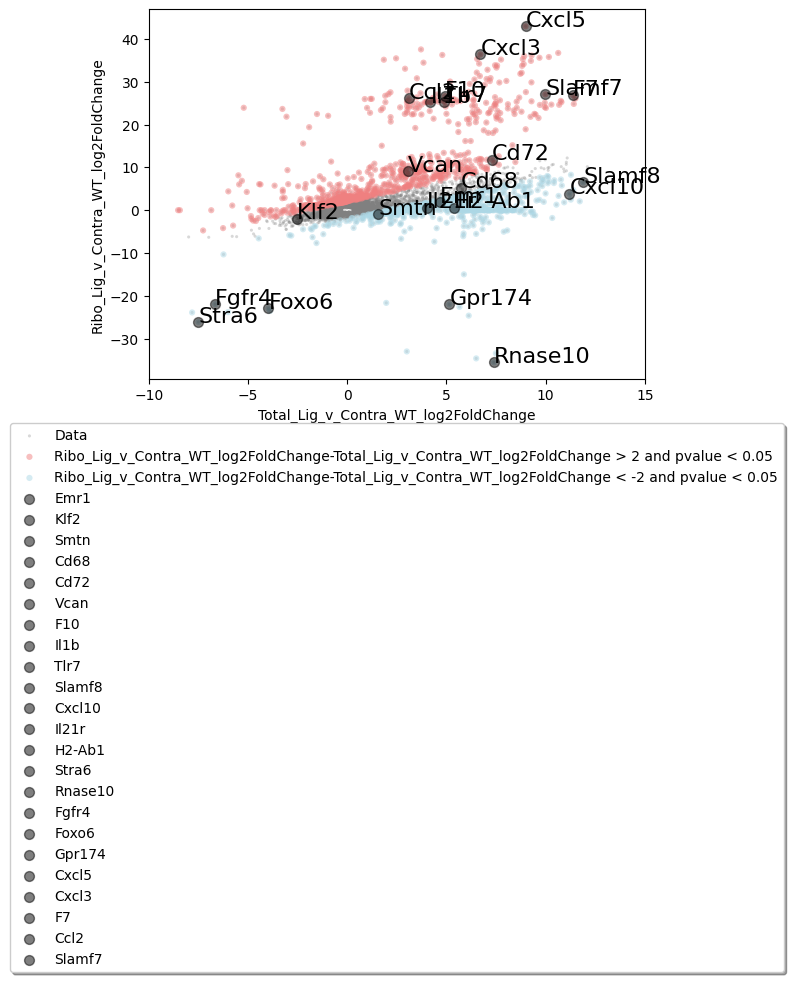

In [44]:
xaxis = 'Total_Lig_v_Contra_WT_log2FoldChange'
yaxis = 'Ribo_Lig_v_Contra_WT_log2FoldChange'
highlight_genes = ['Emr1', 'Klf2', 'Smtn', 'Cd68', 'Cd72', 'Vcan', 'F10', 'Il1b', 'Tlr7', 'Slamf8', 'Cxcl10', 'Il21r', 'H2-Ab1', 'Stra6', 'Rnase10', 'Fgfr4', 'Foxo6', 'Gpr174', 'Cxcl5', 'Cxcl3' ,'F7', 'Ccl2', 'Slamf7']
comp = 'Ribo_Lig_ECKO_v_WT'
filtergroup1 = 'Ribo_Lig_v_Contra_WT'
filtergroup2= 'Total_Lig_v_Contra_WT'

# Filter genes with base mean and pvalues
filtered_df = Lig_v_Contra_merged_results_RiboTotal[((Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_baseMean'] > 300) & 
                                                     (Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_pvalue'] < 0.05)) |
                                                    (Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup2}_pvalue'] < 0.05)]

# Filter genes with base mean > 200 in either set and Ribo_Lig_v_Contra_WT_pvalue < 0.05
# filtered_df = Lig_v_Contra_merged_results_RiboTotal[((Lig_v_Contra_merged_results_RiboTotal['Ribo_Lig_v_Contra_ECKO_baseMean'] > 50) | (Lig_v_Contra_merged_results_RiboTotal['Total_Lig_v_Contra_ECKO_baseMean'] > 50))] #& (Lig_v_Contra_merged_results_RiboTotal['Ribo_Lig_v_Contra_ECKO_pvalue'] < 0.5)]
#filtered_df = Lig_v_Contra_merged_results_RiboTotal[Lig_v_Contra_merged_results_RiboTotal['Ribo_vs_Unbound_log2FoldChange'] > 0]

# Plot the scatter plot with 50% transparency and smaller points with empty borders
plt.scatter(filtered_df[xaxis],
            filtered_df[yaxis],
            color='grey', alpha=0.3, s=5, edgecolor='none', label='Data')

# Mark points where Y-X > 2 and Ribo_Lig_v_Contra_WT_pvalue < 0.05 as red
red_df = filtered_df[filtered_df['Ribo_Lig_v_Contra_WT_log2FoldChange'] - filtered_df['Total_Lig_v_Contra_WT_log2FoldChange'] > 2]
plt.scatter(red_df[xaxis],
            red_df[yaxis],
            color='lightcoral', alpha=0.5, s=20, edgecolor='none', label=f'{yaxis}-{xaxis} > 2 and pvalue < 0.05')

# Mark points where Y-X < -2 and Ribo_Lig_v_Contra_WT_pvalue < 0.05 as blue
blue_df = filtered_df[filtered_df['Ribo_Lig_v_Contra_WT_log2FoldChange'] - filtered_df['Total_Lig_v_Contra_WT_log2FoldChange'] < -2]
plt.scatter(blue_df[xaxis],
            blue_df[yaxis],
            color='lightblue', alpha=0.5, s=20, edgecolor='none', label=f'{yaxis}-{xaxis} < -2 and pvalue < 0.05')

# Highlight and label specific genes
for gene in highlight_genes:
    if gene in filtered_df.index:
        plt.scatter(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], color='black', alpha=0.5, s=50, edgecolor='black', label=gene)
        plt.text(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], gene, fontsize=16, color='black')

# Add legend below the plot with stacked items
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

# Set x-axis limits
plt.xlim(-10, 15)  # Replace x_min and x_max with your desired minimum and maximum values

# Set y-axis limits
#plt.ylim(-10, 25)  # Replace y_min and y_max with your desired minimum and maximum values

# Add labels to the axes
plt.xlabel(xaxis)
plt.ylabel(yaxis)

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/scatter_TotalvRibo_WT.pdf')

# Show plot
plt.show()

In [45]:
from scipy.stats import pearsonr

filtered_df.dropna(subset=[xaxis, yaxis], inplace=True)

# Compute the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(filtered_df[xaxis], filtered_df[yaxis])

# Print the results
print(f'R-squared correlation coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

R-squared correlation coefficient: 0.5058165894624606
p-value: 0.0


/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_11853/645310675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=[xaxis, yaxis], inplace=True)


In [46]:
red_df.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/scatter_TotalvRibo_WT_red.csv', header=True, index=True)

In [47]:
blue_df.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/scatter_TotalvRibo_WT_blue.csv', header=True, index=True)

In [48]:
red_df

Ribo_Lig_v_Contra_WT_baseMean  \
0610040J01Rik                      26.344817   
1110021J02Rik                     754.647422   
1600021P15Rik                     188.577402   
1700020L24Rik                       8.435549   
1700025G04Rik                     374.559430   
...                                      ...   
Zfp653                            486.473225   
Zfp654                            614.445161   
Zfp772                            221.154067   
Znf512b                           796.186400   
Zwilch                             81.347231   

               Ribo_Lig_v_Contra_WT_log2FoldChange  \
0610040J01Rik                            21.540112   
1110021J02Rik                             1.842665   
1600021P15Rik                             3.916706   
1700020L24Rik                             0.537103   
1700025G04Rik                             3.139827   
...                                            ...   
Zfp653                                    2.889977   
Zfp654                                    3.897355   
Zfp772                                    4.094897   
Znf512b                                   2.627182   
Zwilch                                    5.316610   

               Ribo_Lig_v_Contra_WT_lfcSE  Ribo_Lig_v_Contra_WT_stat  \
0610040J01Rik                    3.333724                   6.461276   
1110021J02Rik                    0.459543                   4.009780   
1600021P15Rik                    1.974613                   1.983531   
1700020L24Rik                    3.785400                   0.141888   
1700025G04Rik                    1.486343                   2.112451   
...                                   ...                        ...   
Zfp653                           0.959981                   3.010452   
Zfp654                           0.958717                   4.065178   
Zfp772                           1.437840                   2.847952   
Znf512b                          0.697449                   3.766845   
Zwilch                           1.975215                   2.691661   

               Ribo_Lig_v_Contra_WT_pvalue  Ribo_Lig_v_Contra_WT_padj  \
0610040J01Rik                 1.038240e-10               3.815808e-09   
1110021J02Rik                 6.077544e-05               9.069717e-04   
1600021P15Rik                 4.730818e-02               1.939681e-01   
1700020L24Rik                 8.871684e-01               9.744678e-01   
1700025G04Rik                 3.464778e-02               1.576755e-01   
...                                    ...                        ...   
Zfp653                        2.608593e-03               2.258103e-02   
Zfp654                        4.799577e-05               7.336876e-04   
Zfp772                        4.400163e-03               3.399836e-02   
Znf512b                       1.653237e-04               2.235429e-03   
Zwilch                        7.109722e-03               4.910007e-02   

               Total_Lig_v_Contra_WT_baseMean  \
0610040J01Rik                      118.013979   
1110021J02Rik                      939.335897   
1600021P15Rik                      335.886498   
1700020L24Rik                      563.566982   
1700025G04Rik                      320.596881   
...                                       ...   
Zfp653                             420.162663   
Zfp654                             311.300398   
Zfp772                             316.442658   
Znf512b                           1366.474888   
Zwilch                             160.496580   

               Total_Lig_v_Contra_WT_log2FoldChange  \
0610040J01Rik                              9.640701   
1110021J02Rik                             -0.546422   
1600021P15Rik                              1.306140   
1700020L24Rik                             -1.513476   
1700025G04Rik                              0.986171   
...                                             ...   
Zfp653                                     0.443758   
Zfp654            

In [49]:
# Sort red_df by 'Ribo_v_Total_Diff' column in descending order
red_df_sorted = red_df.sort_values(by='Ribo_v_Total_Diff', ascending=False)

# Convert to human ID
red_df_sorted['Human_GeneID'] = red_df_sorted['GeneID'].map(m2h_dict)

# Filter by 'Base_Mean' > 300
red_df_filtered = red_df_sorted[red_df_sorted['Ribo_Lig_v_Contra_WT_baseMean'] > 100]

# Extract top 300 human gene IDs
top_300_genes_human = red_df_filtered.iloc[:300]['Human_GeneID']

# Remove NaN values from the list of human gene IDs and convert to strings
top_300_genes_human_str = top_300_genes_human.dropna().astype(str)

# Remove empty strings from the list of human gene IDs
gene_list_red_human = [gene_id for gene_id in top_300_genes_human_str if gene_id.strip()]

# Run Enrichr (GO, Kegg, Hallmark)
enr_red = gseapy.enrichr(gene_list=gene_list_red_human, # or "./tests/data/gene_list.txt",
                 gene_sets=['GO_Biological_Process_2023'], #'MSigDB_Hallmark_2020','KEGG_2021_Human', 
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [50]:
# Sort red_df by 'Ribo_v_Total_Diff' column in descending order
blue_df_sorted = blue_df.sort_values(by='Ribo_v_Total_Diff', ascending=False)

# Convert to human ID
blue_df_sorted['Human_GeneID'] = blue_df_sorted['GeneID'].map(m2h_dict)

# Filter by 'Base_Mean' > 300
blue_df_filtered = blue_df_sorted[blue_df_sorted['Ribo_Lig_v_Contra_WT_baseMean'] > 100]

# Extract top 300 human gene IDs
top_300_genes_human = blue_df_filtered.iloc[:300]['Human_GeneID']

# Remove NaN values from the list of human gene IDs and convert to strings
top_300_genes_human_str = top_300_genes_human.dropna().astype(str)

# Remove empty strings from the list of human gene IDs
gene_list_blue_human = [gene_id for gene_id in top_300_genes_human_str if gene_id.strip()]

# Run Enrichr (GO, Kegg, Hallmark)
enr_blue = gseapy.enrichr(gene_list=gene_list_blue_human, # or "./tests/data/gene_list.txt",
                 gene_sets=['GO_Biological_Process_2023'], #'MSigDB_Hallmark_2020','KEGG_2021_Human', 
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [51]:
enr_red.results.head(20)

Gene_set  \
0   GO_Biological_Process_2023   
1   GO_Biological_Process_2023   
2   GO_Biological_Process_2023   
3   GO_Biological_Process_2023   
4   GO_Biological_Process_2023   
5   GO_Biological_Process_2023   
6   GO_Biological_Process_2023   
7   GO_Biological_Process_2023   
8   GO_Biological_Process_2023   
9   GO_Biological_Process_2023   
10  GO_Biological_Process_2023   
11  GO_Biological_Process_2023   
12  GO_Biological_Process_2023   
13  GO_Biological_Process_2023   
14  GO_Biological_Process_2023   
15  GO_Biological_Process_2023   
16  GO_Biological_Process_2023   
17  GO_Biological_Process_2023   
18  GO_Biological_Process_2023   
19  GO_Biological_Process_2023   

                                                 Term Overlap   P-value  \
0        Regulation Of T Cell Activation (GO:0050863)    7/62  0.000010   
1   Regulation Of Insulin Receptor Signaling Pathw...    6/44  0.000015   
2   Positive Regulation Of MAP Kinase Activity (GO...    8/91  0.000015   
3      B Cell Receptor Signaling Pathway (GO:0050853)    6/46  0.000019   
4       Regulation Of Hydrolase Activity (GO:0051336)    7/71  0.000025   
5    Regulation Of Inflammatory Response (GO:0050727)  12/240  0.000040   
6               Dendritic Cell Migration (GO:0036336)    4/18  0.000057   
7   Positive Regulation Of Apoptotic Cell Clearanc...     3/7  0.000060   
8   Cellular Response To Organic Substance (GO:007...    7/82  0.000063   
9          Regulation Of GTPase Activity (GO:0043087)  11/214  0.000065   
10            Regulation Of Phagocytosis (GO:0050764)    6/58  0.000072   
11   Cytokine-Mediated Signaling Pathway (GO:0019221)  12/257  0.000077   
12     Regulation Of MAP Kinase Activity (GO:0043405)   8/114  0.000077   
13  Fc-gamma Receptor Signaling Pathway Involved I...    4/20  0.000088   
14  Negative Regulation Of Protein Phosphorylation...   9/149  0.000089   
15  Positive Regulation Of Protein Serine/Threonin...   8/117  0.000092   
16  Regulation Of Phosphatidylinositol 3-Kinase Si...    7/90  0.000114   
17  Fc Receptor Mediated Stimulatory Signaling Pat...    4/22  0.000131   
18    Regulation Of Mast Cell Activation (GO:0033003)     3/9  0.000141   
19                 Inflammatory Response (GO:0006954)  11/236  0.000155   

    Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0           0.008393            0                     0   10.625116   
1           0.008393            0                     0   13.137242   
2           0.008393            0                     0    8.069316   
3           0.008393            0                     0   12.479114   
4           0.008759            0                     0    9.126788   
5           0.010281            0                     0    4.449533   
6           0.010281            0                     0   23.601913   
7           0.010281            0                     0   61.728125   
8           0.010281            0                     0    7.783842   
9           0.010281            0                     0    4.567139   
10          0.010281            0                     0    9.593476   
11          0.010281            0                     0    4.137185   
12          0.010281            0                     0    6.311040   
13          0.010281            0                     0   20.649582   
14          0.010281            0                     0    5.389286   
15          0.010281            0                     0    6.136404   
16          0.011905            0                     0    7.030733   
17          0.012946            0                     0   18.353324   
18          0.013207            0                     0   41.147917   
19          0.013762            0                     0    4.115939   

    Combined Score                                              Genes  
0       122.344812          SIT1;CD209;CCL2;PRKCQ;TNFAIP8L2;PAG1;CCR2  
1       146.362553                    PID1;IL1B;ENPP1;PRKCQ;SORL1;OGT  
2        89.578745     

In [52]:
enr_blue.results.head(20)

Gene_set  \
0   GO_Biological_Process_2023   
1   GO_Biological_Process_2023   
2   GO_Biological_Process_2023   
3   GO_Biological_Process_2023   
4   GO_Biological_Process_2023   
5   GO_Biological_Process_2023   
6   GO_Biological_Process_2023   
7   GO_Biological_Process_2023   
8   GO_Biological_Process_2023   
9   GO_Biological_Process_2023   
10  GO_Biological_Process_2023   
11  GO_Biological_Process_2023   
12  GO_Biological_Process_2023   
13  GO_Biological_Process_2023   
14  GO_Biological_Process_2023   
15  GO_Biological_Process_2023   
16  GO_Biological_Process_2023   
17  GO_Biological_Process_2023   
18  GO_Biological_Process_2023   
19  GO_Biological_Process_2023   

                                                 Term Overlap   P-value  \
0   Positive Regulation Of Lymphocyte Proliferatio...    7/74  0.000015   
1   Immunoglobulin Mediated Immune Response (GO:00...    5/30  0.000016   
2            Sulfur Amino Acid Transport (GO:0000101)     3/7  0.000042   
3           Cell Projection Organization (GO:0030030)    4/20  0.000056   
4     Regulation Of B Cell Proliferation (GO:0030888)    5/44  0.000108   
5      Regulation Of Monocyte Chemotaxis (GO:0090025)    4/25  0.000140   
6                      T Cell Chemotaxis (GO:0010818)    3/10  0.000141   
7   Positive Regulation Of Lymphocyte Activation (...    5/47  0.000149   
8   Antigen Processing And Presentation Of Exogeno...    4/26  0.000164   
9   Spindle Assembly Checkpoint Signaling (GO:0071...    4/26  0.000164   
10  Mitotic Spindle Assembly Checkpoint Signaling ...    4/26  0.000164   
11  Mitotic Spindle Checkpoint Signaling (GO:0071174)    4/26  0.000164   
12  Negative Regulation Of Leukocyte Chemotaxis (G...    3/11  0.000192   
13                     T Cell Activation (GO:0042110)   7/111  0.000204   
14  Mitotic Sister Chromatid Segregation (GO:0000070)   7/111  0.000204   
15           Metaphase Plate Congression (GO:0051310)    5/51  0.000220   
16  Negative Regulation Of Mitotic Metaphase/Anaph...    4/28  0.000221   
17  Antigen Processing And Presentation Of Peptide...    4/28  0.000221   
18  Positive Regulation Of B Cell Proliferation (G...    4/29  0.000254   
19              Cell Projection Assembly (GO:0030031)    3/12  0.000254   

    Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0           0.012183            0                     0    9.856388   
1           0.012183            0                     0   18.728910   
2           0.018652            0                     0   69.647887   
3           0.018652            0                     0   23.311321   
4           0.018652            0                     0   11.997205   
5           0.018652            0                     0   17.756514   
6           0.018652            0                     0   39.792757   
7           0.018652            0                     0   11.138569   
8           0.018652            0                     0   16.948542   
9           0.018652            0                     0   16.948542   
10          0.018652            0                     0   16.948542   
11          0.018652            0                     0   16.948542   
12          0.018652            0                     0   34.816901   
13          0.018652            0                     0    6.337873   
14          0.018652            0                     0    6.337873   
15          0.018652            0                     0   10.167937   
16          0.018652            0                     0   15.534591   
17          0.018652            0                     0   15.534591   
18          0.019317            0                     0   14.912453   
19          0.019317            0                     0   30.946792   

    Combined Score                                       Genes  
0       109.379605  SASH3;CD74;HLA-DMB;CD6;GPR183;NCKAP1L;CD3E  
1       206.773453         CD74;HLA-DMA;HLA-DMB;IL21R;HLA-DQB2  
2       701.715022                      SLC7

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


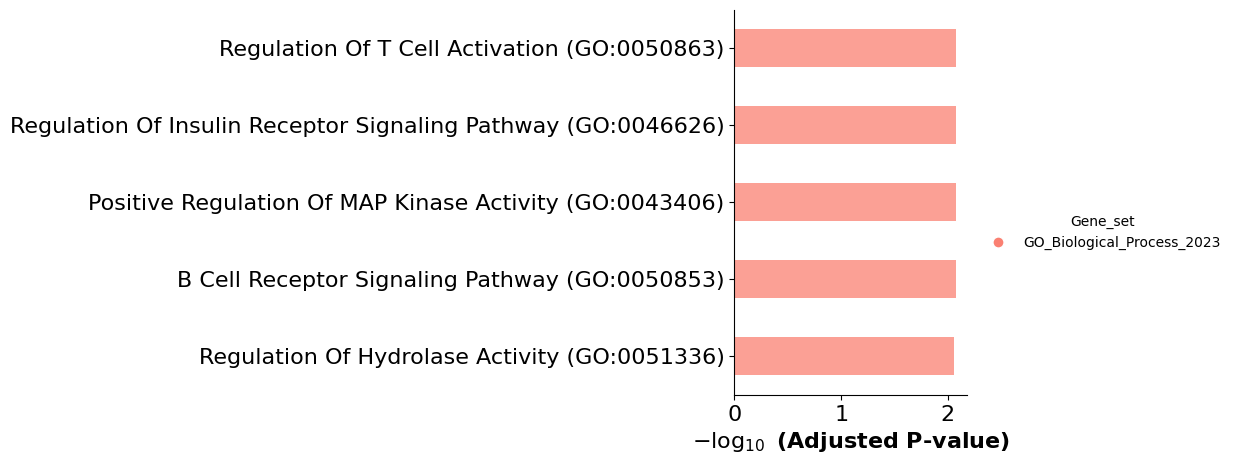

In [53]:
# categorical scatterplot
ax = gseapy.barplot(enr_red.results,
              column="Adjusted P-value",
              group='Gene_set',
              size=10,
              top_term=5,
              figsize=(3,5),
             )

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


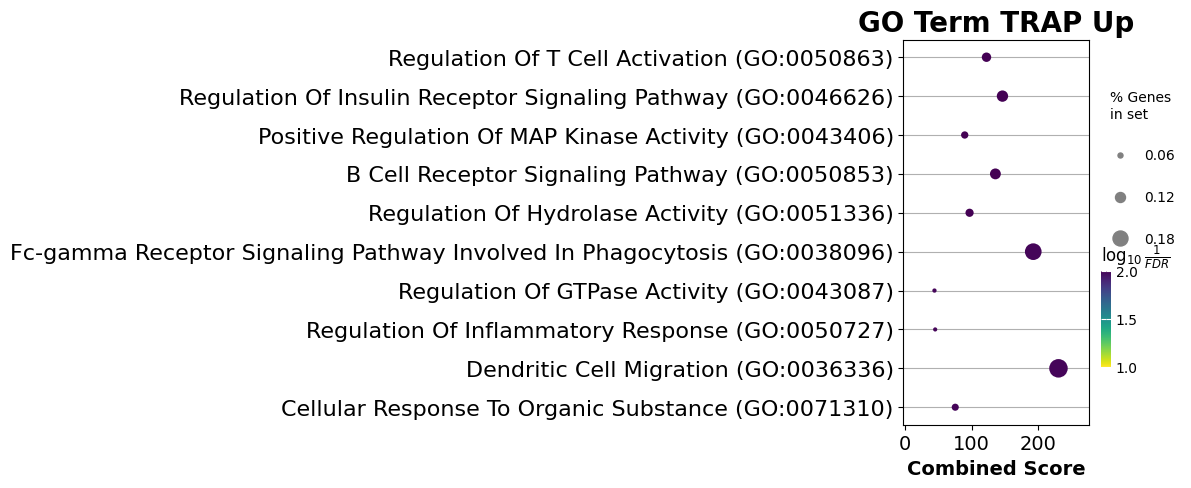

In [54]:
ax = gseapy.dotplot(enr_red.res2d, title='GO Term TRAP Up',cmap='viridis_r', size=10, figsize=(3,5))

# Save the plot as a PDF
ax.figure.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/scatter_TotalvRibo_WT_red_dotplot.pdf', format='pdf')

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


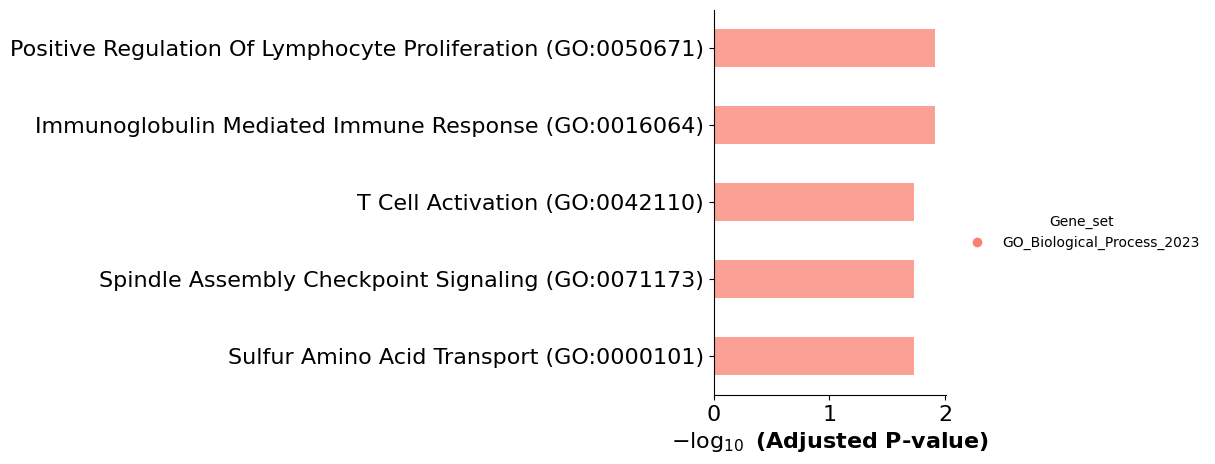

In [55]:
# categorical scatterplot
ax = gseapy.barplot(enr_blue.results,
              column="Adjusted P-value",
              group='Gene_set',
              size=10,
              top_term=5,
              figsize=(3,5),
             )

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


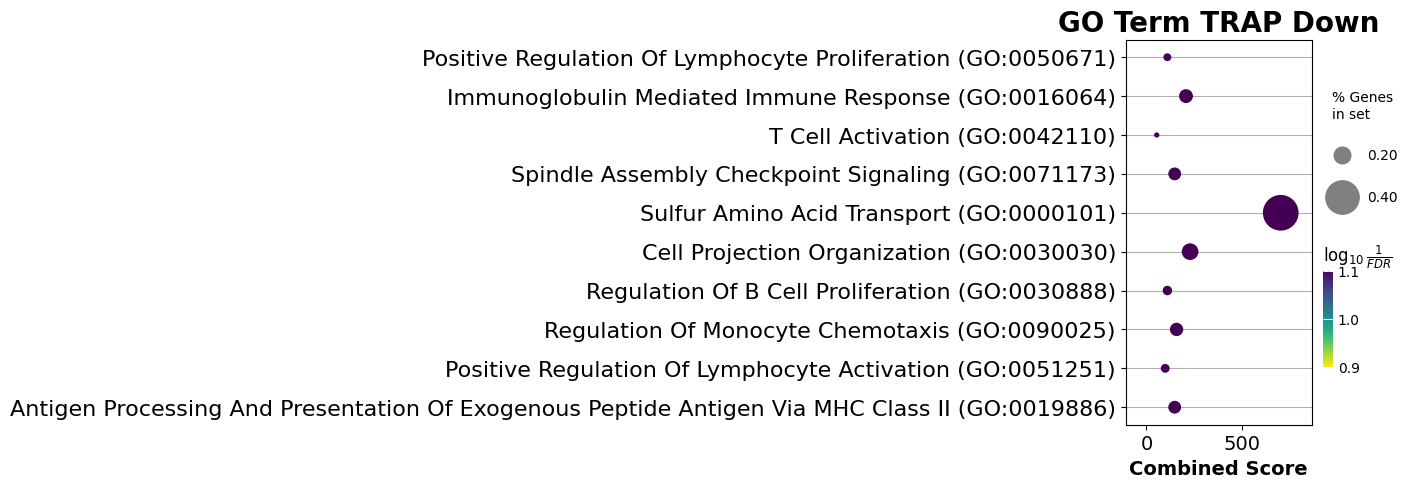

In [56]:
ax = gseapy.dotplot(enr_blue.res2d, title='GO Term TRAP Down',cmap='viridis_r', size=10, figsize=(3,5))

# Save the plot as a PDF
ax.figure.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/scatter_TotalvRibo_WT_blue_dotplot.pdf', format='pdf')

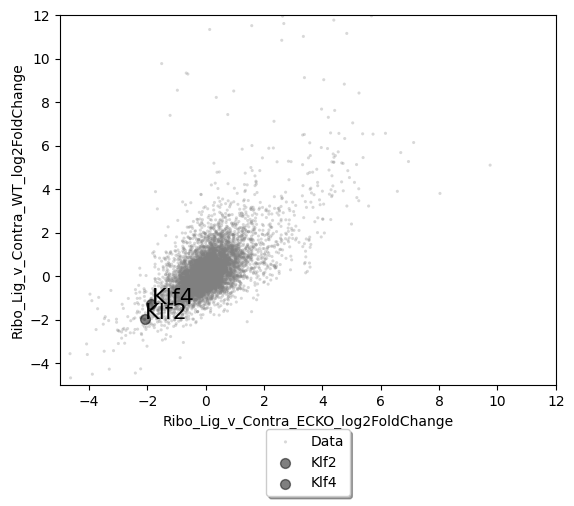

In [57]:
xaxis = 'Ribo_Lig_v_Contra_ECKO_log2FoldChange'
yaxis = 'Ribo_Lig_v_Contra_WT_log2FoldChange'
highlight_genes = ['Klf2', 'Klf4']
comp = 'Ribo_Lig_ECKO_v_WT'
filtergroup1 = 'Ribo_Lig_v_Contra_ECKO'
filtergroup2= 'Ribo_Lig_v_Contra_WT'

# Filter genes by base mean > 200
filtered_df = Lig_v_Contra_merged_results_RiboTotal[((Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_baseMean'] > 500))]

# Plot the scatter plot with 50% transparency and smaller points with empty borders
plt.scatter(filtered_df[xaxis],
            filtered_df[yaxis],
            color='grey', alpha=0.3, s=5, edgecolor='none', label='Data')

# Highlight and label specific genes
for gene in highlight_genes:
    if gene in filtered_df.index:
        plt.scatter(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], color='black', alpha=0.5, s=50, edgecolor='black', label=gene)
        plt.text(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], gene, fontsize=16, color='black')

# Add legend below the plot with stacked items
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

# Set x-axis limits
plt.xlim(-5, 12)  # Replace x_min and x_max with your desired minimum and maximum values

# Set y-axis limits
plt.ylim(-5, 12)  # Replace y_min and y_max with your desired minimum and maximum values


# Add labels to the axes
plt.xlabel(xaxis)
plt.ylabel(yaxis)

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/scatter_Ribo_WTvKO_FlowResponse.pdf')

# Show plot
plt.show()

In [58]:
filtered_df.dropna(subset=[xaxis, yaxis], inplace=True)

# Compute the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(filtered_df[xaxis], filtered_df[yaxis])

# Print the results
print(f'R-squared correlation coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

R-squared correlation coefficient: 0.6036594695544067
p-value: 0.0


/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_11853/914373778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=[xaxis, yaxis], inplace=True)


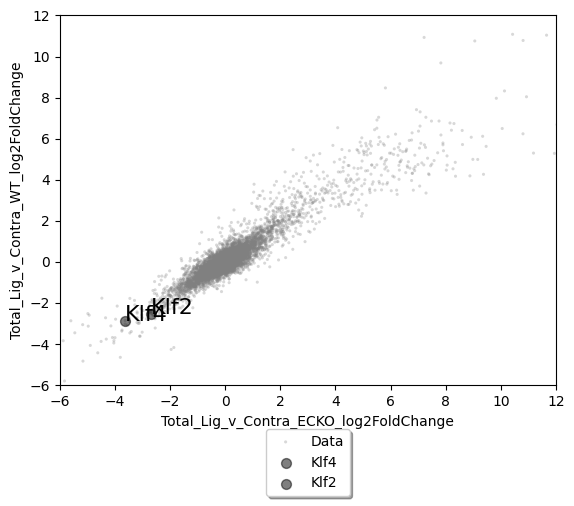

In [59]:
xaxis = 'Total_Lig_v_Contra_ECKO_log2FoldChange'
yaxis = 'Total_Lig_v_Contra_WT_log2FoldChange'
highlight_genes = ['Klf4', 'Klf2']
comp = 'Total_Lig_ECKO_v_WT'
filtergroup1 = 'Total_Lig_v_Contra_ECKO'
filtergroup2= 'Total_Lig_v_Contra_WT'

# Filter genes by base mean > 200
filtered_df = Lig_v_Contra_merged_results_RiboTotal[((Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_baseMean'] > 500))] 

# Plot the scatter plot with 50% transparency and smaller points with empty borders
plt.scatter(filtered_df[xaxis],
            filtered_df[yaxis],
            color='grey', alpha=0.3, s=5, edgecolor='none', label='Data')

# Highlight and label specific genes
for gene in highlight_genes:
    if gene in filtered_df.index:
        plt.scatter(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], color='black', alpha=0.5, s=50, edgecolor='black', label=gene)
        plt.text(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], gene, fontsize=16, color='black')

# Add legend below the plot with stacked items
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

# Set x-axis limits
plt.xlim(-6, 12)  # Replace x_min and x_max with your desired minimum and maximum values

# Set y-axis limits
plt.ylim(-6, 12)  # Replace y_min and y_max with your desired minimum and maximum values

# Add labels to the axes
plt.xlabel(xaxis)
plt.ylabel(yaxis)

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/scatter_Total_WTvKO_FlowResponse.pdf')

# Show plot
plt.show()

In [60]:
filtered_df.dropna(subset=[xaxis, yaxis], inplace=True)

# Compute the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(filtered_df[xaxis], filtered_df[yaxis])

# Print the results
print(f'R-squared correlation coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

R-squared correlation coefficient: 0.9099208016230325
p-value: 0.0


/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_11853/914373778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=[xaxis, yaxis], inplace=True)


In [61]:
Lig_v_Contra_merged_results_RiboTotal

Ribo_Lig_v_Contra_WT_baseMean  \
0610007C21Rik                    4639.773246   
0610007L01Rik                    2666.645421   
0610007P08Rik                     546.590688   
0610007P14Rik                    1142.728931   
0610007P22Rik                     845.379926   
...                                      ...   
Zyx                             17999.501227   
Zzef1                            1521.611904   
Zzz3                             1409.880349   
a                                   9.894173   
l7Rn6                            1393.297834   

               Ribo_Lig_v_Contra_WT_log2FoldChange  \
0610007C21Rik                            -0.447447   
0610007L01Rik                             0.222973   
0610007P08Rik                            -0.197553   
0610007P14Rik                             0.200000   
0610007P22Rik                            -0.140574   
...                                            ...   
Zyx                                      -1.908390   
Zzef1                                     1.669988   
Zzz3                                      1.106667   
a                                         0.000000   
l7Rn6                                    -0.976801   

               Ribo_Lig_v_Contra_WT_lfcSE  Ribo_Lig_v_Contra_WT_stat  \
0610007C21Rik                    0.272606                  -1.641367   
0610007L01Rik                    0.297312                   0.749965   
0610007P08Rik                    0.987505                  -0.200053   
0610007P14Rik                    0.356063                   0.561698   
0610007P22Rik                    0.509941                  -0.275668   
...                                   ...                        ...   
Zyx                              0.348043                  -5.483203   
Zzef1                            0.488118                   3.421278   
Zzz3                             0.511789                   2.162350   
a                                2.855315                   0.000000   
l7Rn6                            0.645470                  -1.513318   

               Ribo_Lig_v_Contra_WT_pvalue  Ribo_Lig_v_Contra_WT_padj  \
0610007C21Rik                 1.007213e-01                   0.314689   
0610007L01Rik                 4.532758e-01                   0.725169   
0610007P08Rik                 8.414393e-01                   0.954245   
0610007P14Rik                 5.743220e-01                   0.814340   
0610007P22Rik                 7.828033e-01                   0.928068   
...                                    ...                        ...   
Zyx                           4.176933e-08                   0.000001   
Zzef1                         6.232765e-04                   0.006952   
Zzz3                          3.059122e-02                   0.144390   
a                             1.000000e+00                   1.000000   
l7Rn6                         1.301990e-01                   0.368844   

               Total_Lig_v_Contra_WT_baseMean  \
0610007C21Rik                     2314.201000   
0610007L01Rik                     2310.898304   
0610007P08Rik                      531.516672   
0610007P14Rik                      646.090899   
0610007P22Rik                      438.313429   
...                                       ...   
Zyx                              31296.157056   
Zzef1                             2269.071483   
Zzz3                              2077.027022   
a                                    0.079752   
l7Rn6                              583.678144   

               Total_Lig_v_Contra_WT_log2FoldChange  \
0610007C21Rik                             -0.324114   
0610007L01Rik                             -0.140444   
0610007P08Rik                             -0.157672   
0610007P14Rik                              0.476810   
0610007P22Rik                             -0.132796   
...                                             ...   
Zyx                                       -0.541703   
Zzef1             

In [62]:
# Filter columns ending with "log2Foldchange"
filtered_columns = Lig_v_Contra_merged_results_RiboTotal.filter(regex='log2FoldChange$', axis=1)

# Print the filtered column names
print("Column names ending with 'log2Foldchange':")
print(filtered_columns.columns)

Column names ending with 'log2Foldchange':
Index(['Ribo_Lig_v_Contra_WT_log2FoldChange',
       'Total_Lig_v_Contra_WT_log2FoldChange',
       'Ribo_Lig_v_Contra_ECKO_log2FoldChange',
       'Total_Lig_v_Contra_ECKO_log2FoldChange',
       'Ribo_Lig_ECKO_v_WT_log2FoldChange',
       'Total_Lig_ECKO_v_WT_log2FoldChange', 'Ribo_vs_Unbound_log2FoldChange',
       'Ribo_Contra_ECKO_v_WT_log2FoldChange',
       'Total_Contra_ECKO_v_WT_log2FoldChange'],
      dtype='object')


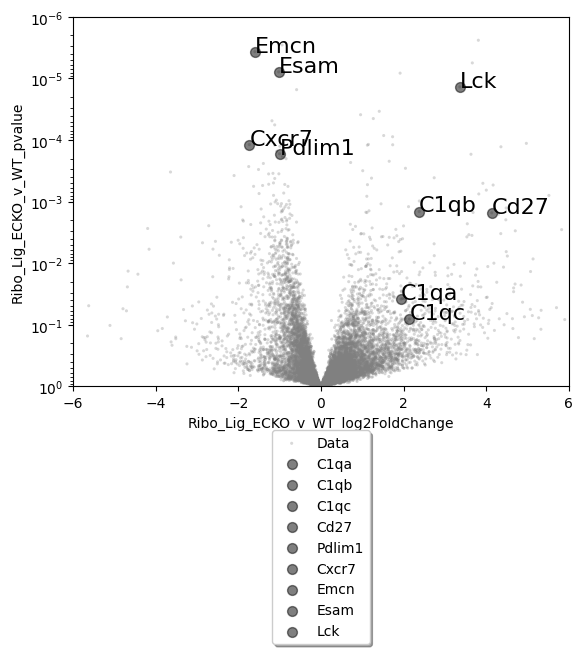

In [63]:
xaxis = 'Ribo_Lig_ECKO_v_WT_log2FoldChange'
yaxis = 'Ribo_Lig_ECKO_v_WT_pvalue'
highlight_genes = ['C1qa', 'C1qb', 'C1qc', 'Cd27', 'Pdlim1', 'Cxcr7' ,'Emcn', 'Esam', 'Lck']
comp = 'Ribo_Lig_ECKO_v_WT'
filtergroup1 = 'Ribo_Lig_ECKO_v_WT'

# Filter genes by base mean > 200
filtered_df = Lig_v_Contra_merged_results_RiboTotal[((Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_baseMean'] > 50))] 

# Plot the scatter plot with 50% transparency and smaller points with empty borders
plt.scatter(filtered_df[xaxis],
            filtered_df[yaxis],
            color='grey', alpha=0.3, s=5, edgecolor='none', label='Data')

# Highlight and label specific genes
for gene in highlight_genes:
    if gene in filtered_df.index:
        plt.scatter(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], color='black', alpha=0.5, s=50, edgecolor='black', label=gene)
        plt.text(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], gene, fontsize=16, color='black')

# Add legend below the plot with stacked items
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

# Set x-axis limits
plt.xlim(-6, 6)  # Replace x_min and x_max with your desired minimum and maximum values

# Set y-axis limits
plt.ylim(0.000001, 1)  # Replace y_min and y_max with your desired minimum and maximum values

# Invert the Y-axis scale
plt.gca().invert_yaxis()

# Set y-axis to log scale
plt.yscale('log')

# Add labels to the axes
plt.xlabel(xaxis)
plt.ylabel(yaxis)

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/Volcano_ECKO_v_WT_Lig.pdf')

# Show plot
plt.show()

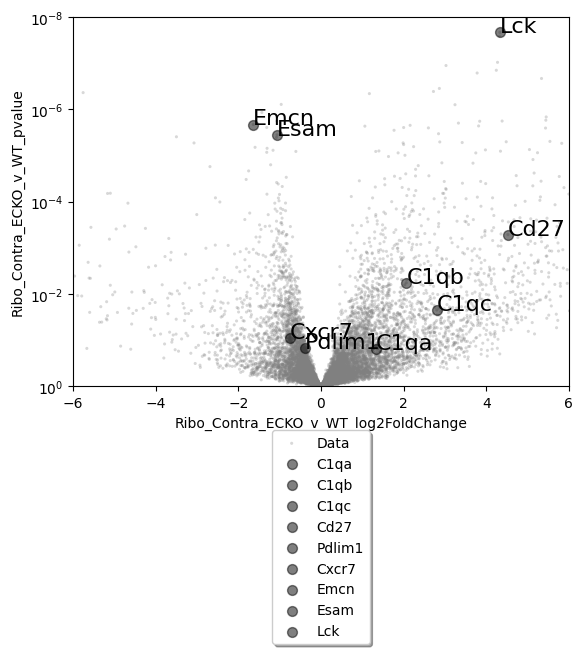

In [64]:
xaxis = 'Ribo_Contra_ECKO_v_WT_log2FoldChange'
yaxis = 'Ribo_Contra_ECKO_v_WT_pvalue'
highlight_genes = ['C1qa', 'C1qb', 'C1qc', 'Cd27', 'Pdlim1', 'Cxcr7' ,'Emcn', 'Esam', 'Lck']
comp = 'Ribo_Contra_ECKO_v_WT'
filtergroup1 = 'Ribo_Contra_ECKO_v_WT'

# Filter genes by base mean > 200
filtered_df = Lig_v_Contra_merged_results_RiboTotal[((Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_baseMean'] > 50))] 

# Plot the scatter plot with 50% transparency and smaller points with empty borders
plt.scatter(filtered_df[xaxis],
            filtered_df[yaxis],
            color='grey', alpha=0.3, s=5, edgecolor='none', label='Data')

# Highlight and label specific genes
for gene in highlight_genes:
    if gene in filtered_df.index:
        plt.scatter(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], color='black', alpha=0.5, s=50, edgecolor='black', label=gene)
        plt.text(filtered_df.loc[gene, xaxis], filtered_df.loc[gene, yaxis], gene, fontsize=16, color='black')

# Add legend below the plot with stacked items
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

# Set x-axis limits
plt.xlim(-6, 6)  # Replace x_min and x_max with your desired minimum and maximum values

# Set y-axis limits
plt.ylim(0.00000001, 1)  # Replace y_min and y_max with your desired minimum and maximum values

# Invert the Y-axis scale
plt.gca().invert_yaxis()

# Set y-axis to log scale
plt.yscale('log')

# Add labels to the axes
plt.xlabel(xaxis)
plt.ylabel(yaxis)

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/Volcano_ECKO_v_WT_Contra.pdf')

# Show plot
plt.show()

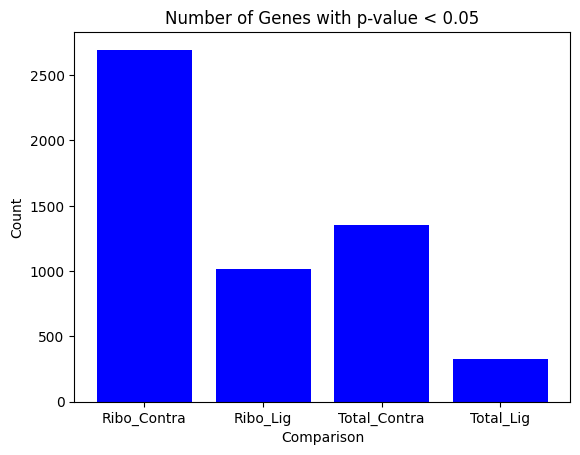

In [65]:
# Define the counts for each category
counts = [
    Lig_v_Contra_merged_results_RiboTotal['Ribo_Contra_ECKO_v_WT_pvalue'].lt(0.05).sum(),
    Lig_v_Contra_merged_results_RiboTotal['Ribo_Lig_ECKO_v_WT_pvalue'].lt(0.05).sum(),
    Lig_v_Contra_merged_results_RiboTotal['Total_Contra_ECKO_v_WT_pvalue'].lt(0.05).sum(),
    Lig_v_Contra_merged_results_RiboTotal['Total_Lig_ECKO_v_WT_pvalue'].lt(0.05).sum()
]

# Define the labels for the bars
labels = [
    'Ribo_Contra',
    'Ribo_Lig',
    'Total_Contra',
    'Total_Lig'
]

# Create the bar plot
plt.bar(labels, counts, color='blue')

# Add labels and title
plt.xlabel('Comparison')
plt.ylabel('Count')
plt.title('Number of Genes with p-value < 0.05')

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/barplot_signif_DEseq2.pdf')

# Show plot
plt.show()

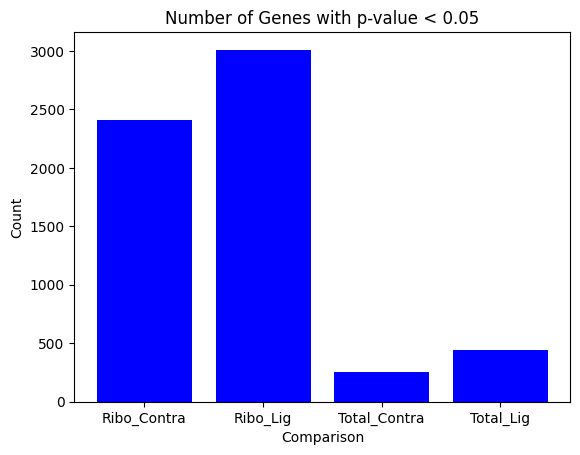

In [66]:
# Define the counts for each category
counts = [
    Splice_Lig_v_Contra_merged_results_RiboTotal['Splice_Ribo_Contra_ECKO_v_WT_p'].lt(0.05).sum(),
    Splice_Lig_v_Contra_merged_results_RiboTotal['Splice_Ribo_Lig_ECKO_v_WT_p'].lt(0.05).sum(),
    Splice_Lig_v_Contra_merged_results_RiboTotal['Splice_Total_Contra_ECKO_v_WT_p'].lt(0.05).sum(),
    Splice_Lig_v_Contra_merged_results_RiboTotal['Splice_Total_Lig_ECKO_v_WT_p'].lt(0.05).sum()
]

# Define the labels for the bars
labels = [
    'Ribo_Contra',
    'Ribo_Lig',
    'Total_Contra',
    'Total_Lig'
]

# Create the bar plot
plt.bar(labels, counts, color='blue')

# Add labels and title
plt.xlabel('Comparison')
plt.ylabel('Count')
plt.title('Number of Genes with p-value < 0.05')

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/barplot_signif_Leafcutter.pdf')

# Show plot
plt.show()

In [67]:
Splice_Lig_v_Contra_merged_results_RiboTotal

Splice_Ribo_Lig_v_Contra_WT_status  \
chr1:clu_1_+      <2 introns used in >=min_samples_per_intron sa...   
chr1:clu_10_+                            <=1 sample with coverage>0   
chr1:clu_100_+                <=1 sample with coverage>min_coverage   
chr1:clu_1000_+   <2 introns used in >=min_samples_per_intron sa...   
chr1:clu_1001_+               <=1 sample with coverage>min_coverage   
...                                                             ...   
chrY:clu_63383_-  <2 introns used in >=min_samples_per_intron sa...   
chrY:clu_63384_-  <2 introns used in >=min_samples_per_intron sa...   
chrY:clu_63385_-                           Not enough valid samples   
chrY:clu_63386_-                           Not enough valid samples   
chrY:clu_63387_-  <2 introns used in >=min_samples_per_intron sa...   

                  Splice_Ribo_Lig_v_Contra_WT_loglr  \
chr1:clu_1_+                                    NaN   
chr1:clu_10_+                                   NaN   
chr1:clu_100_+                                  NaN   
chr1:clu_1000_+                                 NaN   
chr1:clu_1001_+                                 NaN   
...                                             ...   
chrY:clu_63383_-                                NaN   
chrY:clu_63384_-                                NaN   
chrY:clu_63385_-                                NaN   
chrY:clu_63386_-                                NaN   
chrY:clu_63387_-                                NaN   

                  Splice_Ribo_Lig_v_Contra_WT_df  \
chr1:clu_1_+                                 NaN   
chr1:clu_10_+                                NaN   
chr1:clu_100_+                               NaN   
chr1:clu_1000_+                              NaN   
chr1:clu_1001_+                              NaN   
...                                          ...   
chrY:clu_63383_-                             NaN   
chrY:clu_63384_-                             NaN   
chrY:clu_63385_-                             NaN   
chrY:clu_63386_-                             NaN   
chrY:clu_63387_-                             NaN   

                  Splice_Ribo_Lig_v_Contra_WT_p  \
chr1:clu_1_+                                NaN   
chr1:clu_10_+                               NaN   
chr1:clu_100_+                              NaN   
chr1:clu_1000_+                             NaN   
chr1:clu_1001_+                             NaN   
...                                         ...   
chrY:clu_63383_-                            NaN   
chrY:clu_63384_-                            NaN   
chrY:clu_63385_-                            NaN   
chrY:clu_63386_-                            NaN   
chrY:clu_63387_-                            NaN   

                  Splice_Ribo_Lig_v_Contra_WT_p.adjust  \
chr1:clu_1_+                                       NaN   
chr1:clu_10_+                                      NaN   
chr1:clu_100_+                                     NaN   
chr1:clu_1000_+                                    NaN   
chr1:clu_1001_+                                    NaN   
...                                                ...   
chrY:clu_63383_-                                   NaN   
chrY:clu_63384_-                                   NaN   
chrY:clu_63385_-                                   NaN   
chrY:clu_63386_-                                   NaN   
chrY:clu_63387_-                                   NaN   

                 Splice_Ribo_Lig_v_Contra_WT_genes  \
chr1:clu_1_+                               Gm37323   
chr1:clu_10_+                                  NaN   
chr1:clu_100_+                               Tram2   
chr1:clu_1000_+                             R3hdm1   
chr1:clu_1001_+                             R3hdm1   
...                                            ...   
chrY:clu_63383_-                               NaN   
chrY:clu_63384_-                               NaN   
chrY:clu_63385_-                               NaN   
chrY:clu_63386_-                            

In [68]:
# Dictionary to store gene names for each term
DESeq2_gene_names_dict = {}

# Iterate over each column of the DESeq2 DataFrame
for term in Lig_v_Contra_merged_results_RiboTotal.columns:
    # Check if the column represents a p-value (assuming it ends with '_pvalue')
    if term.endswith('_pvalue'):
        # Convert the column to numeric
        Lig_v_Contra_merged_results_RiboTotal[term] = pd.to_numeric(Lig_v_Contra_merged_results_RiboTotal[term], errors='coerce')
        # Filter the DataFrame to select rows where the p-value < 0.05
        filtered_df = Lig_v_Contra_merged_results_RiboTotal[Lig_v_Contra_merged_results_RiboTotal[term] < 0.05]
        
        # Extract the GeneID column
        gene_names = filtered_df['GeneID']
        
        # Store gene names in the dictionary
        DESeq2_gene_names_dict[term + '_siggenes'] = gene_names.tolist()

In [69]:
# Dictionary to store gene counts for each term
Leafcutter_gene_names_dict = {}

# Iterate over each column of the DESeq2 DataFrame
for term in Splice_Lig_v_Contra_merged_results_RiboTotal.columns:
    # Check if the column represents a p-value (assuming it ends with '_pvalue')
    if term.endswith('_p'):
        # Convert the column to numeric
        Splice_Lig_v_Contra_merged_results_RiboTotal[term] = pd.to_numeric(Splice_Lig_v_Contra_merged_results_RiboTotal[term], errors='coerce')
        # Filter the DataFrame to select rows where the p-value < 0.05
        filtered_df = Splice_Lig_v_Contra_merged_results_RiboTotal[Splice_Lig_v_Contra_merged_results_RiboTotal[term] < 0.05]
        
        # Extract the GeneID column
        gene_names = filtered_df['GeneID']
        
        # Store gene names in the dictionary
        Leafcutter_gene_names_dict[term + '_siggenes'] = gene_names.tolist()

In [70]:
from upsetplot import from_contents

# Combine the gene sets from Leafcutter and DESeq2 dictionaries
LeafcutterDESeq2_gene_names_dict = {**Leafcutter_gene_names_dict, **DESeq2_gene_names_dict}


In [71]:
# List keys in the combined dictionary
keys_list = list(LeafcutterDESeq2_gene_names_dict.keys())

# Print the list of keys
print(keys_list)

['Splice_Ribo_Lig_v_Contra_WT_p_siggenes', 'Splice_Total_Lig_ECKO_v_WT_p_siggenes', 'Splice_Total_Lig_v_Contra_WT_p_siggenes', 'Splice_Ribo_Contra_ECKO_v_WT_p_siggenes', 'Splice_Total_Contra_ECKO_v_WT_p_siggenes', 'Splice_Ribo_Lig_ECKO_v_WT_p_siggenes', 'Ribo_Lig_v_Contra_WT_pvalue_siggenes', 'Total_Lig_v_Contra_WT_pvalue_siggenes', 'Ribo_Lig_v_Contra_ECKO_pvalue_siggenes', 'Total_Lig_v_Contra_ECKO_pvalue_siggenes', 'Ribo_Lig_ECKO_v_WT_pvalue_siggenes', 'Total_Lig_ECKO_v_WT_pvalue_siggenes', 'Ribo_vs_Unbound_pvalue_siggenes', 'Ribo_Contra_ECKO_v_WT_pvalue_siggenes', 'Total_Contra_ECKO_v_WT_pvalue_siggenes']


In [72]:
# Select specific keys from the combined dictionary
#selected_keys = ['Splice_Total_Contra_ECKO_v_WT_p_siggenes', 'Splice_Total_Lig_ECKO_v_WT_p_siggenes', 'Splice_Ribo_Contra_ECKO_v_WT_p_siggenes', 'Splice_Ribo_Lig_ECKO_v_WT_p_siggenes', 'Total_Contra_ECKO_v_WT_pvalue_siggenes', 'Total_Lig_ECKO_v_WT_pvalue_siggenes', 'Ribo_Contra_ECKO_v_WT_pvalue_siggenes', 'Ribo_Lig_ECKO_v_WT_pvalue_siggenes']  # Add the keys you want to visualize
selected_keys = ['Total_Contra_ECKO_v_WT_pvalue_siggenes', 'Total_Lig_ECKO_v_WT_pvalue_siggenes', 'Ribo_Contra_ECKO_v_WT_pvalue_siggenes', 'Ribo_Lig_ECKO_v_WT_pvalue_siggenes']  # Add the keys you want to visualize

# Filter the dictionary for selected keys
selected_dict = {key: LeafcutterDESeq2_gene_names_dict[key] for key in selected_keys}

# Remove duplicates from each category
selected_dict_no_duplicates = {key: list(set(genes)) for key, genes in selected_dict.items()}

In [73]:
# Create UpSet-compatible data for the selected keys
selected_data = from_contents(selected_dict_no_duplicates)

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


In [74]:
selected_data

id
Total_Contra_ECKO_v_WT_pvalue_siggenes Total_Lig_ECKO_v_WT_pvalue_siggenes Ribo_Contra_ECKO_v_WT_pvalue_siggenes Ribo_Lig_ECKO_v_WT_pvalue_siggenes          
True                                   False                               False                                 False                                  Kif2c
                                                                                                                 False                                   Mcm2
                                                                                                                 False                                   Maff
                                                                                                                 False                                 Lrrc8b
                                                                                                                 False                                Gm16039
...                                                                                                                                                       ...
False                                  False                               False                                 True                                   Tmcc3
                                                                                                                 True                                  Alkbh8
                                                                                                                 True                                BC020535
                                                                                                                 True                                    Per3
                                                                                                                 True                                   Wdr89

[4531 rows x 1 columns]

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

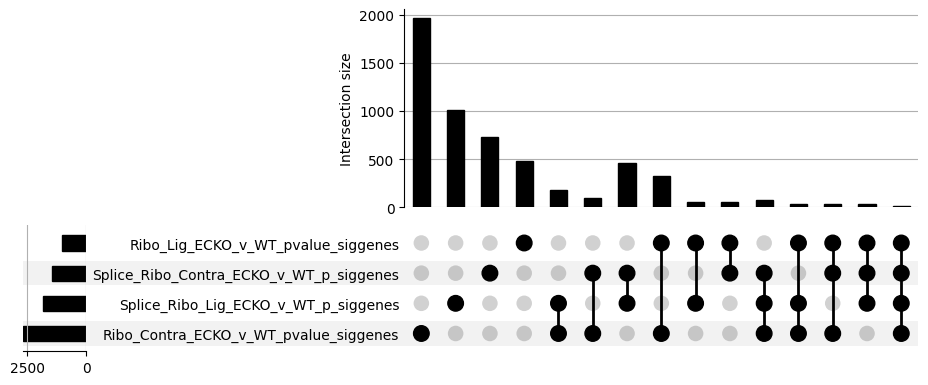

In [76]:
from upsetplot import UpSet

# Select specific keys from the combined dictionary
selected_keys = ['Splice_Ribo_Contra_ECKO_v_WT_p_siggenes', 'Splice_Ribo_Lig_ECKO_v_WT_p_siggenes', 'Ribo_Contra_ECKO_v_WT_pvalue_siggenes', 'Ribo_Lig_ECKO_v_WT_pvalue_siggenes']

# Filter the dictionary for selected keys
selected_dict = {key: LeafcutterDESeq2_gene_names_dict[key] for key in selected_keys}

# Remove duplicates from each category
selected_dict_no_duplicates = {key: list(set(genes)) for key, genes in selected_dict.items()}

# Create UpSet-compatible data for the selected keys
selected_data = from_contents(selected_dict_no_duplicates)

# Create the UpSet plot
ax = UpSet(selected_data, subset_size="count").plot()

# Save the plot as a PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/upset_plot.pdf', format='pdf')

# Show the plot (optional)
plt.show()

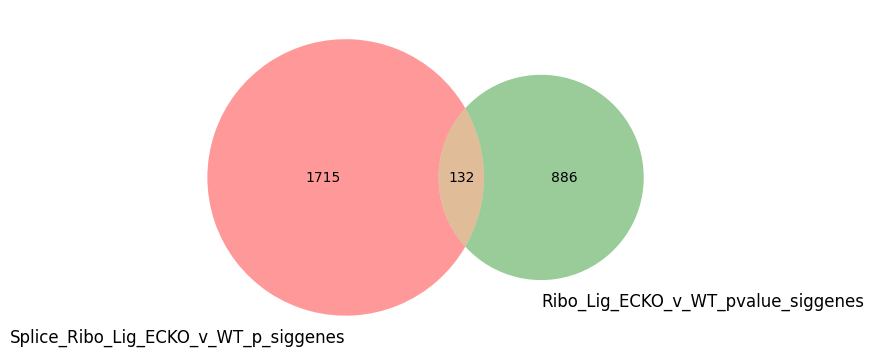

In [77]:
from matplotlib_venn import venn2

# Select specific keys from the combined dictionary
selected_keys = ['Splice_Ribo_Lig_ECKO_v_WT_p_siggenes', 'Ribo_Lig_ECKO_v_WT_pvalue_siggenes']

# Filter the dictionary for selected keys
selected_dict = {key: LeafcutterDESeq2_gene_names_dict[key] for key in selected_keys}

# Remove duplicates from each category
selected_dict_no_duplicates = {key: list(set(genes)) for key, genes in selected_dict.items()}

# Create a Venn diagram for the selected keys
venn2([set(selected_dict_no_duplicates[key]) for key in selected_keys], set_labels=selected_keys)

# Save the plot as a PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/Venn_diagram_Lig_keys.pdf', format='pdf')

# Show the plot (optional)
plt.show()

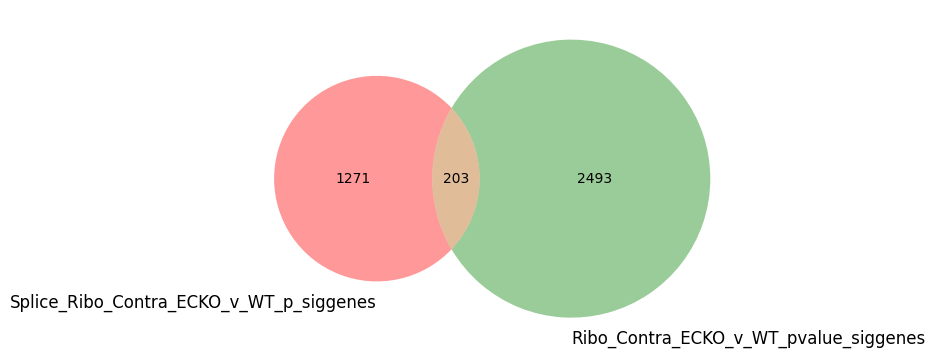

In [78]:
# Select specific keys from the combined dictionary
selected_keys = ['Splice_Ribo_Contra_ECKO_v_WT_p_siggenes', 'Ribo_Contra_ECKO_v_WT_pvalue_siggenes']

# Filter the dictionary for selected keys
selected_dict = {key: LeafcutterDESeq2_gene_names_dict[key] for key in selected_keys}

# Remove duplicates from each category
selected_dict_no_duplicates = {key: list(set(genes)) for key, genes in selected_dict.items()}

# Create a Venn diagram for the selected keys
venn2([set(selected_dict_no_duplicates[key]) for key in selected_keys], set_labels=selected_keys)

# Save the plot as a PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/Venn_diagram_Contra_keys.pdf', format='pdf')

# Show the plot (optional)
plt.show()

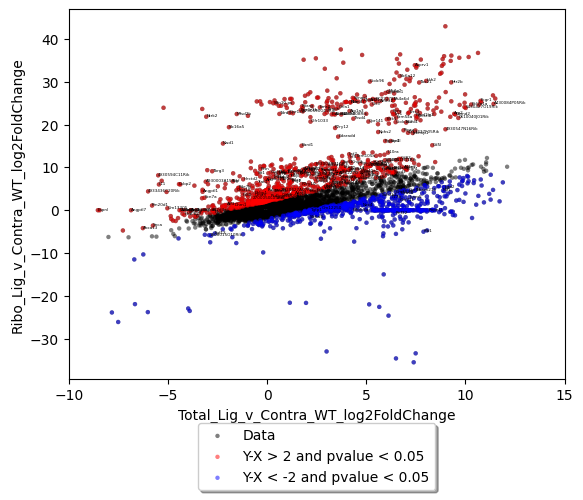

In [109]:
filtergroup1 = 'Ribo_Lig_v_Contra_WT'
filtergroup2= 'Total_Lig_v_Contra_WT'

# Filter genes with base mean > 200 in either set and Ribo_Lig_v_Contra_WT_pvalue < 0.05
filtered_df = Lig_v_Contra_merged_results_RiboTotal[((Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_baseMean'] > 100) & 
                                                     (Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_pvalue'] < 0.05)) |
                                                    (Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup2}_pvalue'] < 0.05)]
# Sort filtered DataFrame by "Ribo_Lig_ECKO_v_WT"
ECKO_filtered_df = Lig_v_Contra_merged_results_RiboTotal[Lig_v_Contra_merged_results_RiboTotal['Ribo_Lig_ECKO_v_WT_pvalue'] < 0.05]
sorted_df = filtered_df.sort_values(by='Ribo_Lig_ECKO_v_WT_log2FoldChange')

# Plot the scatter plot with 50% transparency and smaller points with empty borders
plt.scatter(sorted_df['Total_Lig_v_Contra_WT_log2FoldChange'],
            sorted_df['Ribo_Lig_v_Contra_WT_log2FoldChange'],
            color='black', alpha=0.5, s=10, edgecolor='none', label='Data')

# Mark points where Y-X > 2 and Ribo_Lig_v_Contra_WT_pvalue < 0.05 as red
red_df = sorted_df[(sorted_df['Ribo_Lig_v_Contra_WT_log2FoldChange'] - sorted_df['Total_Lig_v_Contra_WT_log2FoldChange'] > 2)]
plt.scatter(red_df['Total_Lig_v_Contra_WT_log2FoldChange'],
            red_df['Ribo_Lig_v_Contra_WT_log2FoldChange'],
            color='red', alpha=0.5, s=10, edgecolor='none', label='Y-X > 2 and pvalue < 0.05')

# Mark points where Y-X < -2 and Ribo_Lig_v_Contra_WT_pvalue < 0.05 as blue
blue_df = sorted_df[(sorted_df['Ribo_Lig_v_Contra_WT_log2FoldChange'] - sorted_df['Total_Lig_v_Contra_WT_log2FoldChange'] < -2)]
plt.scatter(blue_df['Total_Lig_v_Contra_WT_log2FoldChange'],
            blue_df['Ribo_Lig_v_Contra_WT_log2FoldChange'],
            color='blue', alpha=0.5, s=10, edgecolor='none', label='Y-X < -2 and pvalue < 0.05')

# Add legend
plt.legend()

# Write gene names for top 5 up and top 5 down genes in black
for gene in red_df.tail(200).index:
    plt.text(red_df.loc[gene, 'Total_Lig_v_Contra_WT_log2FoldChange'], red_df.loc[gene, 'Ribo_Lig_v_Contra_WT_log2FoldChange'], gene, fontsize=3, color='black')
for gene in blue_df.head(20).index:
    plt.text(blue_df.loc[gene, 'Total_Lig_v_Contra_WT_log2FoldChange'], blue_df.loc[gene, 'Ribo_Lig_v_Contra_WT_log2FoldChange'], gene, fontsize=3, color='black')

# Add legend below the plot with stacked items
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

# Set x-axis limits
plt.xlim(-10, 15)  # Replace x_min and x_max with your desired minimum and maximum values

# Set y-axis limits
#plt.ylim(-40, 40)  # Replace y_min and y_max with your desired minimum and maximum values


# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/LowFlow_scatter_plot.pdf')

# Add labels to the axes
plt.xlabel('Total_Lig_v_Contra_WT_log2FoldChange')
plt.ylabel('Ribo_Lig_v_Contra_WT_log2FoldChange')

# Show plot
plt.show()


In [110]:
# Define a list of index names to filter
index_names_to_keep = ['C1qa', 'C1qb', 'C1qc', 'Cd27']

# Use boolean indexing to filter rows based on index names
filtered_df_genes = Lig_v_Contra_merged_results_RiboTotal[Lig_v_Contra_merged_results_RiboTotal.index.isin(index_names_to_keep)]

In [111]:
transposed_filtered_df = filtered_df_genes.transpose()
transposed_filtered_df

C1qa          C1qb  \
Ribo_Lig_v_Contra_WT_baseMean             3428.74846   9441.003639   
Ribo_Lig_v_Contra_WT_log2FoldChange         3.731128      3.985009   
Ribo_Lig_v_Contra_WT_lfcSE                  0.893337      0.712039   
Ribo_Lig_v_Contra_WT_stat                    4.17662      5.596616   
Ribo_Lig_v_Contra_WT_pvalue                  0.00003           0.0   
Ribo_Lig_v_Contra_WT_padj                   0.000471      0.000001   
Total_Lig_v_Contra_WT_baseMean          13598.563072  21156.025093   
Total_Lig_v_Contra_WT_log2FoldChange          4.7234      5.048877   
Total_Lig_v_Contra_WT_lfcSE                 0.546782      0.539282   
Total_Lig_v_Contra_WT_stat                  8.638536      9.362212   
Total_Lig_v_Contra_WT_pvalue                     0.0           0.0   
Total_Lig_v_Contra_WT_padj                       0.0           0.0   
Ribo_Lig_v_Contra_ECKO_baseMean           3428.74846   9441.003639   
Ribo_Lig_v_Contra_ECKO_log2FoldChange        4.33541      4.296882   
Ribo_Lig_v_Contra_ECKO_lfcSE                0.978114      0.779559   
Ribo_Lig_v_Contra_ECKO_stat                 4.432416      5.511939   
Ribo_Lig_v_Contra_ECKO_pvalue               0.000009           0.0   
Ribo_Lig_v_Contra_ECKO_padj                 0.000351      0.000003   
Total_Lig_v_Contra_ECKO_baseMean        13598.563072  21156.025093   
Total_Lig_v_Contra_ECKO_log2FoldChange       7.20549      7.342316   
Total_Lig_v_Contra_ECKO_lfcSE               0.552777      0.543305   
Total_Lig_v_Contra_ECKO_stat               13.035083     13.514176   
Total_Lig_v_Contra_ECKO_pvalue                   0.0           0.0   
Total_Lig_v_Contra_ECKO_padj                     0.0           0.0   
Ribo_Lig_ECKO_v_WT_baseMean               3428.74846   9441.003639   
Ribo_Lig_ECKO_v_WT_log2FoldChange           1.941312      2.377267   
Ribo_Lig_ECKO_v_WT_lfcSE                    0.936157       0.74625   
Ribo_Lig_ECKO_v_WT_stat                     2.073704      3.185619   
Ribo_Lig_ECKO_v_WT_pvalue                   0.038107      0.001444   
Ribo_Lig_ECKO_v_WT_padj                     0.637408      0.112973   
Total_Lig_ECKO_v_WT_baseMean            13598.563072  21156.025093   
Total_Lig_ECKO_v_WT_log2FoldChange          -0.18692     -0.132787   
Total_Lig_ECKO_v_WT_lfcSE                   0.445297      0.439362   
Total_Lig_ECKO_v_WT_stat                   -0.419766     -0.302227   
Total_Lig_ECKO_v_WT_pvalue                  0.674657      0.762479   
Total_Lig_ECKO_v_WT_padj                         1.0           1.0   
Ribo_vs_Unbound_baseMean                 3608.036394   9429.668693   
Ribo_vs_Unbound_log2FoldChange              1.136981      0.926247   
Ribo_vs_Unbound_lfcSE                        1.00518      1.025412   
Ribo_vs_Unbound_stat                        1.131122      0.903292   
Ribo_vs_Unbound_pvalue                      0.258004      0.366371   
Ribo_vs_Unbound_padj                        0.470183      0.575873   
Ribo_Contra_ECKO_v_WT_baseMean            3428.74846   9441.003639   
Ribo_Contra_ECKO_v_WT_log2FoldChange         1.33703      2.065394   
Ribo_Contra_ECKO_v_WT_lfcSE                 0.937213      0.746876   
Ribo_Contra_ECKO_v_WT_stat                  1.426602      2.765379   
Ribo_Contra_ECKO_v_WT_pvalue                0.153695      0.005686   
Ribo_Contra_ECKO_v_WT_padj                  0.498219      0.054622   
Total_Contra_ECKO_v_WT_baseMean         13598.563072  21156.025093   
Total_Contra_ECKO_v_WT_log2FoldChange      -2.669011     -2.426226   
Total_Contra_ECKO_v_WT_lfcSE                0.637373       0.62687   
Total_Contra_ECKO_v_WT_stat                -4.187519     -3.870379   
Total_Contra_ECKO_v_WT_pvalue               0.000028      0.000109   
Total_Contra_ECKO_v_WT_padj                 0.005402       0.01305   
Ribo_v_Total_Diff                          -0.992272     -1.063868   
GeneID                                          C1qa          C1qb   
Human_GeneID                                    C1QA      

In [112]:
filtered_df

Ribo_Lig_v_Contra_WT_baseMean  \
0610009O20Rik                     270.613560   
0610010O12Rik                     228.502379   
0610031J06Rik                    5598.499148   
0610040J01Rik                      26.344817   
0910001L09Rik                    3003.450146   
...                                      ...   
Zwint                            2063.682617   
Zyg11b                           1393.218874   
Zyx                             17999.501227   
Zzef1                            1521.611904   
Zzz3                             1409.880349   

               Ribo_Lig_v_Contra_WT_log2FoldChange  \
0610009O20Rik                            -0.114740   
0610010O12Rik                            -1.301548   
0610031J06Rik                            -0.989981   
0610040J01Rik                            21.540112   
0910001L09Rik                             0.110073   
...                                            ...   
Zwint                                     0.836909   
Zyg11b                                    1.152925   
Zyx                                      -1.908390   
Zzef1                                     1.669988   
Zzz3                                      1.106667   

               Ribo_Lig_v_Contra_WT_lfcSE  Ribo_Lig_v_Contra_WT_stat  \
0610009O20Rik                    0.424206                  -0.270482   
0610010O12Rik                    0.582241                  -2.235409   
0610031J06Rik                    0.240222                  -4.121112   
0610040J01Rik                    3.333724                   6.461276   
0910001L09Rik                    0.284899                   0.386359   
...                                   ...                        ...   
Zwint                            0.321485                   2.603264   
Zyg11b                           0.511789                   2.252734   
Zyx                              0.348043                  -5.483203   
Zzef1                            0.488118                   3.421278   
Zzz3                             0.511789                   2.162350   

               Ribo_Lig_v_Contra_WT_pvalue  Ribo_Lig_v_Contra_WT_padj  \
0610009O20Rik                 7.867898e-01               9.298733e-01   
0610010O12Rik                 2.539048e-02               1.265312e-01   
0610031J06Rik                 3.770485e-05               5.867605e-04   
0610040J01Rik                 1.038240e-10               3.815808e-09   
0910001L09Rik                 6.992306e-01               8.850547e-01   
...                                    ...                        ...   
Zwint                         9.234086e-03               5.996514e-02   
Zyg11b                        2.427593e-02               1.224247e-01   
Zyx                           4.176933e-08               1.138482e-06   
Zzef1                         6.232765e-04               6.951620e-03   
Zzz3                          3.059122e-02               1.443901e-01   

               Total_Lig_v_Contra_WT_baseMean  \
0610009O20Rik                     1335.319830   
0610010O12Rik                      155.973544   
0610031J06Rik                     5966.850217   
0610040J01Rik                      118.013979   
0910001L09Rik                     1304.392422   
...                                       ...   
Zwint                             1564.691894   
Zyg11b                            1595.542515   
Zyx                              31296.157056   
Zzef1                             2269.071483   
Zzz3                              2077.027022   

               Total_Lig_v_Contra_WT_log2FoldChange  \
0610009O20Rik                             -0.598073   
0610010O12Rik                             -2.049162   
0610031J06Rik                             -0.109857   
0610040J01Rik                              9.640701   
0910001L09Rik                              0.547481   
...                                             ...   
Zwint                                      0.611879   
Zyg11b            

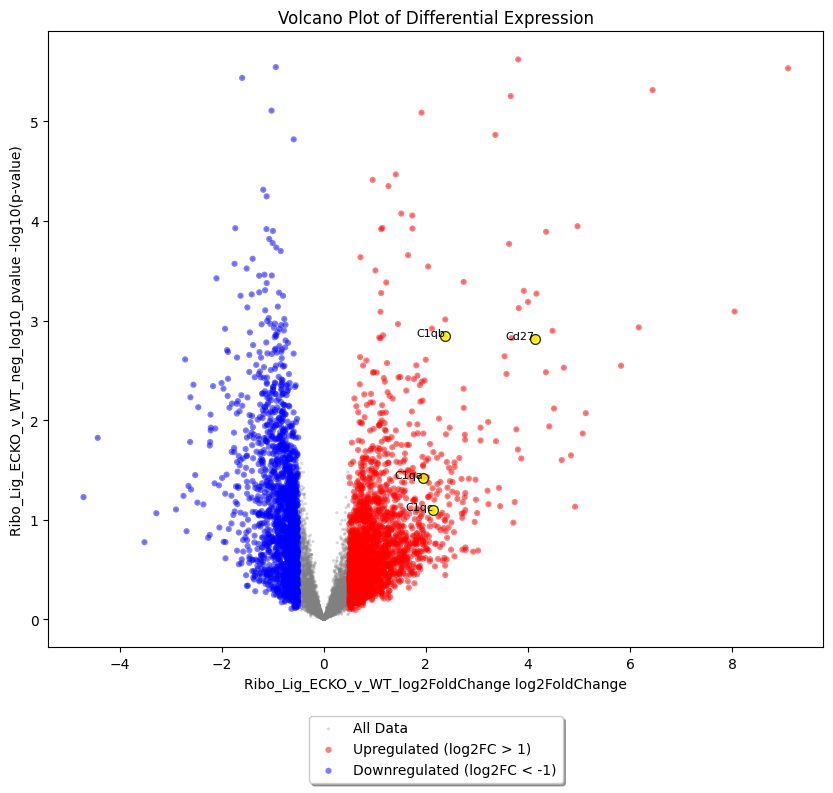

In [233]:
# Define the comparisons and genes of interest
xaxis = 'Total_Lig_v_Contra_ECKO_log2FoldChange'
yaxis = 'Ribo_Lig_v_Contra_ECKO_log2FoldChange'
highlight_genes = ['C1qa', 'C1qb', 'C1qc', 'Cd27']
comp1 = 'Ribo_Lig_ECKO_v_WT'
comp2 = 'Ribo_Lig_v_Contra_WT'
filtergroup1 = 'Ribo_Lig_v_Contra_ECKO'#'Ribo_Lig_v_Contra_ECKO'
filtergroup2 = 'Total_Lig_v_Contra_ECKO'

# Filter genes with base mean > 300 in filtergroup1
filtered_df = Lig_v_Contra_merged_results_RiboTotal[
    (Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_baseMean'] > 300)
].copy()

# Create a column for the -log10 of the p-value for comp1
filtered_df[f'{comp1}_neg_log10_pvalue'] = -np.log10(filtered_df[f'{comp1}_pvalue'])
filtered_df[f'{comp2}_neg_log10_pvalue'] = -np.log10(filtered_df[f'{comp2}_pvalue'])

# Mark points where log2FoldChange > 1 as red
red_df = filtered_df[filtered_df[f'{comp1}_log2FoldChange'] > 0.5]

# Mark points where log2FoldChange < -1 as blue
blue_df = filtered_df[filtered_df[f'{comp1}_log2FoldChange'] < -0.5]

# Function to create volcano plot with highlighting and labeling specific genes
def create_volcano_plot(data_df, red_df, blue_df, title, filename, highlight_genes, log2fc_col, neg_log10_p_col):
    plt.figure(figsize=(10, 8))
    
    # Plot all points in grey
    plt.scatter(data_df[log2fc_col], 
                data_df[neg_log10_p_col], 
                color='grey', alpha=0.3, s=5, edgecolor='none', label='All Data')
    
    # Plot red points
    plt.scatter(red_df[log2fc_col], 
                red_df[neg_log10_p_col], 
                color='red', alpha=0.5, s=20, edgecolor='none', label='Upregulated (log2FC > 1)')
    
    # Plot blue points
    plt.scatter(blue_df[log2fc_col], 
                blue_df[neg_log10_p_col], 
                color='blue', alpha=0.5, s=20, edgecolor='none', label='Downregulated (log2FC < -1)')
    
    # Label specific genes
    for gene in highlight_genes:
        if gene in data_df.index:
            gene_row = data_df.loc[gene]
            plt.scatter(gene_row[log2fc_col], 
                        gene_row[neg_log10_p_col], 
                        color='yellow', alpha=0.8, s=50, edgecolor='black')
            plt.text(gene_row[log2fc_col], 
                     gene_row[neg_log10_p_col], 
                     gene, fontsize=8, color='black', ha='right')

    plt.xlabel(f'{log2fc_col} log2FoldChange')
    plt.ylabel(f'{neg_log10_p_col} -log10(p-value)')
    plt.title(title)
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

    # Save plot to PDF
    plt.savefig(filename)

    # Show plot
    plt.show()

# Create volcano plot for filtered_df with red and blue highlights
create_volcano_plot(filtered_df, red_df, blue_df, 'Volcano Plot of Differential Expression', 
                    '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/volcano_plot_TotalvRibo_ECKO.pdf', 
                    highlight_genes, f'{comp1}_log2FoldChange', f'{comp1}_neg_log10_pvalue')

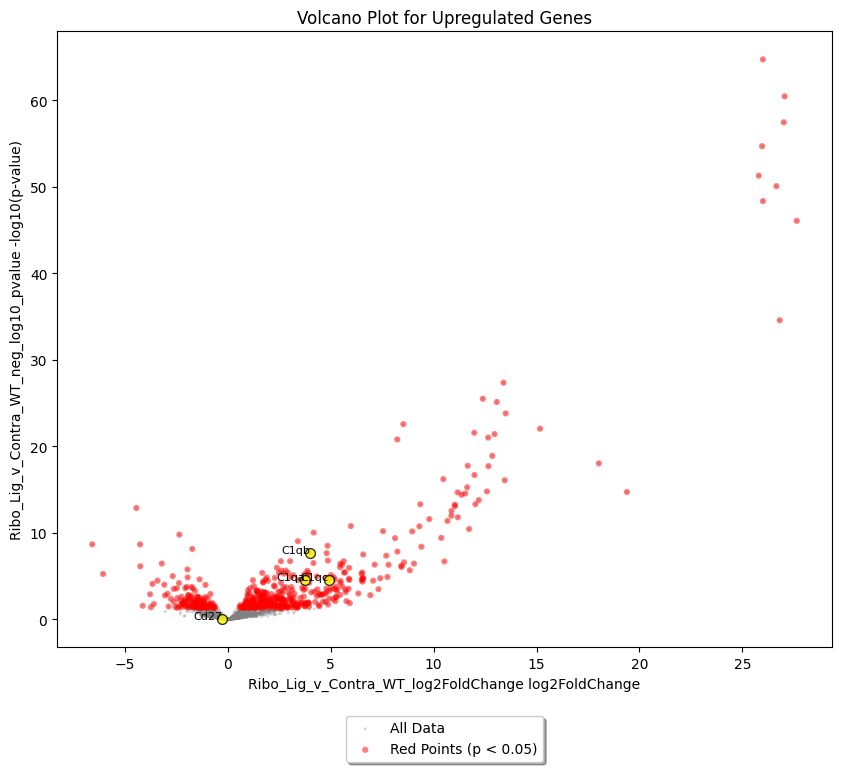

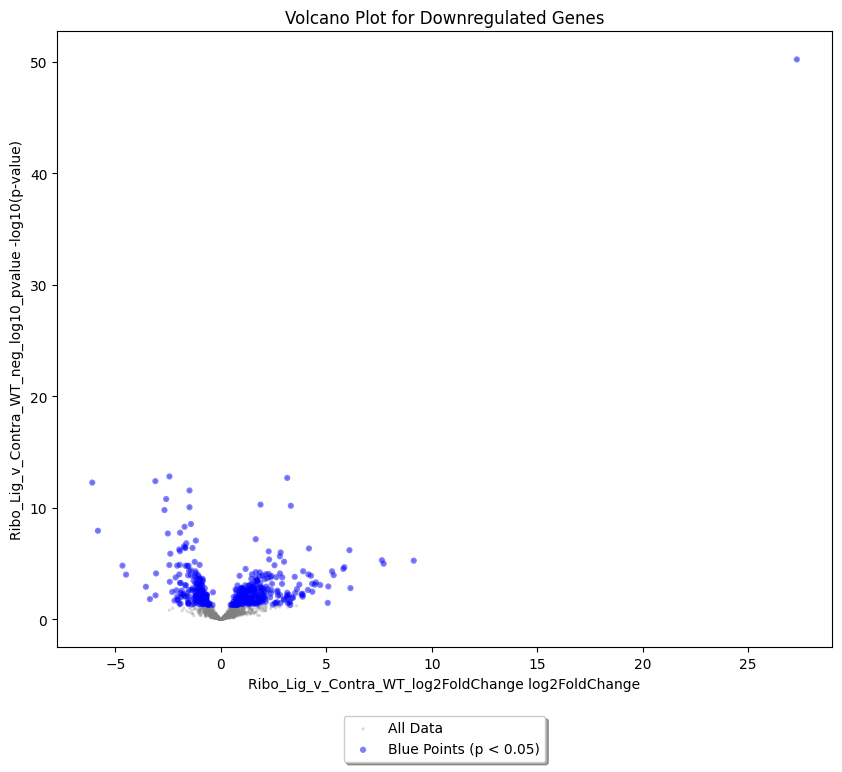

In [234]:
# Function to create volcano plot for significant points in red_df or blue_df using comp2
def create_volcano_plot_significant(data_df, color, title, filename, highlight_genes, log2fc_col, neg_log10_p_col, pvalue_threshold=0.05):
    plt.figure(figsize=(10, 8))
    
    # Plot all points in grey
    plt.scatter(data_df[log2fc_col], 
                data_df[neg_log10_p_col], 
                color='grey', alpha=0.3, s=5, edgecolor='none', label='All Data')
    
    # Highlight significant points
    significant_df = data_df[data_df[f'{comp2}_pvalue'] < pvalue_threshold]
    plt.scatter(significant_df[log2fc_col], 
                significant_df[neg_log10_p_col], 
                color=color, alpha=0.5, s=20, edgecolor='none', label=f'{color.capitalize()} Points (p < {pvalue_threshold})')

    # Highlight specific genes
    for gene in highlight_genes:
        if gene in data_df.index:
            gene_row = data_df.loc[gene]
            plt.scatter(gene_row[log2fc_col], 
                        gene_row[neg_log10_p_col], 
                        color='yellow', alpha=0.8, s=50, edgecolor='black')
            plt.text(gene_row[log2fc_col], 
                     gene_row[neg_log10_p_col], 
                     gene, fontsize=8, color='black', ha='right')

    plt.xlabel(f'{log2fc_col} log2FoldChange')
    plt.ylabel(f'{neg_log10_p_col} -log10(p-value)')
    plt.title(title)
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

    # Save plot to PDF
    plt.savefig(filename)

    # Show plot
    plt.show()

# Create volcano plot for significant points in red_df using comp2
create_volcano_plot_significant(red_df, 'red', 'Volcano Plot for Upregulated Genes', 
                                '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/volcano_plot_red_df_comp2.pdf', 
                                highlight_genes, f'{comp2}_log2FoldChange', f'{comp2}_neg_log10_pvalue')

# Create volcano plot for significant points in blue_df using comp2
create_volcano_plot_significant(blue_df, 'blue', 'Volcano Plot for Downregulated Genes', 
                                '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/volcano_plot_blue_df_comp2.pdf', 
                                highlight_genes, f'{comp2}_log2FoldChange', f'{comp2}_neg_log10_pvalue')

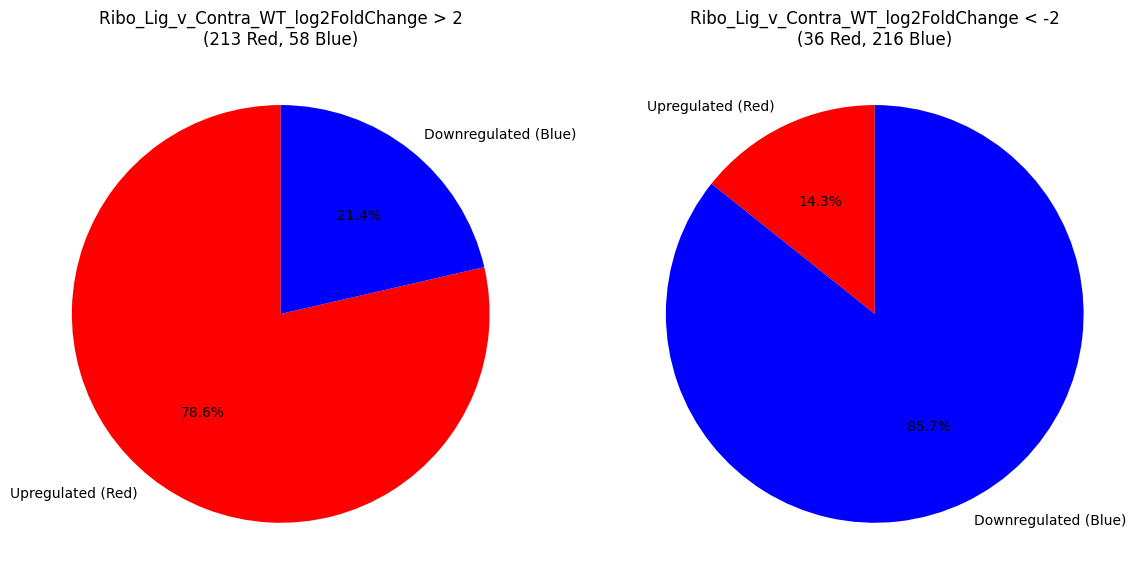

In [237]:
filtergroup3 = 'Ribo_Lig_v_Contra_WT'

red_filtered_df = red_df[
    (red_df[f'{filtergroup1}_pvalue'] < 0.05)
].copy()

blue_filtered_df = blue_df[
    (blue_df[f'{filtergroup1}_pvalue'] < 0.05)
].copy()

# Count the number of red and blue points where Ribo_Lig_v_Contra_WT_log2FoldChange > 1
red_points_gt_0 = (red_filtered_df[f'{comp2}_log2FoldChange'] > 0.5).sum()
blue_points_gt_0 = (blue_filtered_df[f'{comp2}_log2FoldChange'] > 0.5).sum()

# Count the number of red and blue points where Ribo_Lig_v_Contra_WT_log2FoldChange < -1
red_points_lt_0 = (red_filtered_df[f'{comp2}_log2FoldChange'] < -0.5).sum()
blue_points_lt_0 = (blue_filtered_df[f'{comp2}_log2FoldChange'] < -0.5).sum()

# Create data for pie charts
data_gt_0 = [red_points_gt_0, blue_points_gt_0]
data_lt_0 = [red_points_lt_0, blue_points_lt_0]
labels = ['Ribo_Lig_v_Contra_WT_log2FoldChange > 2', 'Ribo_Lig_v_Contra_WT_log2FoldChange < -2']

# Create two subplots for the pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart for Ribo_Lig_v_Contra_WT_log2FoldChange > 0
axs[0].pie(data_gt_0, labels=['Upregulated (Red)', 'Downregulated (Blue)'], autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
axs[0].set_title(f'Ribo_Lig_v_Contra_WT_log2FoldChange > 2\n({red_points_gt_0} Red, {blue_points_gt_0} Blue)')

# Plot pie chart for Ribo_Lig_v_Contra_WT_log2FoldChange < 0
axs[1].pie(data_lt_0, labels=['Upregulated (Red)', 'Downregulated (Blue)'], autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
axs[1].set_title(f'Ribo_Lig_v_Contra_WT_log2FoldChange < -2\n({red_points_lt_0} Red, {blue_points_lt_0} Blue)')

# Adjust layout
plt.tight_layout()

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/PieChartRegulated.pdf')

# Show plot
plt.show()

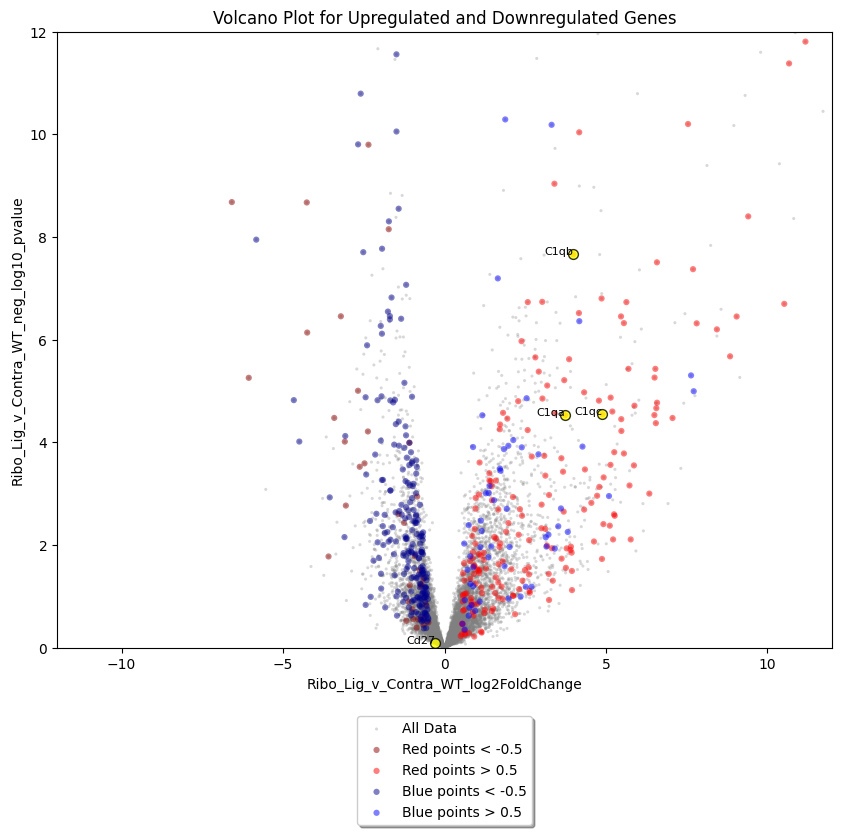

In [238]:
# Function to create volcano plot for significant points in red_df and blue_df using comp2
def create_volcano_plot_combined(filtered_df, red_lt_0_data, red_gt_0_data, blue_lt_0_data, blue_gt_0_data, title, filename, highlight_genes, log2fc_col, neg_log10_p_col, xlim=(-12, 12), ylim=(0, 12)):
    plt.figure(figsize=(10, 8))
    
    # Plot all points in grey
    plt.scatter(filtered_df[log2fc_col], 
                filtered_df[neg_log10_p_col], 
                color='grey', alpha=0.3, s=5, edgecolor='none', label='All Data')
    
    # Highlight filtered points
    plt.scatter(red_lt_0_data[log2fc_col], 
                red_lt_0_data[neg_log10_p_col], 
                color='darkred', alpha=0.5, s=20, edgecolor='none', label='Red points < -0.5')
    
    plt.scatter(red_gt_0_data[log2fc_col], 
                red_gt_0_data[neg_log10_p_col], 
                color='red', alpha=0.5, s=20, edgecolor='none', label='Red points > 0.5')
    
    plt.scatter(blue_lt_0_data[log2fc_col], 
                blue_lt_0_data[neg_log10_p_col], 
                color='darkblue', alpha=0.5, s=20, edgecolor='none', label='Blue points < -0.5')
    
    plt.scatter(blue_gt_0_data[log2fc_col], 
                blue_gt_0_data[neg_log10_p_col], 
                color='blue', alpha=0.5, s=20, edgecolor='none', label='Blue points > 0.5')

    # Highlight specific genes
    for gene in highlight_genes:
        if gene in filtered_df.index:
            gene_row = filtered_df.loc[gene]
            plt.scatter(gene_row[log2fc_col], 
                        gene_row[neg_log10_p_col], 
                        color='yellow', alpha=0.8, s=50, edgecolor='black')
            plt.text(gene_row[log2fc_col], 
                     gene_row[neg_log10_p_col], 
                     gene, fontsize=8, color='black', ha='right')

    plt.xlabel(f'{log2fc_col}')
    plt.ylabel(f'{neg_log10_p_col}')
    plt.title(title)
    
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

    # Save plot to PDF
    plt.savefig(filename)

    # Show plot
    plt.show()

# Create combined volcano plot for significant points in red_df and blue_df using comp2
create_volcano_plot_combined(filtered_df, red_points_lt_0_data, red_points_gt_0_data, blue_points_lt_0_data, blue_points_gt_0_data, 
                             'Volcano Plot for Upregulated and Downregulated Genes', 
                             '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/volcano_plot_combined_comp2.pdf', 
                             highlight_genes, f'{comp2}_log2FoldChange', f'{comp2}_neg_log10_pvalue')

In [212]:
red_points_lt_0_data = red_filtered_df[(red_filtered_df[f'{comp2}_log2FoldChange'] < -0.5)].copy()
blue_points_lt_0_data = blue_filtered_df[(blue_filtered_df[f'{comp2}_log2FoldChange'] < -0.5)].copy()
red_points_gt_0_data = red_filtered_df[(red_filtered_df[f'{comp2}_log2FoldChange'] > 0.5)].copy()
blue_points_gt_0_data = blue_filtered_df[(blue_filtered_df[f'{comp2}_log2FoldChange'] > 0.5)].copy()

In [215]:
red_points_lt_0_data.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/ElavlECKOup_LowFlowDown.csv', index=True)
blue_points_lt_0_data.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/ElavlECKOdown_LowFlowDown.csv', index=True)
red_points_gt_0_data.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/ElavlECKOup_LowFlowUp.csv', index=True)
blue_points_gt_0_data.to_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/ElavlECKOdown_LowFlowUp.csv', index=True)

In [289]:
# Function to prepare gene list for Enrichr
def prepare_gene_list(df, conversion_dict, base_mean_col, base_mean_threshold=0, top_n=300):
#    df_sorted = df.sort_values(by='Ribo_v_Total_Diff', ascending=False)
#    df_sorted['Human_GeneID'] = df_sorted['GeneID'].map(conversion_dict)
 #   df_filtered = df_sorted[df_sorted[base_mean_col] > base_mean_threshold]
    top_genes = df['Human_GeneID']
    top_genes_str = top_genes.dropna().astype(str)
    gene_list = [gene_id for gene_id in top_genes_str]
    return gene_list

# Function to run Enrichr with retry mechanism
def run_enrichr(gene_list, gene_sets=['MSigDB_Hallmark_2020', 'Reactome_2022', 'GO_Biological_Process_2023'], organism='human', retries=5, backoff_factor=1):
    for attempt in range(retries):
        try:
            enr = gseapy.enrichr(
                gene_list=gene_list,
                gene_sets=gene_sets,
                organism=organism,
                outdir=None
            )
            return enr
        except ConnectionError as e:
            if attempt < retries - 1:
                time.sleep(backoff_factor * (2 ** attempt))  # exponential backoff
            else:
                raise e

#
#'KEGG_2021_Human', 
#

# Define the base mean column for filtering
base_mean_col = 'Ribo_Lig_v_Contra_WT_baseMean'

# Prepare gene lists for each subset
red_points_lt_0_genes = prepare_gene_list(red_points_lt_0_data, m2h_dict, base_mean_col)
blue_points_lt_0_genes = prepare_gene_list(blue_points_lt_0_data, m2h_dict, base_mean_col)
red_points_gt_0_genes = prepare_gene_list(red_points_gt_0_data, m2h_dict, base_mean_col)
blue_points_gt_0_genes = prepare_gene_list(blue_points_gt_0_data, m2h_dict, base_mean_col)

# Run Enrichr for each gene list
enr_red_lt_0 = run_enrichr(red_points_lt_0_genes)
enr_blue_lt_0 = run_enrichr(blue_points_lt_0_genes)
enr_red_gt_0 = run_enrichr(red_points_gt_0_genes)
enr_blue_gt_0 = run_enrichr(blue_points_gt_0_genes)

In [290]:
#red_points_gt_0_genes

In [291]:
enr_red_gt_0.results.head()

Gene_set                           Term Overlap       P-value  \
0  MSigDB_Hallmark_2020                     Complement  15/200  5.361770e-10   
1  MSigDB_Hallmark_2020              KRAS Signaling Up  13/200  4.371340e-08   
2  MSigDB_Hallmark_2020  TNF-alpha Signaling via NF-kB  12/200  3.489401e-07   
3  MSigDB_Hallmark_2020           IL-2/STAT5 Signaling  11/199  2.426794e-06   
4  MSigDB_Hallmark_2020          Inflammatory Response  11/200  2.547728e-06   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      2.144708e-08            0                     0    9.418359   
1      8.742679e-07            0                     0    7.980017   
2      4.652535e-06            0                     0    7.284018   
3      2.038183e-05            0                     0    6.638421   
4      2.038183e-05            0                     0    6.602961   

   Combined Score                                              Genes  
0      201.049540  LYN;C1QA;CEBPB;FCER1G;ITGAM;F10;LRP1;PLA2G7;CT...  
1      135.226264  FCER1G;IL10RA;USP12;CSF2RA;CTSS;LAT2;MAFB;GPNM...  
2      108.301439  TGIF1;ABCA1;MARCKS;CEBPB;CD83;GADD45B;BCL2A1;I...  
3       85.827742  CD83;GADD45B;GSTO1;GPR65;IL10RA;IRF8;SH3BGRL2;...  
4       85.048168  ABCA1;LYN;MSR1;AXL;RGS1;IL10RA;IFNGR2;C3AR1;CD...

In [292]:
# Function to plot and save the enrichment results
def plot_and_save_enrichment_results(enr_results, title, filepath):
    ax = barplot(enr_results.results,
              column="Adjusted P-value",
              group='Gene_set',
              size=10,
              top_term=5,
              figsize=(3,5),
              color=['darkred', 'darkblue', 'salmon', 'powderblue'])
    ax.figure.savefig(filepath, format='pdf')
    plt.close(ax.figure)

# Plot and save the results
plot_and_save_enrichment_results(enr_red_lt_0, 'GO Term TRAP Down (red < 0.5)', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/GSEA_TRAP_ECKOup_LowFlowDown.pdf')
plot_and_save_enrichment_results(enr_blue_lt_0, 'GO Term TRAP Down (blue < 0.5)', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/GSEA_TRAP_ECKOdown_LowFlowDown.pdf')
plot_and_save_enrichment_results(enr_red_gt_0, 'GO Term TRAP Up (red > 0.5)', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/GSEA_TRAP_ECKOup_LowFlowUp.pdf')
plot_and_save_enrichment_results(enr_blue_gt_0, 'GO Term TRAP Up (blue > 0.5)', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/GSEA_TRAP_ECKOdown_LowFlowUp.pdf')

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyw

In [244]:
# Assuming your DataFrame is named Lig_v_Contra_merged_results_RiboTotal
df = Lig_v_Contra_merged_results_RiboTotal

# Filter the DataFrame based on the criteria
filtered_genes = df[
    (df['Ribo_Lig_v_Contra_ECKO_baseMean'] > 300) &
    (df['Ribo_Lig_v_Contra_ECKO_pvalue'] < 0.05) &
    (df['Ribo_Lig_ECKO_v_WT_log2FoldChange'] > 0.5) &
    (df['Ribo_Lig_v_Contra_WT_log2FoldChange'] > 0.5)
]

# Count the number of matching genes
matching_genes_count = filtered_genes.shape[0]

print(f'Up in ECKO vs WT Lig, Up in Lig vs Contra: {matching_genes_count}')

# Filter the DataFrame based on the criteria
filtered_genes = df[
    (df['Ribo_Lig_v_Contra_ECKO_baseMean'] > 300) &
    (df['Ribo_Lig_v_Contra_ECKO_pvalue'] < 0.05) &
    (df['Ribo_Lig_ECKO_v_WT_log2FoldChange'] > 0.5) &
    (df['Ribo_Lig_v_Contra_WT_log2FoldChange'] < -0.5)
]

# Count the number of matching genes
matching_genes_count = filtered_genes.shape[0]

print(f'Up in ECKO vs WT Lig, Down in Lig vs Contra: {matching_genes_count}')

# Filter the DataFrame based on the criteria
filtered_genes = df[
    (df['Ribo_Lig_v_Contra_ECKO_baseMean'] > 300) &
    (df['Ribo_Lig_v_Contra_ECKO_pvalue'] < 0.05) &
    (df['Ribo_Lig_ECKO_v_WT_log2FoldChange'] < -0.5) &
    (df['Ribo_Lig_v_Contra_WT_log2FoldChange'] < -0.5)
]

# Count the number of matching genes
matching_genes_count = filtered_genes.shape[0]

print(f'Down in ECKO vs WT Lig, Down in Lig vs Contra: {matching_genes_count}')

# Filter the DataFrame based on the criteria
filtered_genes = df[
    (df['Ribo_Lig_v_Contra_ECKO_baseMean'] > 300) &
    (df['Ribo_Lig_v_Contra_ECKO_pvalue'] < 0.05) &
    (df['Ribo_Lig_ECKO_v_WT_log2FoldChange'] < -0.5) &
    (df['Ribo_Lig_v_Contra_WT_log2FoldChange'] > 0.5)
]

# Count the number of matching genes
matching_genes_count = filtered_genes.shape[0]

print(f'Down in ECKO vs WT Lig, Up in Lig vs Contra: {matching_genes_count}')

Up in ECKO vs WT Lig, Up in Lig vs Contra: 213
Up in ECKO vs WT Lig, Down in Lig vs Contra: 36
Down in ECKO vs WT Lig, Down in Lig vs Contra: 216
Down in ECKO vs WT Lig, Up in Lig vs Contra: 58


In [86]:
# Filter genes with base mean > 100 in either set
Lig_v_Contra_merged_results_RiboTotal_filt = Lig_v_Contra_merged_results_RiboTotal[((Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_baseMean'] > 300) & 
                                                     (Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup1}_pvalue'] < 0.05)) |
                                                    (Lig_v_Contra_merged_results_RiboTotal[f'{filtergroup2}_pvalue'] < 0.05)]

top_Lig_v_Contra_merged_results_RiboTotal = Lig_v_Contra_merged_results_RiboTotal_filt[Lig_v_Contra_merged_results_RiboTotal_filt['Ribo_v_Total_Diff'] > 1.5].copy()
top_genes = top_Lig_v_Contra_merged_results_RiboTotal['Human_GeneID'].dropna().tolist()

top_genes_res = gseapy.enrichr(gene_list=top_genes,
        gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human', 'GO_Biological_Process_2023', 'Reactome_2022'],
        organism='human')


In [87]:
top_genes_res.results.head(50)

Gene_set                                    Term Overlap  \
0   MSigDB_Hallmark_2020                   Inflammatory Response  37/200   
1   MSigDB_Hallmark_2020                    IL-2/STAT5 Signaling  25/199   
2   MSigDB_Hallmark_2020           TNF-alpha Signaling via NF-kB  25/200   
3   MSigDB_Hallmark_2020                     Allograft Rejection  25/200   
4   MSigDB_Hallmark_2020                       KRAS Signaling Up  25/200   
5   MSigDB_Hallmark_2020                          UV Response Dn  19/144   
6   MSigDB_Hallmark_2020                         Mitotic Spindle  20/199   
7   MSigDB_Hallmark_2020                            Adipogenesis  20/200   
8   MSigDB_Hallmark_2020       Epithelial Mesenchymal Transition  20/200   
9   MSigDB_Hallmark_2020                         Notch Signaling    6/32   
10  MSigDB_Hallmark_2020                IL-6/JAK/STAT3 Signaling   11/87   
11  MSigDB_Hallmark_2020                            Angiogenesis    6/36   
12  MSigDB_Hallmark_2020                             Coagulation  13/138   
13  MSigDB_Hallmark_2020               Interferon Gamma Response  17/200   
14  MSigDB_Hallmark_2020                         Apical Junction  17/200   
15  MSigDB_Hallmark_2020                              Glycolysis  17/200   
16  MSigDB_Hallmark_2020                 Estrogen Response Early  16/200   
17  MSigDB_Hallmark_2020                              Complement  15/200   
18  MSigDB_Hallmark_2020                                 Hypoxia  14/200   
19  MSigDB_Hallmark_2020                  Estrogen Response Late  14/200   
20  MSigDB_Hallmark_2020                 Cholesterol Homeostasis    6/74   
21  MSigDB_Hallmark_2020                             E2F Targets  13/200   
22  MSigDB_Hallmark_2020                       KRAS Signaling Dn  13/200   
23  MSigDB_Hallmark_2020                      Hedgehog Signaling    3/36   
24  MSigDB_Hallmark_2020                             Pperoxisome   7/104   
25  MSigDB_Hallmark_2020                      TGF-beta Signaling    4/54   
26  MSigDB_Hallmark_2020                PI3K/AKT/mTOR  Signaling   7/105   
27  MSigDB_Hallmark_2020                               Apoptosis  10/161   
28  MSigDB_Hallmark_2020                   Xenobiotic Metabolism  12/200   
29  MSigDB_Hallmark_2020                    Bile Acid Metabolism   7/112   
30  MSigDB_Hallmark_2020                   Fatty Acid Metabolism   9/158   
31  MSigDB_Hallmark_2020                          UV Response Up   9/158   
32  MSigDB_Hallmark_2020                         G2-M Checkpoint  11/200   
33  MSigDB_Hallmark_2020                              Myogenesis  11/200   
34  MSigDB_Hallmark_2020                         Spermatogenesis   7/135   
35  MSigDB_Hallmark_2020                       Androgen Response   5/100   
36  MSigDB_Hallmark_2020                             p53 Pathway  10/200   
37  MSigDB_Hallmark_2020              Wnt-beta Catenin Signaling    2/42   
38  MSigDB_Hallmark_2020                          Apical Surface    2/44   
39  MSigDB_Hallmark_2020         Reactive Oxygen Species Pathway    2/49   
40  MSigDB_Hallmark_2020                          Myc Targets V2    2/58   
41  MSigDB_Hallmark_2020                         heme Metabolism   8/200   
42  MSigDB_Hallmark_2020               Interferon Alpha Response    3/97   
43  MSigDB_Hallmark_2020                        mTORC1 Signaling   7/200   
44  MSigDB_Hallmark_2020               Unfolded Protein Response   3/113   
45  MSigDB_Hallmark_2020                       Protein Secretion    2/96   
46  MSigDB_Hallmark_2020               Oxidative Phosphorylation   5/200   
47  MSigDB_Hallmark_2020                              DNA Repair   3/150   
48  MSigDB_Hallmark_2020                          Myc Targets V1   1/200   
49       KEGG_2021_Human  Cytokine-cytokine receptor interaction  35/295   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   3.986701e-11      1.953484e-09            0                   

In [88]:
top_genes_res.results.to_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/Ribo_v_Total_TopGeneFilt.csv", index=False)

In [89]:
# Convert "Overlap" to numerator and denominator
top_genes_res.results[['Overlap_numerator', 'Overlap_denominator']] = top_genes_res.results['Overlap'].str.split('/', expand=True)

# Convert to numeric type
top_genes_res.results['Overlap_numerator'] = pd.to_numeric(top_genes_res.results['Overlap_numerator'])

# Filter by count of "Overlap" numerator greater than 5
top_genes_res_filtered_df = top_genes_res.results[top_genes_res.results['Overlap_numerator'] > 5]

# Sort the DataFrame by combined score in descending order
sorted_top_genes_res_filtered_df = top_genes_res_filtered_df.sort_values(by='Combined Score', ascending=False)


/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


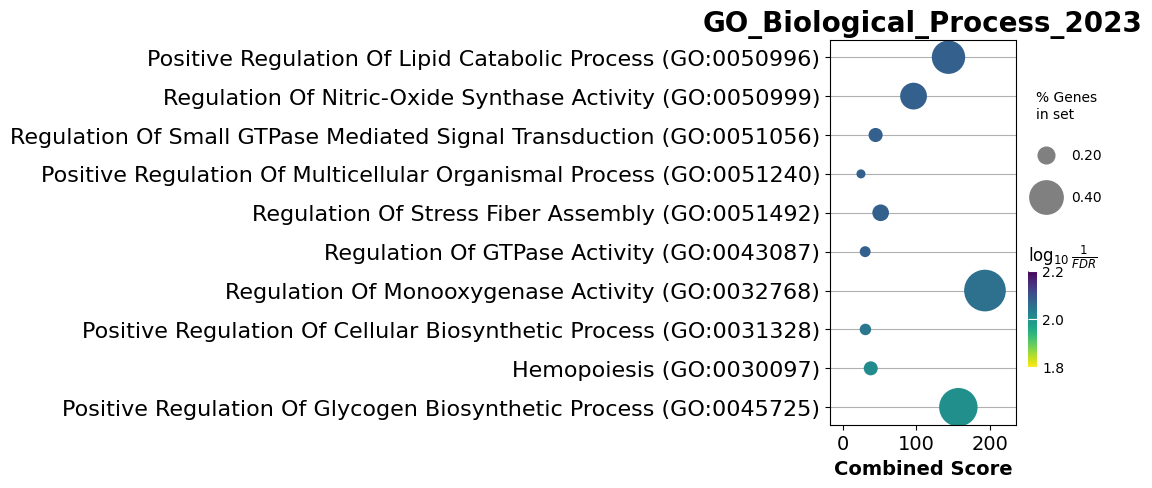

In [90]:
# Filter the DataFrame to include only rows where "Gene_set" contains "GO_Biological_Process_2023"
sorted_top_genes_res_filtered_df_goterm = sorted_top_genes_res_filtered_df[sorted_top_genes_res_filtered_df['Gene_set'].str.contains('GO_Biological_Process_2023')].copy()

ax = dotplot(sorted_top_genes_res_filtered_df_goterm, title='GO_Biological_Process_2023',cmap='viridis_r', size=10, figsize=(3,5))

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/sorted_top_genes_res_filtered_df_goterm.pdf', bbox_inches='tight')

# Show the plot
plt.show()

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


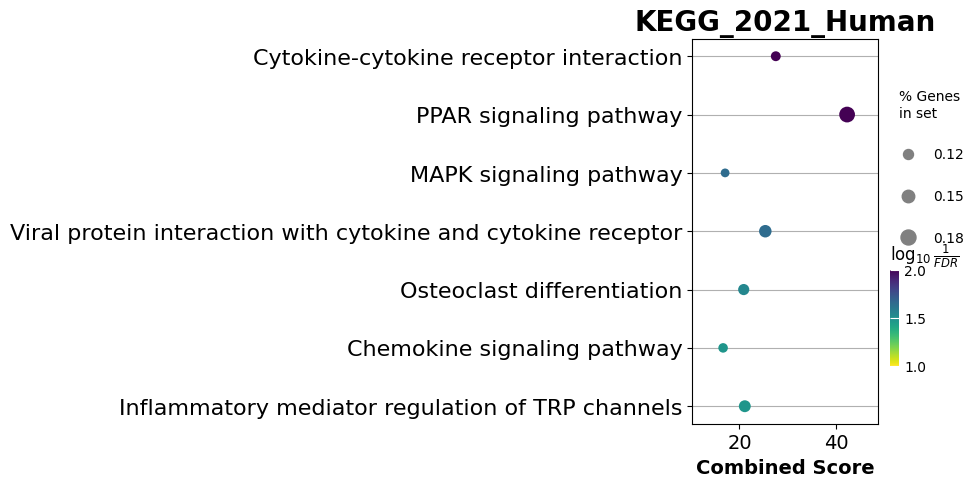

In [91]:
# Filter the DataFrame to include only rows where "Gene_set" contains "GO_Biological_Process_2023"
sorted_top_genes_res_filtered_df_kegg = sorted_top_genes_res_filtered_df[sorted_top_genes_res_filtered_df['Gene_set'].str.contains('KEGG_2021_Human')].copy()

ax = dotplot(sorted_top_genes_res_filtered_df_kegg, title='KEGG_2021_Human',cmap='viridis_r', size=10, figsize=(3,5))

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/sorted_top_genes_res_filtered_df_kegg.pdf', bbox_inches='tight')

# Show the plot
plt.show()

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


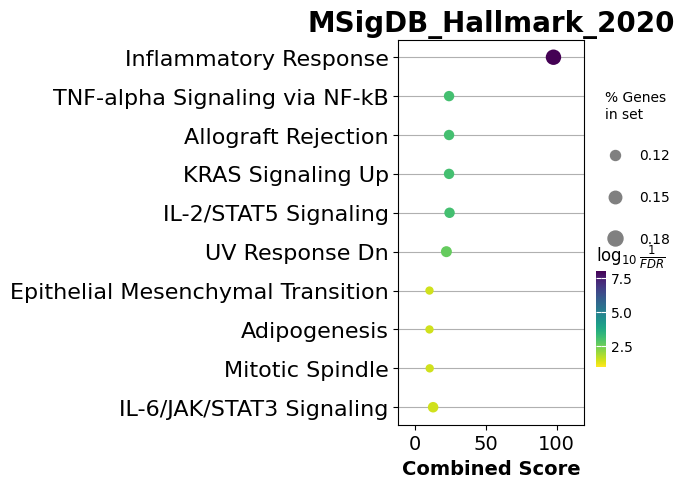

In [92]:
# Filter the DataFrame to include only rows where "Gene_set" contains "GO_Biological_Process_2023"
sorted_top_genes_res_filtered_df_hallmark = sorted_top_genes_res_filtered_df[sorted_top_genes_res_filtered_df['Gene_set'].str.contains('MSigDB_Hallmark_2020')].copy()

ax = dotplot(sorted_top_genes_res_filtered_df_hallmark, title='MSigDB_Hallmark_2020',cmap='viridis_r', size=10, figsize=(3,5))

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/sorted_top_genes_res_filtered_df_hallmark.pdf', bbox_inches='tight')

# Show the plot
plt.show()

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


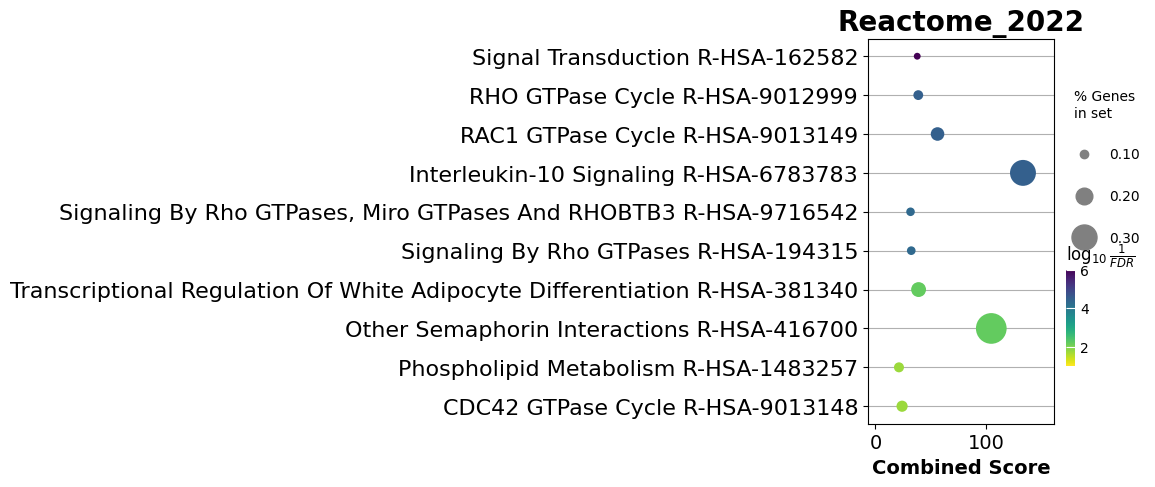

In [93]:
# Filter the DataFrame to include only rows where "Gene_set" contains "GO_Biological_Process_2023"
sorted_top_genes_res_filtered_df_reactome = sorted_top_genes_res_filtered_df[sorted_top_genes_res_filtered_df['Gene_set'].str.contains('Reactome_2022')].copy()

ax = dotplot(sorted_top_genes_res_filtered_df_reactome, title='Reactome_2022',cmap='viridis_r', size=10, figsize=(3,5))

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/sorted_top_genes_res_filtered_df_reactome.pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [94]:
bot_Lig_v_Contra_merged_results_RiboTotal = Lig_v_Contra_merged_results_RiboTotal_filt[Lig_v_Contra_merged_results_RiboTotal_filt['Ribo_v_Total_Diff'] < -1.5].copy()
bot_genes = bot_Lig_v_Contra_merged_results_RiboTotal['Human_GeneID'].dropna().tolist()

bot_genes_res = gseapy.enrichr(gene_list=bot_genes,
        gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human', 'GO_Biological_Process_2023', 'Reactome_2022'],
        organism='human')

In [95]:
bot_genes_res.results.head(50)

Gene_set                                    Term Overlap  \
0   MSigDB_Hallmark_2020                   Inflammatory Response  21/200   
1   MSigDB_Hallmark_2020                     Allograft Rejection  19/200   
2   MSigDB_Hallmark_2020       Epithelial Mesenchymal Transition  17/200   
3   MSigDB_Hallmark_2020                              Myogenesis  16/200   
4   MSigDB_Hallmark_2020                    IL-2/STAT5 Signaling  15/199   
5   MSigDB_Hallmark_2020                         G2-M Checkpoint  15/200   
6   MSigDB_Hallmark_2020                       KRAS Signaling Up  15/200   
7   MSigDB_Hallmark_2020                IL-6/JAK/STAT3 Signaling    9/87   
8   MSigDB_Hallmark_2020               Interferon Gamma Response  14/200   
9   MSigDB_Hallmark_2020                             E2F Targets  14/200   
10  MSigDB_Hallmark_2020               Interferon Alpha Response    8/97   
11  MSigDB_Hallmark_2020                                 Hypoxia  12/200   
12  MSigDB_Hallmark_2020                  Estrogen Response Late  12/200   
13  MSigDB_Hallmark_2020                              Complement  12/200   
14  MSigDB_Hallmark_2020                        mTORC1 Signaling  12/200   
15  MSigDB_Hallmark_2020                             Coagulation   9/138   
16  MSigDB_Hallmark_2020                         Mitotic Spindle  11/199   
17  MSigDB_Hallmark_2020                         Apical Junction  11/200   
18  MSigDB_Hallmark_2020                       KRAS Signaling Dn  11/200   
19  MSigDB_Hallmark_2020                               Apoptosis   8/161   
20  MSigDB_Hallmark_2020                     Pancreas Beta Cells    3/40   
21  MSigDB_Hallmark_2020           TNF-alpha Signaling via NF-kB   9/200   
22  MSigDB_Hallmark_2020                              Glycolysis   9/200   
23  MSigDB_Hallmark_2020                         Spermatogenesis   6/135   
24  MSigDB_Hallmark_2020                 Estrogen Response Early   8/200   
25  MSigDB_Hallmark_2020                             p53 Pathway   8/200   
26  MSigDB_Hallmark_2020                            Angiogenesis    2/36   
27  MSigDB_Hallmark_2020                         heme Metabolism   7/200   
28  MSigDB_Hallmark_2020                          Apical Surface    2/44   
29  MSigDB_Hallmark_2020                          UV Response Dn   5/144   
30  MSigDB_Hallmark_2020                PI3K/AKT/mTOR  Signaling   3/105   
31  MSigDB_Hallmark_2020                 Cholesterol Homeostasis    2/74   
32  MSigDB_Hallmark_2020                          UV Response Up   4/158   
33  MSigDB_Hallmark_2020                      Hedgehog Signaling    1/36   
34  MSigDB_Hallmark_2020              Wnt-beta Catenin Signaling    1/42   
35  MSigDB_Hallmark_2020                       Androgen Response   2/100   
36  MSigDB_Hallmark_2020                              DNA Repair   3/150   
37  MSigDB_Hallmark_2020                             Pperoxisome   2/104   
38  MSigDB_Hallmark_2020                            Adipogenesis   4/200   
39  MSigDB_Hallmark_2020                          Myc Targets V2    1/58   
40  MSigDB_Hallmark_2020                    Bile Acid Metabolism   2/112   
41  MSigDB_Hallmark_2020               Unfolded Protein Response   2/113   
42  MSigDB_Hallmark_2020                          Myc Targets V1   3/200   
43  MSigDB_Hallmark_2020                   Xenobiotic Metabolism   3/200   
44  MSigDB_Hallmark_2020               Oxidative Phosphorylation   3/200   
45  MSigDB_Hallmark_2020                   Fatty Acid Metabolism   1/158   
46       KEGG_2021_Human  Cytokine-cytokine receptor interaction  31/295   
47       KEGG_2021_Human                            Tuberculosis  20/180   
48       KEGG_2021_Human               Graft-versus-host disease   10/42   
49       KEGG_2021_Human              Inflammatory bowel disease   12/65   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   1.288255e-07      5.925972e-06            0                   

In [96]:
bot_genes_res.results.to_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/Ribo_v_Total_BotGeneFilt.csv", index=False)

In [97]:
# Convert "Overlap" to numerator and denominator
bot_genes_res.results[['Overlap_numerator', 'Overlap_denominator']] = bot_genes_res.results['Overlap'].str.split('/', expand=True)

# Convert to numeric type
bot_genes_res.results['Overlap_numerator'] = pd.to_numeric(bot_genes_res.results['Overlap_numerator'])

# Filter by count of "Overlap" numerator greater than 20
bot_genes_res_filtered_df = bot_genes_res.results[bot_genes_res.results['Overlap_numerator'] > 5]

# Sort the DataFrame by combined score in descending order
sorted_bot_genes_res_filtered_df = bot_genes_res_filtered_df.sort_values(by='Combined Score', ascending=False)


/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


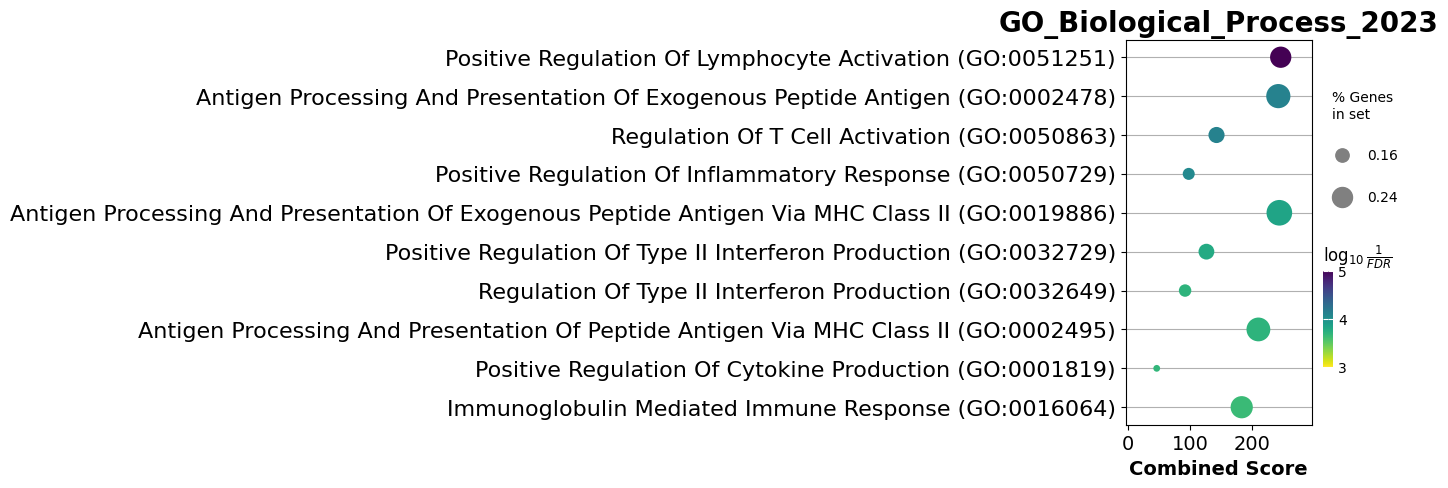

In [98]:
# Filter the DataFrame to include only rows where "Gene_set" contains "GO_Biological_Process_2023"
sorted_bot_genes_res_filtered_df_goterm = sorted_bot_genes_res_filtered_df[sorted_bot_genes_res_filtered_df['Gene_set'].str.contains('GO_Biological_Process_2023')].copy()

ax = dotplot(sorted_bot_genes_res_filtered_df_goterm, title='GO_Biological_Process_2023',cmap='viridis_r', size=10, figsize=(3,5))

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/sorted_bot_genes_res_filtered_df_goterm.pdf', bbox_inches='tight')

# Show the plot
plt.show()

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


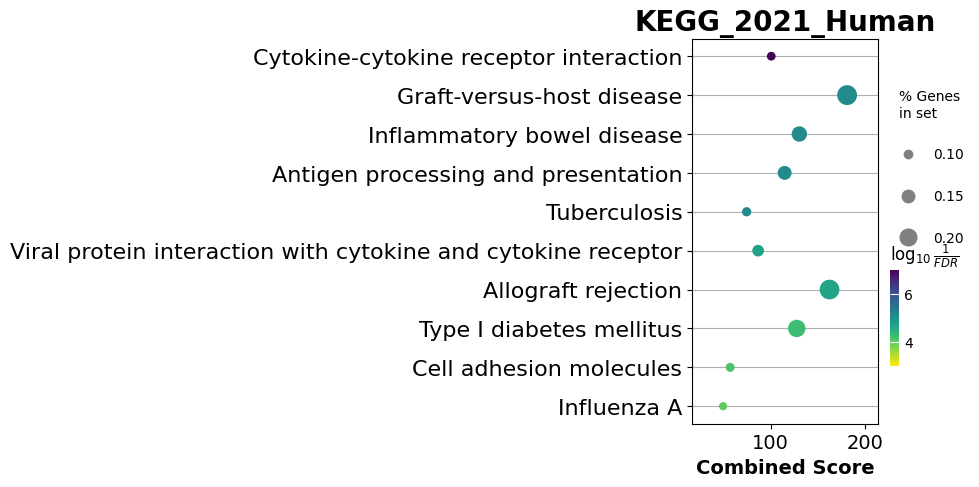

In [99]:
# Filter the DataFrame to include only rows where "Gene_set" contains "GO_Biological_Process_2023"
sorted_bot_genes_res_filtered_df_kegg = sorted_bot_genes_res_filtered_df[sorted_bot_genes_res_filtered_df['Gene_set'].str.contains('KEGG_2021_Human')].copy()

ax = dotplot(sorted_bot_genes_res_filtered_df_kegg, title='KEGG_2021_Human',cmap='viridis_r', size=10, figsize=(3,5))

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/sorted_bot_genes_res_filtered_df_kegg.pdf', bbox_inches='tight')

# Show the plot
plt.show()

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


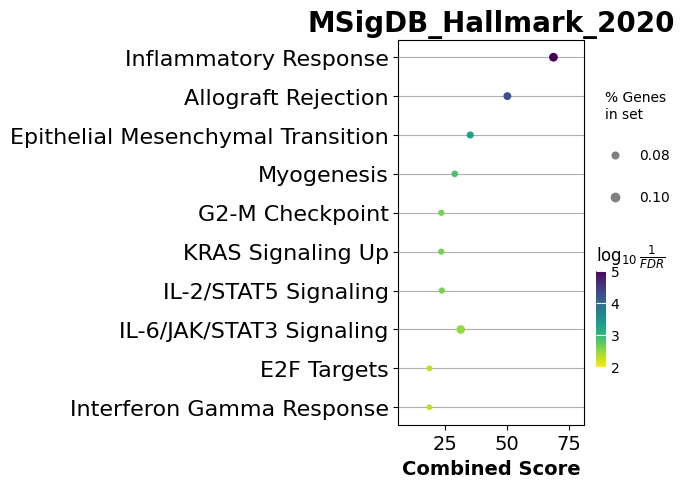

In [100]:
# Filter the DataFrame to include only rows where "Gene_set" contains "GO_Biological_Process_2023"
sorted_bot_genes_res_filtered_df_hallmark = sorted_bot_genes_res_filtered_df[sorted_bot_genes_res_filtered_df['Gene_set'].str.contains('MSigDB_Hallmark_2020')].copy()

ax = dotplot(sorted_bot_genes_res_filtered_df_hallmark, title='MSigDB_Hallmark_2020',cmap='viridis_r', size=10, figsize=(3,5))

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/sorted_bot_genes_res_filtered_df_hallmark.pdf', bbox_inches='tight')

# Show the plot
plt.show()

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


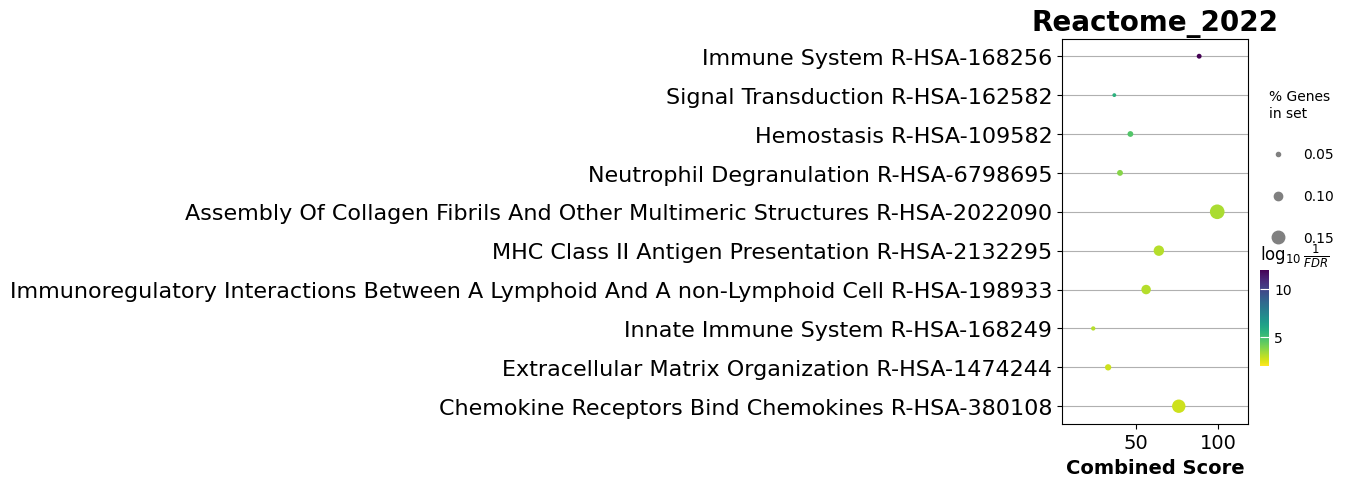

In [101]:
# Filter the DataFrame to include only rows where "Gene_set" contains "GO_Biological_Process_2023"
sorted_bot_genes_res_filtered_df_reactome = sorted_bot_genes_res_filtered_df[sorted_bot_genes_res_filtered_df['Gene_set'].str.contains('Reactome_2022')].copy()

ax = dotplot(sorted_bot_genes_res_filtered_df_reactome, title='Reactome_2022',cmap='viridis_r', size=10, figsize=(3,5))

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/sorted_bot_genes_res_filtered_df_reactome.pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [5]:
#Import gene expression - TpM

GeneExpressionTpM = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/FilesForGSEA/RSEM_Elavl_pme_TpM.txt", sep='\t', index_col=0)


In [6]:
GeneExpressionTpM

Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11500  \
gene_id                                                         
0610007C21Rik                                          177.85   
0610007L01Rik                                           25.52   
0610007P08Rik                                            8.61   
0610007P14Rik                                           28.36   
0610007P22Rik                                           35.76   
...                                                       ...   
Zyx                                                    147.46   
Zzef1                                                   10.13   
Zzz3                                                     6.76   
a                                                        1.41   
l7Rn6                                                   37.96   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11517  \
gene_id                                                         
0610007C21Rik                                          408.23   
0610007L01Rik                                           25.09   
0610007P08Rik                                            0.02   
0610007P14Rik                                           76.11   
0610007P22Rik                                           12.21   
...                                                       ...   
Zyx                                                    695.52   
Zzef1                                                    3.95   
Zzz3                                                    19.39   
a                                                        0.10   
l7Rn6                                                  103.32   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11519  \
gene_id                                                         
0610007C21Rik                                          168.78   
0610007L01Rik                                           14.58   
0610007P08Rik                                           21.79   
0610007P14Rik                                           44.32   
0610007P22Rik                                           12.47   
...                                                       ...   
Zyx                                                    230.01   
Zzef1                                                    2.94   
Zzz3                                                     5.52   
a                                                        4.04   
l7Rn6                                                   28.80   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11523  \
gene_id                                                         
0610007C21Rik                                          293.53   
0610007L01Rik                                           23.69   
0610007P08Rik                                            1.55   
0610007P14Rik                                           38.12   
0610007P22Rik                                           95.65   
...                                                       ...   
Zyx                                                    271.56   
Zzef1                                                    4.75   
Zzz3                                                     2.90   
a                                                        3.61   
l7Rn6                                                   92.83   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11524  \
gene_id                                                         
0610007C21Rik                                          305.93   
0610007L01Rik                                           37.80   
0610007P08Rik                                            7.58   
0610007P14Rik                                           81.95   
0610007P22Rik                                           32.75   
...                                                       ...   
Zyx                                                    460.24   
Zzef1                                         

Number of genes: 407


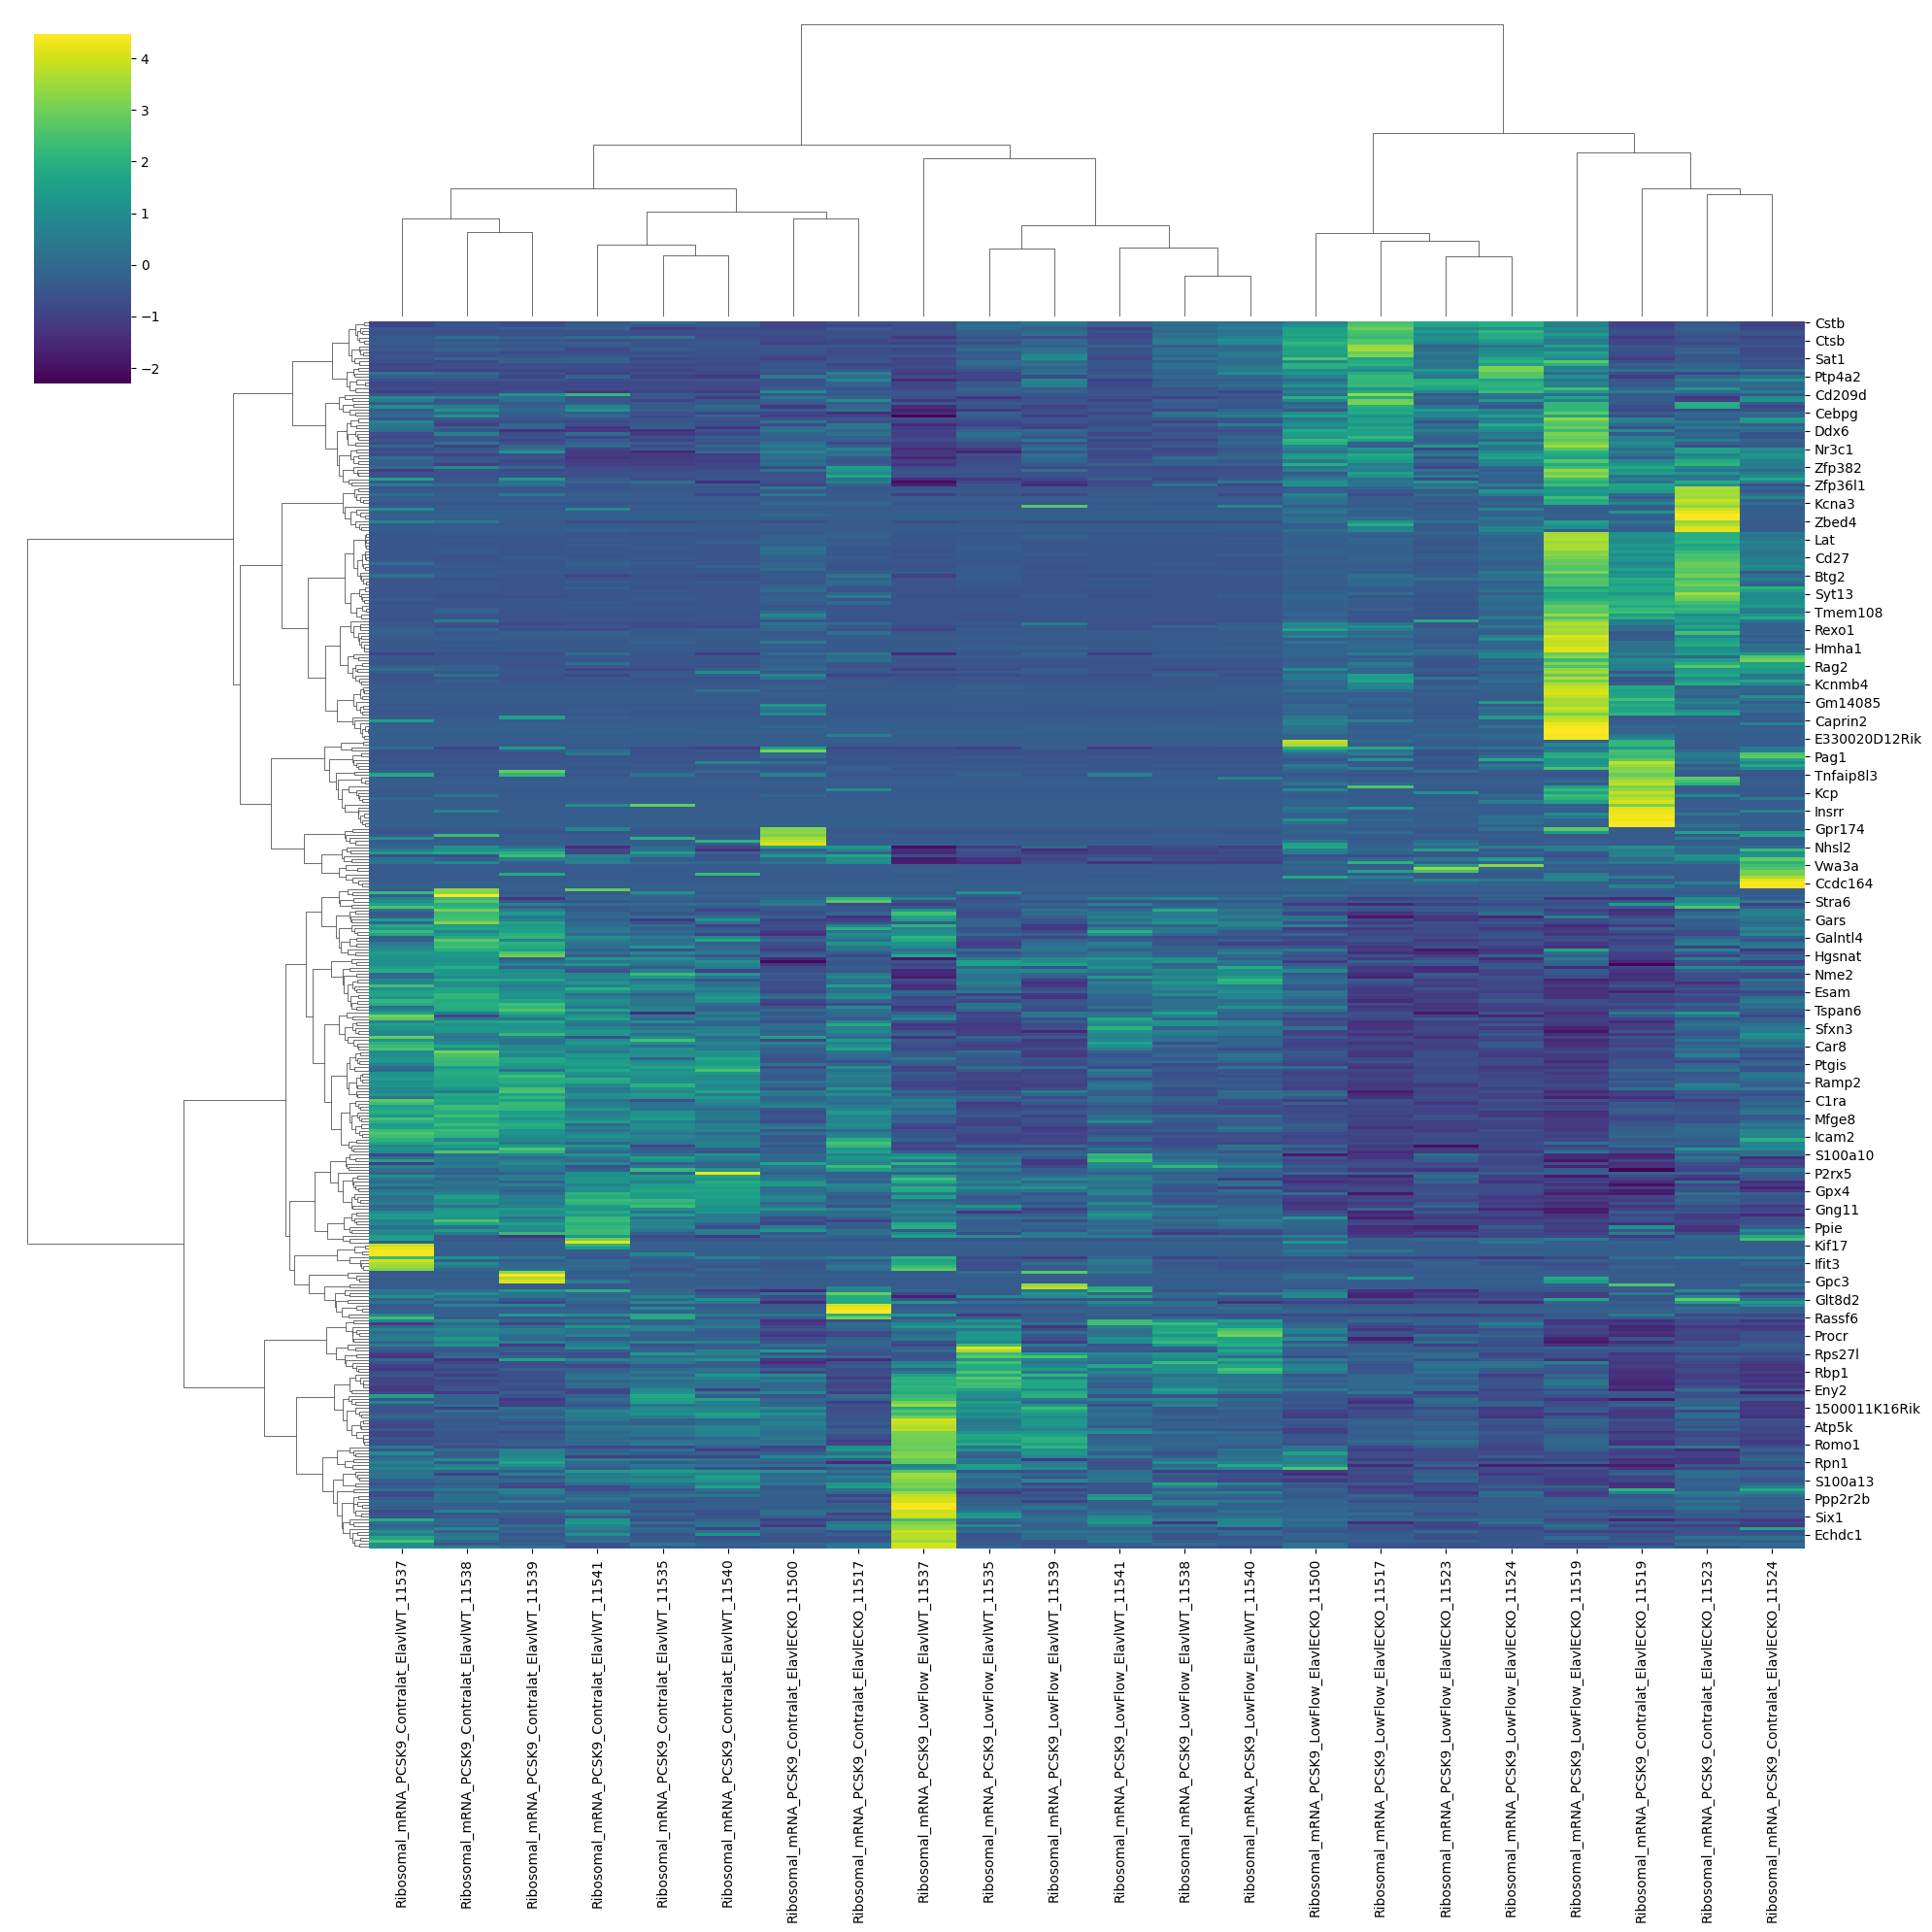

In [25]:
# Filter gene names based on the condition Ribo_Lig_ECKO_v_WT_padj < 0.05
filtered_genes = Lig_v_Contra_merged_results_RiboTotal.index[(Lig_v_Contra_merged_results_RiboTotal['Ribo_Lig_ECKO_v_WT_pvalue'] < 0.01)]

# Print the number of genes
print("Number of genes:", len(filtered_genes))

# Subset the expression data using the filtered gene names
subset_expression = GeneExpressionTpM.loc[filtered_genes]

# Filter out columns containing "Total" in the name
subset_expression = subset_expression.loc[:, ~subset_expression.columns.str.contains('Total') & ~subset_expression.columns.str.contains('Unbound')] 
#~subset_expression.columns.str.contains('Ribo') & 
#& ~subset_expression.columns.str.contains('LowFlow_ElavlECKO_11519') & ~subset_expression.columns.str.contains('LowFlow_ElavlWT_11537')

# Filter rows containing "C1q" in the index
#subset_expression = subset_expression[subset_expression.index.str.contains('C1q')]

# Z-score normalize the expression data along the rows
subset_expression_zscored = subset_expression.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# Create a clustered heatmap with a different clustering algorithm (e.g., 'ward')
sns.clustermap(subset_expression_zscored, cmap='viridis', figsize=(20, 20), method = 'ward')

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/heatmap_ECKOvWT_DESeq2_Ribo.pdf', bbox_inches='tight')

# Show the plot
plt.show()

Number of genes: 85


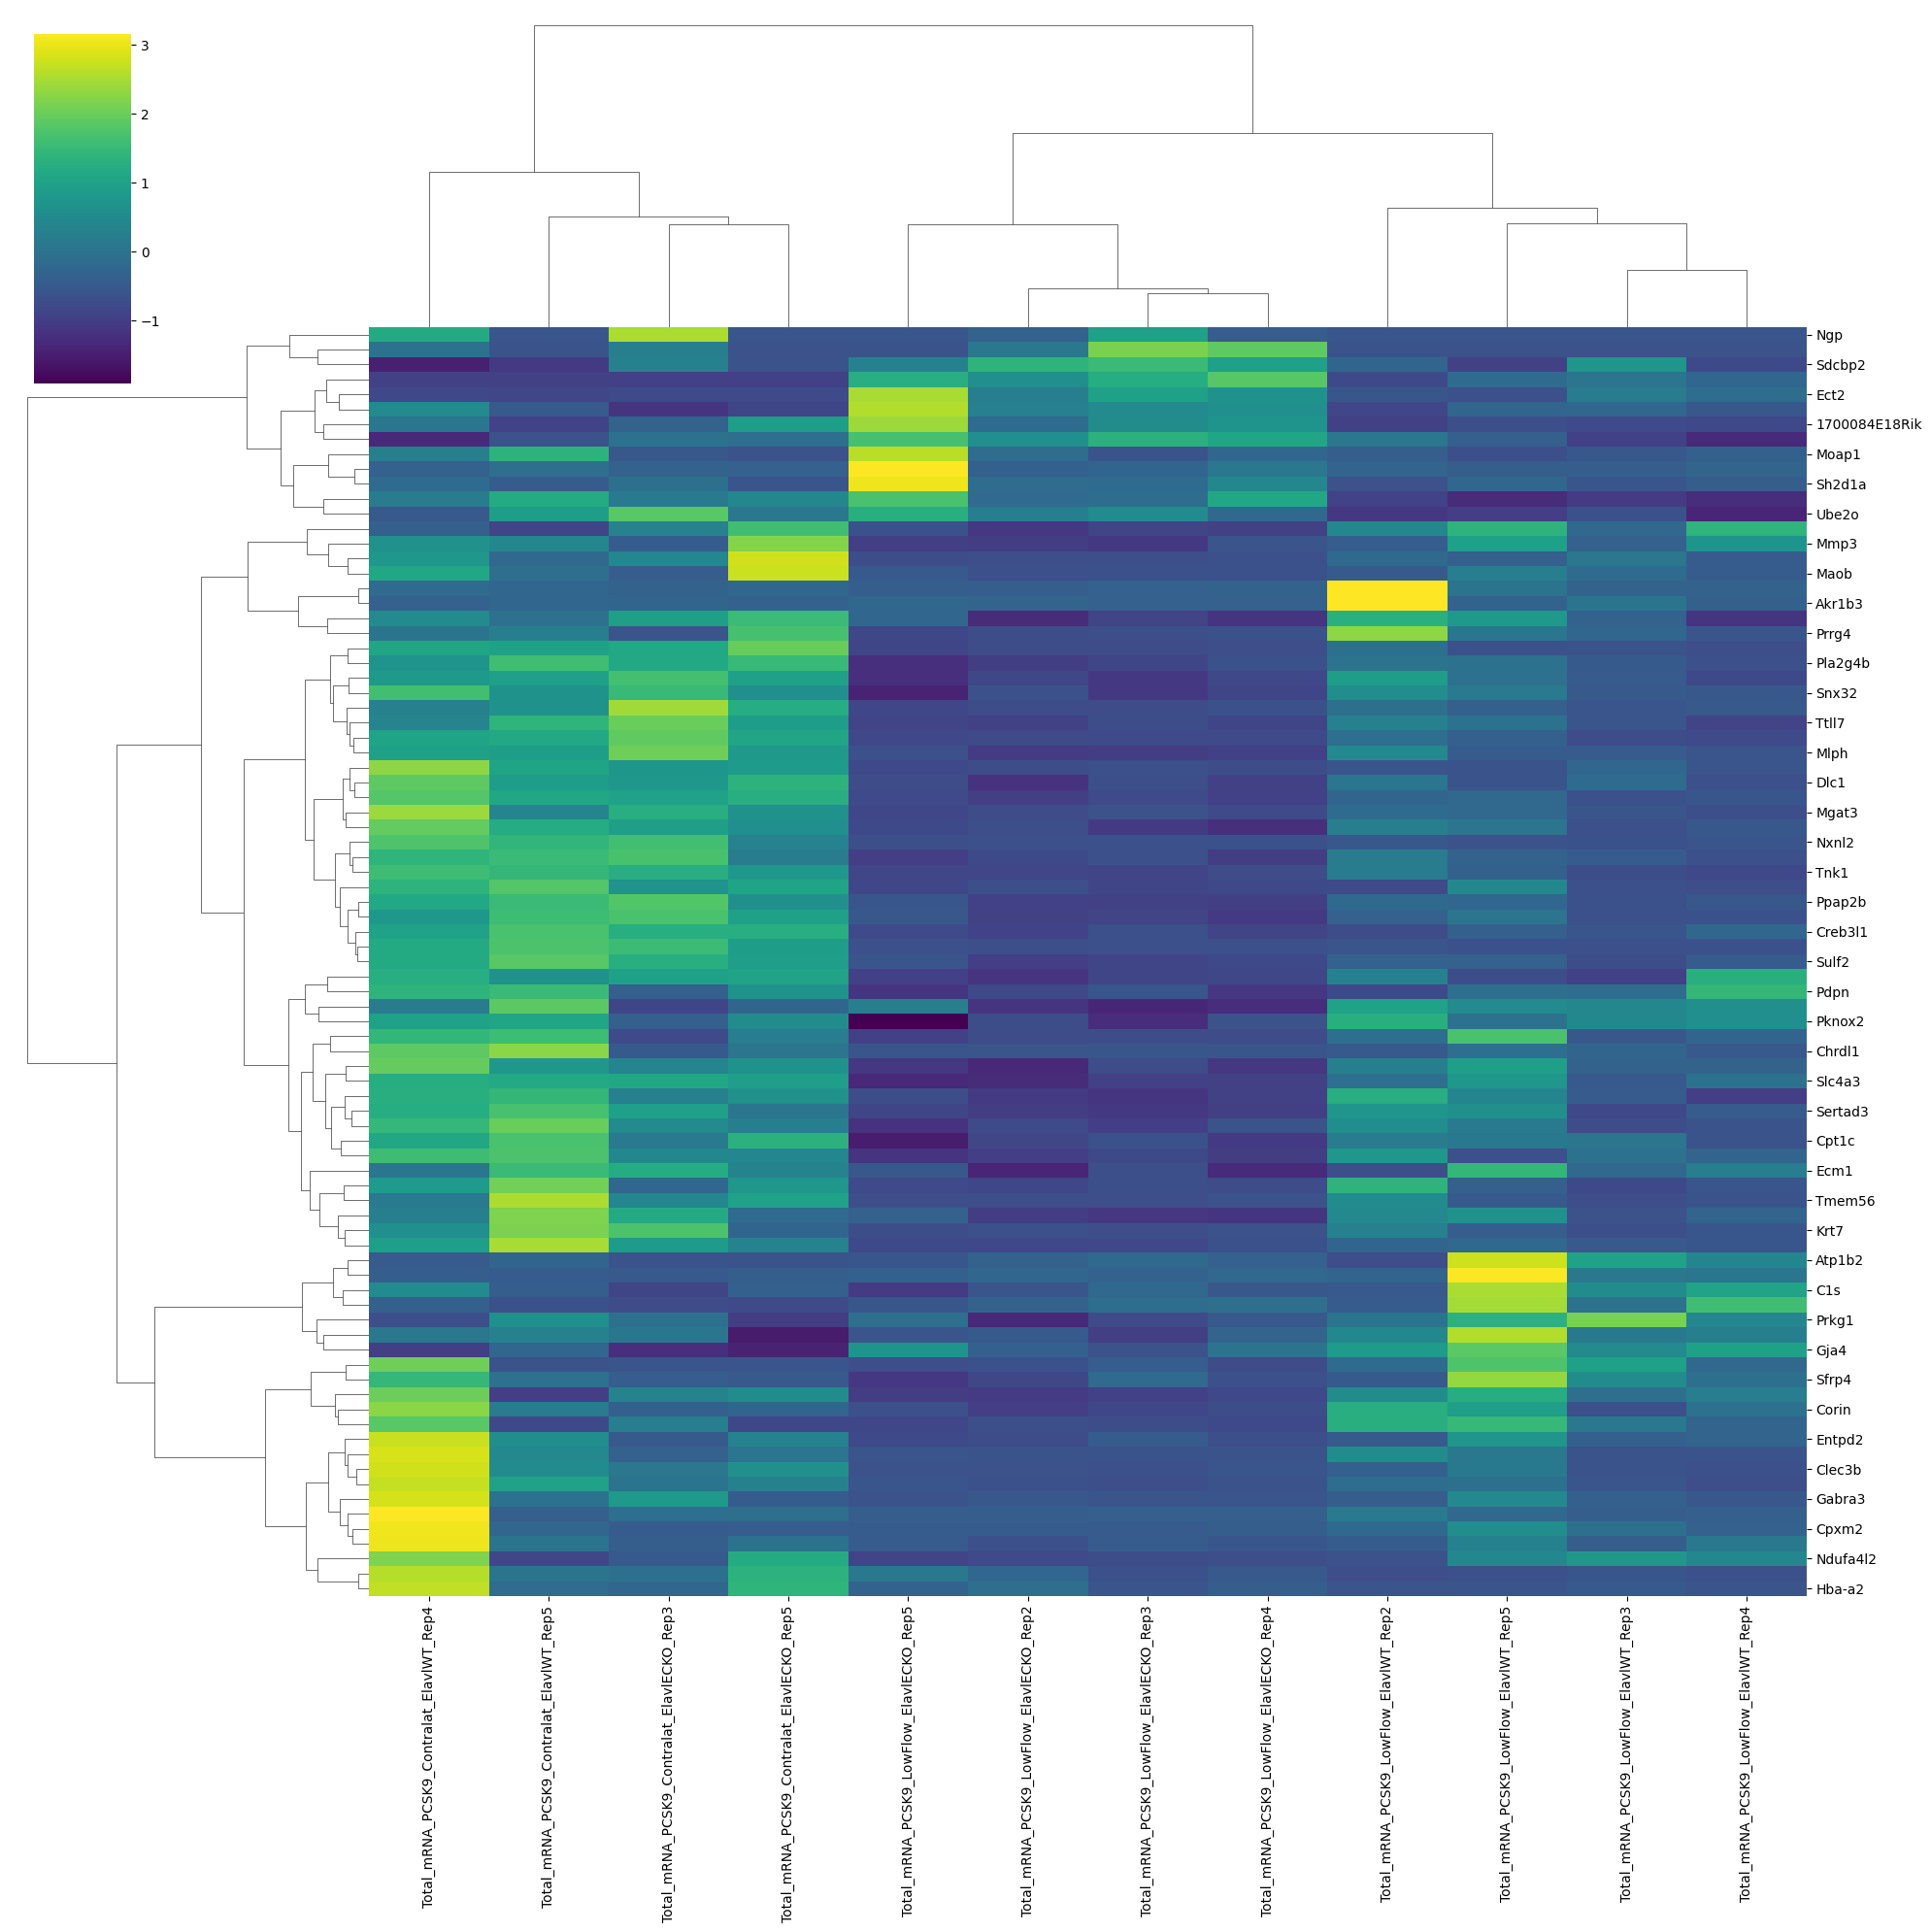

In [26]:
# Filter gene names based on the condition Ribo_Lig_ECKO_v_WT_padj < 0.05
filtered_genes = Lig_v_Contra_merged_results_RiboTotal.index[(Lig_v_Contra_merged_results_RiboTotal['Total_Lig_ECKO_v_WT_pvalue'] < 0.01)]

# Print the number of genes
print("Number of genes:", len(filtered_genes))

# Subset the expression data using the filtered gene names
subset_expression = GeneExpressionTpM.loc[filtered_genes]

# Filter out columns containing "Total" in the name
subset_expression = subset_expression.loc[:, ~subset_expression.columns.str.contains('Ribo') & ~subset_expression.columns.str.contains('Unbound') & ~subset_expression.columns.str.contains('_2') ] 
#~subset_expression.columns.str.contains('Ribo') & 
#& ~subset_expression.columns.str.contains('LowFlow_ElavlECKO_11519') & ~subset_expression.columns.str.contains('LowFlow_ElavlWT_11537')

# Filter rows containing "C1q" in the index
#subset_expression = subset_expression[subset_expression.index.str.contains('C1q')]

# Z-score normalize the expression data along the rows
subset_expression_zscored = subset_expression.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# Create a clustered heatmap with a different clustering algorithm (e.g., 'ward')
sns.clustermap(subset_expression_zscored, cmap='viridis', figsize=(20, 20), method = 'ward')

# Save plot to PDF
plt.savefig('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/heatmap_ECKOvWT_DESeq2_Total.pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [27]:
print(GeneExpressionTpM.columns)


Index(['Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11500',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11517',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11519',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11523',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11524',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_11535',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_11537',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_11538',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_11539',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_11540',
       'Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_11541',
       'Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO_11500',
       'Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO_11517',
       'Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO_11519',
       'Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO_11523',
       'Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO_11524',
       'Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT_11535',
       'Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT_11537',
    

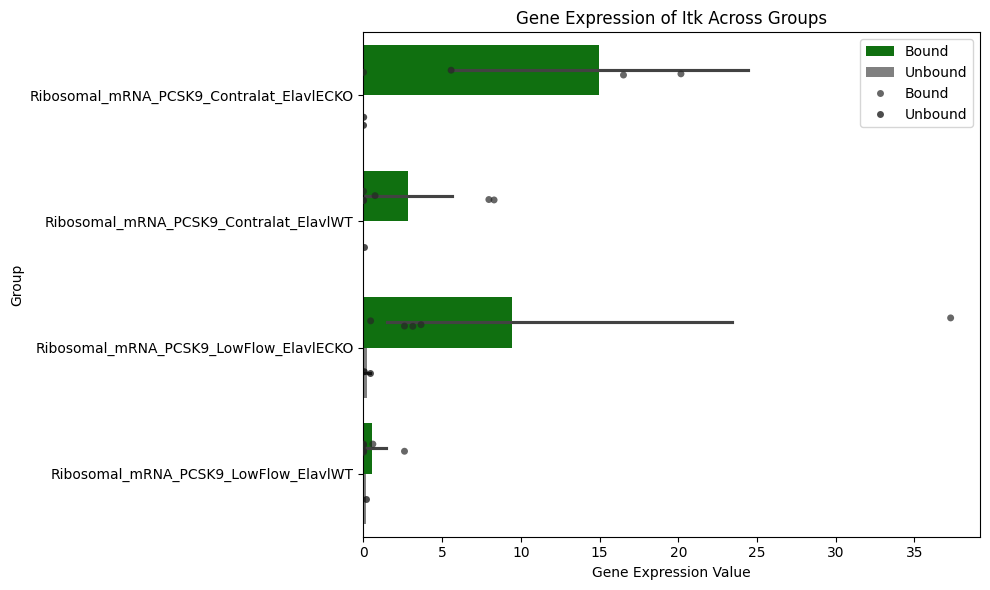

In [29]:
# Select a single gene ID (replace this with the ID of the gene you want to plot)
selected_gene_id = 'Itk'
filter1 = 'Ribo'
filter2 = ''

# Extract the group names from the column names of GeneExpressionTPM
group_counts = {}
for column in GeneExpressionTpM.columns:
    if filter1 in column and filter2 in column:  # Filter groups containing 'Ribo' and 'WT'
        group = column.rsplit('_', 1)[0]  # Get the part before the last underscore
        group_counts[group] = group_counts.get(group, []) + [column]  # Store the column name in the dictionary under the group key

# Get the data for the selected gene ID
selected_gene_data = GeneExpressionTpM.loc[selected_gene_id]

# Create a list to hold DataFrames
dfs = []

# Populate the DataFrame
for group, columns in group_counts.items():
    trimmed_group = 'Unbound' if 'Unbound' in group else 'Bound'
    for column in columns:
        expression_value = selected_gene_data[column]
        df = pd.DataFrame({'Original_Group': [group], 'Trimmed_Group': [trimmed_group], 'Expression': [expression_value]})
        dfs.append(df)

# Concatenate DataFrames
df = pd.concat(dfs, ignore_index=True)

# Remove "Unbound" from Original_Group
df['Original_Group'] = df['Original_Group'].str.replace('Unbound', '')

# Define custom color palette
custom_palette = {'Bound': 'green', 'Unbound': 'gray'}

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Expression', y='Original_Group', hue='Trimmed_Group', data=df, palette=custom_palette, dodge=True)
sns.stripplot(x='Expression', y='Original_Group', hue='Trimmed_Group', data=df, palette='dark:black', dodge=True, jitter=True, alpha=0.7)
plt.title(f'Gene Expression of {selected_gene_id} Across Groups')
plt.xlabel('Gene Expression Value')
plt.ylabel('Group')
plt.tight_layout()
plt.legend(loc='upper right')  # Show legend

# Save plot to PDF
plt.savefig(f'/Users/patrickmurphy/Documents/UCONN/4_Notebooks/278_GSEA_Elavl1/GSEA_results/{selected_gene_id}_filtered_{filter1}_{filter2}_both.pdf', bbox_inches='tight')

plt.show()

In [414]:
df

Original_Group Trimmed_Group  Expression
0   Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO         Bound      427.28
1   Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO         Bound      393.16
2   Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO         Bound      229.17
3   Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO         Bound      120.81
4   Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO         Bound       86.18
5     Ribosomal_mRNA_PCSK9_Contralat_ElavlWT         Bound      261.28
6     Ribosomal_mRNA_PCSK9_Contralat_ElavlWT         Bound      171.23
7     Ribosomal_mRNA_PCSK9_Contralat_ElavlWT         Bound      269.51
8     Ribosomal_mRNA_PCSK9_Contralat_ElavlWT         Bound      224.19
9     Ribosomal_mRNA_PCSK9_Contralat_ElavlWT         Bound      226.91
10    Ribosomal_mRNA_PCSK9_Contralat_ElavlWT         Bound       70.42
11    Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO         Bound      350.16
12    Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO         Bound       59.58
13    Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO         Bound      163.61
14    Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO         Bound      163.20
15    Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO         Bound       50.48
16      Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT         Bound      491.95
17      Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT         Bound      140.26
18      Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT         Bound      269.81
19      Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT         Bound       79.58
20      Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT         Bound      337.67
21      Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT         Bound       54.71
22  Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO       Unbound      145.62
23  Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO       Unbound       17.79
24    Ribosomal_mRNA_PCSK9_Contralat_ElavlWT       Unbound      216.41
25    Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO       Unbound      299.66
26    Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO       Unbound      142.96
27      Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT       Unbound        6.78

In [427]:
GeneExpressionTpM

Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11500  \
gene_id                                                         
0610007C21Rik                                          177.85   
0610007L01Rik                                           25.52   
0610007P08Rik                                            8.61   
0610007P14Rik                                           28.36   
0610007P22Rik                                           35.76   
...                                                       ...   
Zyx                                                    147.46   
Zzef1                                                   10.13   
Zzz3                                                     6.76   
a                                                        1.41   
l7Rn6                                                   37.96   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11517  \
gene_id                                                         
0610007C21Rik                                          408.23   
0610007L01Rik                                           25.09   
0610007P08Rik                                            0.02   
0610007P14Rik                                           76.11   
0610007P22Rik                                           12.21   
...                                                       ...   
Zyx                                                    695.52   
Zzef1                                                    3.95   
Zzz3                                                    19.39   
a                                                        0.10   
l7Rn6                                                  103.32   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11519  \
gene_id                                                         
0610007C21Rik                                          168.78   
0610007L01Rik                                           14.58   
0610007P08Rik                                           21.79   
0610007P14Rik                                           44.32   
0610007P22Rik                                           12.47   
...                                                       ...   
Zyx                                                    230.01   
Zzef1                                                    2.94   
Zzz3                                                     5.52   
a                                                        4.04   
l7Rn6                                                   28.80   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11523  \
gene_id                                                         
0610007C21Rik                                          293.53   
0610007L01Rik                                           23.69   
0610007P08Rik                                            1.55   
0610007P14Rik                                           38.12   
0610007P22Rik                                           95.65   
...                                                       ...   
Zyx                                                    271.56   
Zzef1                                                    4.75   
Zzz3                                                     2.90   
a                                                        3.61   
l7Rn6                                                   92.83   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_11524  \
gene_id                                                         
0610007C21Rik                                          305.93   
0610007L01Rik                                           37.80   
0610007P08Rik                                            7.58   
0610007P14Rik                                           81.95   
0610007P22Rik                                           32.75   
...                                                       ...   
Zyx                                                    460.24   
Zzef1                                         

In [440]:
# Initialize an empty DataFrame to store the average expression values
avg_expression_df = pd.DataFrame(index=GeneExpressionTpM.index)

# Group columns by the string before the last underscore
grouped_columns = GeneExpressionTpM.columns.to_series().apply(lambda x: x.rsplit('_', 1)[0])

# Iterate over unique groups
for group in grouped_columns.unique():
    # Select columns belonging to the current group
    group_columns = GeneExpressionTpM.loc[:, grouped_columns == group]
    # Calculate the mean across columns for the current group
    avg_expression_df[group] = group_columns.mean(axis=1)


In [447]:
avg_expression_df

Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO  \
gene_id                                                   
0610007C21Rik                                   270.864   
0610007L01Rik                                    25.336   
0610007P08Rik                                     7.910   
0610007P14Rik                                    53.772   
0610007P22Rik                                    37.768   
...                                                 ...   
Zyx                                             360.958   
Zzef1                                             5.376   
Zzz3                                              7.526   
a                                                 2.238   
l7Rn6                                            66.612   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlWT  \
gene_id                                                 
0610007C21Rik                              360.380000   
0610007L01Rik                               35.728333   
0610007P08Rik                                3.046667   
0610007P14Rik                               47.541667   
0610007P22Rik                               39.281667   
...                                               ...   
Zyx                                        652.930000   
Zzef1                                        2.265000   
Zzz3                                         4.706667   
a                                            0.081667   
l7Rn6                                      107.831667   

               Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO  \
gene_id                                                 
0610007C21Rik                                 164.124   
0610007L01Rik                                  25.150   
0610007P08Rik                                   4.610   
0610007P14Rik                                  46.808   
0610007P22Rik                                  39.802   
...                                               ...   
Zyx                                           146.330   
Zzef1                                           8.890   
Zzz3                                           10.512   
a                                               2.390   
l7Rn6                                          64.432   

               Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT  \
gene_id                                               
0610007C21Rik                            246.168333   
0610007L01Rik                             36.911667   
0610007P08Rik                              2.205000   
0610007P14Rik                             52.965000   
0610007P22Rik                             35.071667   
...                                             ...   
Zyx                                      164.993333   
Zzef1                                      6.413333   
Zzz3                                       8.285000   
a                                          0.080000   
l7Rn6                                     55.243333   

               Total_mRNA_noPCSK9_LowFlow_ElavlWT  \
gene_id                                             
0610007C21Rik                             134.240   
0610007L01Rik                              45.585   
0610007P08Rik                               8.900   
0610007P14Rik                              35.870   
0610007P22Rik                              24.155   
...                                           ...   
Zyx                                       785.150   
Zzef1                                      24.140   
Zzz3                                       27.175   
a                                           0.060   
l7Rn6                                      38.105   

               Total_mRNA_PCSK9_Contralat_ElavlECKO  \
gene_id                                               
0610007C21Rik                               177.975   
0610007L01Rik                                46.315   
0610007P08Rik                                 5.725   
0610007P14Rik                                27.695   
0610007P22Rik              

In [471]:
columns_and_unbound = {
    'Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO': 'UnboundRibosomal_mRNA_PCSK9_Contralat_ElavlECKO',
    'Ribosomal_mRNA_PCSK9_Contralat_ElavlWT': 'UnboundRibosomal_mRNA_PCSK9_Contralat_ElavlWT',
    'Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO': 'UnboundRibosomal_mRNA_PCSK9_LowFlow_ElavlECKO',
    'Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT': 'UnboundRibosomal_mRNA_PCSK9_LowFlow_ElavlWT'
}

# Initialize an empty DataFrame to store the ratios
ratios_df = pd.DataFrame(index=avg_expression_df.index)

# Iterate over the defined columns and their corresponding unbound columns
for column, unbound_column in columns_and_unbound.items():
    # Calculate the ratio of Ribosomal to Unbound expression
    ratio = avg_expression_df[column] / avg_expression_df[unbound_column]
    # Add the ratio as a new column in ratios_df
    ratios_df[f'{column}_Ratio'] = ratio

In [472]:
ratios_df

Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_Ratio  \
gene_id                                                         
0610007C21Rik                                        5.078541   
0610007L01Rik                                        1.112448   
0610007P08Rik                                      263.666667   
0610007P14Rik                                       41.363077   
0610007P22Rik                                        1.581575   
...                                                       ...   
Zyx                                                  1.823987   
Zzef1                                               17.626230   
Zzz3                                                 0.958726   
a                                                   21.314286   
l7Rn6                                                1.318788   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_Ratio  \
gene_id                                                       
0610007C21Rik                                   7207.600000   
0610007L01Rik                                     21.141026   
0610007P08Rik                                    152.333333   
0610007P14Rik                                   1188.541667   
0610007P22Rik                                      0.629111   
...                                                     ...   
Zyx                                                1.292675   
Zzef1                                              3.020000   
Zzz3                                               2.869919   
a                                                  0.001718   
l7Rn6                                           2156.633333   

               Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO_Ratio  \
gene_id                                                       
0610007C21Rik                                      2.188466   
0610007L01Rik                                      1.266683   
0610007P08Rik                                     13.761194   
0610007P14Rik                                      3.704630   
0610007P22Rik                                      1.098289   
...                                                     ...   
Zyx                                                2.809176   
Zzef1                                              7.377593   
Zzz3                                               5.242893   
a                                                  1.149038   
l7Rn6                                              1.987109   

               Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT_Ratio  
gene_id                                                    
0610007C21Rik                                    0.413624  
0610007L01Rik                                  217.127451  
0610007P08Rik                                    6.485294  
0610007P14Rik                                   88.275000  
0610007P22Rik                                    4.484868  
...                                                   ...  
Zyx                                            211.529915  
Zzef1                                           10.020833  
Zzz3                                            51.781250  
a                                                0.065574  
l7Rn6                                           78.919048  

[21675 rows x 4 columns]

In [473]:
# Calculate the mean for each gene across all columns
mean_values = ratios_df.mean(axis=1)

# Calculate the standard deviation for each gene across all columns
std_values = ratios_df.std(axis=1)

# Add population mean and standard deviation to the DataFrame
ratios_df['Mean'] = mean_values
ratios_df['Std'] = std_values

/Users/patrickmurphy/mambaforge/envs/jupyterenv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [474]:
ratios_df

Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_Ratio  \
gene_id                                                         
0610007C21Rik                                        5.078541   
0610007L01Rik                                        1.112448   
0610007P08Rik                                      263.666667   
0610007P14Rik                                       41.363077   
0610007P22Rik                                        1.581575   
...                                                       ...   
Zyx                                                  1.823987   
Zzef1                                               17.626230   
Zzz3                                                 0.958726   
a                                                   21.314286   
l7Rn6                                                1.318788   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_Ratio  \
gene_id                                                       
0610007C21Rik                                   7207.600000   
0610007L01Rik                                     21.141026   
0610007P08Rik                                    152.333333   
0610007P14Rik                                   1188.541667   
0610007P22Rik                                      0.629111   
...                                                     ...   
Zyx                                                1.292675   
Zzef1                                              3.020000   
Zzz3                                               2.869919   
a                                                  0.001718   
l7Rn6                                           2156.633333   

               Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO_Ratio  \
gene_id                                                       
0610007C21Rik                                      2.188466   
0610007L01Rik                                      1.266683   
0610007P08Rik                                     13.761194   
0610007P14Rik                                      3.704630   
0610007P22Rik                                      1.098289   
...                                                     ...   
Zyx                                                2.809176   
Zzef1                                              7.377593   
Zzz3                                               5.242893   
a                                                  1.149038   
l7Rn6                                              1.987109   

               Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT_Ratio         Mean  \
gene_id                                                                  
0610007C21Rik                                    0.413624  1803.820158   
0610007L01Rik                                  217.127451    60.161902   
0610007P08Rik                                    6.485294   109.061622   
0610007P14Rik                                   88.275000   330.471093   
0610007P22Rik                                    4.484868     1.948461   
...                                                   ...          ...   
Zyx                                            211.529915    54.363938   
Zzef1                                           10.020833     9.511164   
Zzz3                                            51.781250    15.213197   
a                                                0.065574     5.632654   
l7Rn6                                           78.919048   559.714570   

                       Std  
gene_id                     
0610007C21Rik  3602.520408  
0610007L01Rik   105.065531  
0610007P08Rik   122.989478  
0610007P14Rik   573.092146  
0610007P22Rik     1.735074  
...                    ...  
Zyx             104.779201  
Zzef1             6.131922  
Zzz3             24.441603  
a                10.467668  
l7Rn6          1065.235442  

[21675 rows x 6 columns]

In [482]:
ratios_df['Z-score_pos'] = ratios_df['Mean']/ratios_df['Std']

In [484]:
ratios_df['MeanNeg'] = 1/ratios_df['Mean']

In [485]:
ratios_df['Z-score_neg'] = ratios_df['MeanNeg']/ratios_df['Std']

In [486]:
ratios_df

Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_Ratio  \
gene_id                                                         
0610007C21Rik                                        5.078541   
0610007L01Rik                                        1.112448   
0610007P08Rik                                      263.666667   
0610007P14Rik                                       41.363077   
0610007P22Rik                                        1.581575   
...                                                       ...   
Zyx                                                  1.823987   
Zzef1                                               17.626230   
Zzz3                                                 0.958726   
a                                                   21.314286   
l7Rn6                                                1.318788   

               Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_Ratio  \
gene_id                                                       
0610007C21Rik                                   7207.600000   
0610007L01Rik                                     21.141026   
0610007P08Rik                                    152.333333   
0610007P14Rik                                   1188.541667   
0610007P22Rik                                      0.629111   
...                                                     ...   
Zyx                                                1.292675   
Zzef1                                              3.020000   
Zzz3                                               2.869919   
a                                                  0.001718   
l7Rn6                                           2156.633333   

               Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO_Ratio  \
gene_id                                                       
0610007C21Rik                                      2.188466   
0610007L01Rik                                      1.266683   
0610007P08Rik                                     13.761194   
0610007P14Rik                                      3.704630   
0610007P22Rik                                      1.098289   
...                                                     ...   
Zyx                                                2.809176   
Zzef1                                              7.377593   
Zzz3                                               5.242893   
a                                                  1.149038   
l7Rn6                                              1.987109   

               Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT_Ratio         Mean  \
gene_id                                                                  
0610007C21Rik                                    0.413624  1803.820158   
0610007L01Rik                                  217.127451    60.161902   
0610007P08Rik                                    6.485294   109.061622   
0610007P14Rik                                   88.275000   330.471093   
0610007P22Rik                                    4.484868     1.948461   
...                                                   ...          ...   
Zyx                                            211.529915    54.363938   
Zzef1                                           10.020833     9.511164   
Zzz3                                            51.781250    15.213197   
a                                                0.065574     5.632654   
l7Rn6                                           78.919048   559.714570   

                       Std  Z-score  Z-score_pos   MeanNeg   Z-score_neg  
gene_id                                                                   
0610007C21Rik  3602.520408      NaN     0.500711  0.000554  1.538864e-07  
0610007L01Rik   105.065531      NaN     0.572613  0.016622  1.582043e-04  
0610007P08Rik   122.989478      NaN     0.886756  0.009169  7.455214e-05  
0610007P14Rik   573.092146      NaN     0.576646  0.003026  5.280099e-06  
0610007P22Rik     1.735074      NaN     1.122984  0.513226  2.957947e-01  
...                    ...      ...      

In [490]:
# Sort the DataFrame by Z-score_neg column in descending order
sorted_df = ratios_df.sort_values(by='Z-score_neg', ascending=False)

# Get the top 20 rows
top_100 = sorted_df.head(100)

top_100

Ribosomal_mRNA_PCSK9_Contralat_ElavlECKO_Ratio  \
gene_id                                                     
Snora81                                               NaN   
Scn7a                                            0.022121   
Folr2                                            0.073725   
Defa-ps12                                        0.151770   
Bc1                                              0.151770   
...                                                   ...   
Acan                                             0.600000   
Rps8                                             0.606794   
Rps2                                             0.261078   
Fndc5                                            0.800000   
Brp44                                            0.489672   

           Ribosomal_mRNA_PCSK9_Contralat_ElavlWT_Ratio  \
gene_id                                                   
Snora81                                             NaN   
Scn7a                                          0.000505   
Folr2                                          0.015922   
Defa-ps12                                      0.000000   
Bc1                                            0.000000   
...                                                 ...   
Acan                                           0.333333   
Rps8                                           0.467048   
Rps2                                           0.258963   
Fndc5                                          0.583333   
Brp44                                          0.778028   

           Ribosomal_mRNA_PCSK9_LowFlow_ElavlECKO_Ratio  \
gene_id                                                   
Snora81                                        0.000000   
Scn7a                                          0.025830   
Folr2                                          0.082638   
Defa-ps12                                      0.000000   
Bc1                                            0.000000   
...                                                 ...   
Acan                                           0.228923   
Rps8                                           0.519556   
Rps2                                           0.357943   
Fndc5                                          0.781818   
Brp44                                          0.529201   

           Ribosomal_mRNA_PCSK9_LowFlow_ElavlWT_Ratio      Mean       Std  \
gene_id                                                                     
Snora81                                      0.000000  0.000000  0.000000   
Scn7a                                        0.125000  0.043364  0.055558   
Folr2                                        0.111659  0.070986  0.040123   
Defa-ps12                                    0.052502  0.051068  0.071551   
Bc1                                          0.052502  0.051068  0.071551   
...                                               ...       ...       ...   
Acan                                         0.000149  0.290601  0.248811   
Rps8                                         0.235624  0.457256  0.158597   
Rps2                                         0.664931  0.385729  0.191775   
Fndc5                                        0.782609  0.736940  0.102748   
Brp44                                        0.520765  0.579417  0.133494   

           Z-score  Z-score_pos    MeanNeg  Z-score_neg  
gene_id                                                  
Snora81        NaN          NaN        inf          inf  
Scn7a          NaN     0.780524  23.060497   415.072296  
Folr2          NaN     1.769198  14.087248   351.098254  
Defa-ps12      NaN     0.713725  19.581689   273.672697  
Bc1            NaN     0.713725  19.581689   273.672697  
...            ...          ...        ...          ...  
Acan           NaN     1.167962   3.441139    13.830356  
Rps8           NaN     2.883125   2.186961    13.789402  
Rps2           NaN     2.011359   2.592495    13.518401  
Fndc5          NaN     7.172328   1.35696

In [492]:
ratios_df.to_csv("/Users/patrickmurphy/Desktop/ratios_df.csv")